# Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Path to the dataset zip file
zip_path = '/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions.zip'
extract_path = '/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data'


In [ ]:
# Unzip the dataset
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted to:", extract_path)
else:
    print("Dataset already extracted.")


Dataset already extracted.


In [ ]:
# List files in the extraction directory
print("\nListing extracted files:")
for root, dirs, files in os.walk(extract_path):
    for name in files:
        print(os.path.join(root, name))



Listing extracted files:
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/fer2013.csv
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/gan_generator.pth
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/gan_training_history.json
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator.pth
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator.pth
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_training_history.json
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator.pth
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator.pth
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_training_history.json
/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/e

In [ ]:
file1 = '/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/fer2013.csv'


In [ ]:
csv_path = file1  # Choose the first file for now

In [ ]:
data = pd.read_csv(csv_path)
print("Dataset Overview:")
print(data.head())

# Display columns and basic statistics
print("\nColumns:", data.columns)
print("\nDataset Info:")
print(data.info())

# Describe numerical data
print("\nNumerical Data Description:")
print(data.describe())


Dataset Overview:
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

Columns: Index(['emotion', 'pixels', 'Usage'], dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None

Numerical Data Description:
            emotion
count  35887.000000
mean       3.323265
std        1.873819
min        0

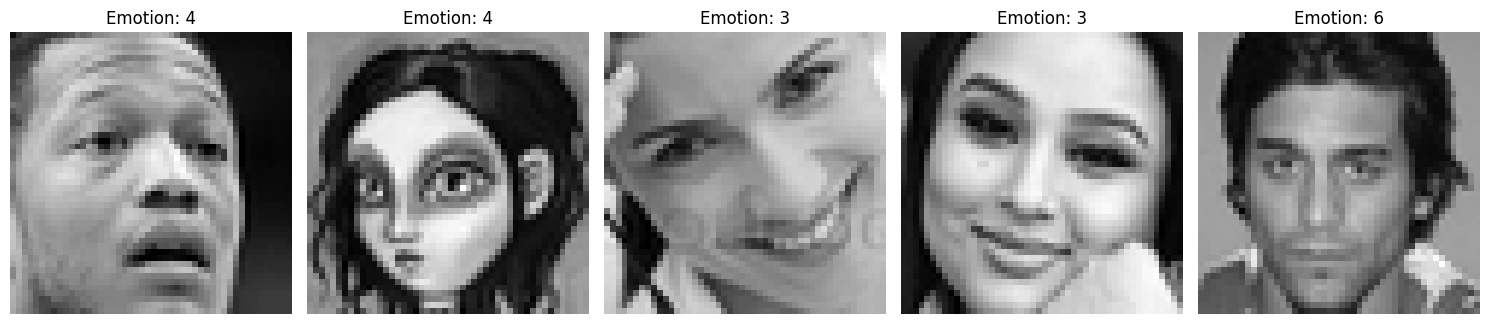

In [ ]:
def visualize_images(data, num_samples=5):
    if 'pixels' in data.columns and 'emotion' in data.columns:
        # Randomly select samples
        samples = data.sample(num_samples)
        fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
        for i, row in enumerate(samples.iterrows()):
            pixels = row[1]['pixels']
            emotion = row[1]['emotion']
            # Convert pixel data to a 48x48 image
            image = np.array(pixels.split(), dtype=np.uint8).reshape(48, 48)
            axes[i].imshow(image, cmap='gray')
            axes[i].axis('off')
            axes[i].set_title(f"Emotion: {emotion}")
        plt.tight_layout()
        plt.show()
    else:
        print("Dataset does not have 'pixels' or 'emotion' columns.")

# Visualize some images
visualize_images(data)



Dataset Shape:
(35887, 3)

Missing Pixel Data:
Missing pixel entries: 0

Sample Pixel Data Format:
70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 1

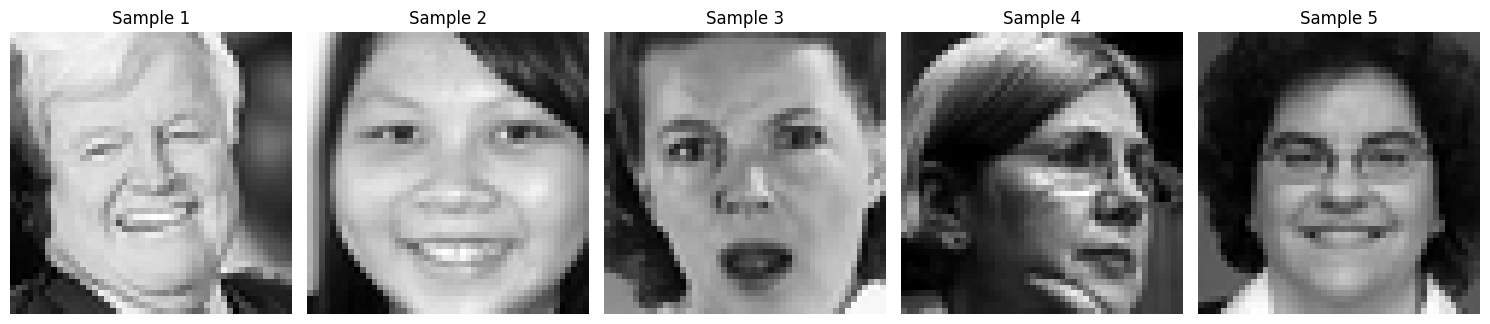

In [ ]:
# Check dataset shape
print("\nDataset Shape:")
print(data.shape)

# Verify that all rows have pixel data
print("\nMissing Pixel Data:")
missing_pixels = data['pixels'].isnull().sum()
print(f"Missing pixel entries: {missing_pixels}")

# Inspect the pixel data format
print("\nSample Pixel Data Format:")
print(data['pixels'].iloc[0])

# Convert pixel data to numpy arrays and inspect shapes
def check_image_shapes(data, num_samples=5):
    sample_images = []
    print("\nInspecting Shapes of Images:")
    for i in range(num_samples):
        # Randomly pick a row
        row = data.sample(1).iloc[0]
        pixels = np.array(row['pixels'].split(), dtype=np.uint8).reshape(48, 48)
        sample_images.append(pixels)
        print(f"Image {i+1}: {pixels.shape}")
    return sample_images

# Check a few sample shapes
sample_images = check_image_shapes(data)

# Visualize the sample images
print("\nVisualizing Sample Images:")
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
for i, img in enumerate(sample_images):
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Sample {i+1}")
plt.tight_layout()
plt.show()


In [ ]:
# Filter data based on the `Usage` column
train_data = data[data['Usage'] == 'Training']  # Predefined training set
val_data = data[data['Usage'] == 'PublicTest']  # Predefined validation set
test_data = data[data['Usage'] == 'PrivateTest']  # Predefined test set

# Drop unnecessary columns for this task
train_data = train_data.drop(columns=['emotion', 'Usage'])
val_data = val_data.drop(columns=['emotion', 'Usage'])
test_data = test_data.drop(columns=['emotion', 'Usage'])

# Verify the splits
print(f"Training Set: {train_data.shape}")
print(f"Validation Set: {val_data.shape}")
print(f"Test Set: {test_data.shape}")



Training Set: (28709, 1)
Validation Set: (3589, 1)
Test Set: (3589, 1)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [ ]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define global variables
batch_size = 64
num_workers = 2

In [ ]:
from torch.utils.data import Dataset
import numpy as np

# Custom Dataset for Noisy and Clean Image Pairs
class NoisyDataset(Dataset):
    def __init__(self, data, transform=None, noise_factor=0.2, noise_std=0.5, noise_type='gaussian', salt_pepper_ratio=0.5):
        """
        Args:
            data (pd.DataFrame): Input data containing image pixels as strings.
            transform (callable, optional): Optional transform to be applied to each image.
            noise_factor (float): Scaling factor for noise intensity.
            noise_std (float): Standard deviation for Gaussian noise.
            noise_type (str): Type of noise ('gaussian' or 'salt_pepper').
            salt_pepper_ratio (float): Ratio of salt (white) to pepper (black) noise in Salt-and-Pepper noise.
        """
        self.data = data
        self.transform = transform
        self.noise_factor = noise_factor
        self.noise_std = noise_std
        self.noise_type = noise_type
        self.salt_pepper_ratio = salt_pepper_ratio

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Parse the image from the dataset
        pixels = self.data.iloc[idx]['pixels']
        image = np.array(pixels.split(), dtype=np.float32).reshape(48, 48)  # Ensure `float32` dtype

        # Normalize the clean image to [-1, 1]
        clean_image = image / 127.5 - 1.0

        # Add noise to the image
        noisy_image = self._apply_noise(clean_image)

        # Apply optional transforms (e.g., for tensor conversion)
        if self.transform:
            clean_image = self.transform(clean_image)
            noisy_image = self.transform(noisy_image)

        return noisy_image, clean_image

    def _apply_noise(self, clean_image):
        """
        Applies the specified noise type to the image.
        Args:
            clean_image (np.ndarray): The clean image to which noise is added.
        Returns:
            np.ndarray: Noisy image.
        """
        if self.noise_type == 'gaussian':
            noise = np.random.normal(loc=0.0, scale=self.noise_std, size=clean_image.shape).astype(np.float32)
            noisy_image = clean_image + self.noise_factor * noise
        elif self.noise_type == 'salt_pepper':
            noisy_image = self._add_salt_pepper_noise(clean_image)
        else:
            raise ValueError(f"Unsupported noise type: {self.noise_type}")

        # Clip values to [-1, 1] after adding noise
        return np.clip(noisy_image, -1.0, 1.0)

    def _add_salt_pepper_noise(self, clean_image):
        """
        Adds Salt-and-Pepper noise to the image.
        Args:
            clean_image (np.ndarray): The clean image to which noise is added.
        Returns:
            np.ndarray: Noisy image.
        """
        noisy_image = clean_image.copy()
        num_pixels = clean_image.size

        # Calculate the number of salt and pepper pixels
        num_salt = int(num_pixels * self.noise_factor * self.salt_pepper_ratio)
        num_pepper = int(num_pixels * self.noise_factor * (1 - self.salt_pepper_ratio))

        # Add salt (white) noise
        salt_coords = [np.random.randint(0, dim, num_salt) for dim in clean_image.shape]
        noisy_image[salt_coords[0], salt_coords[1]] = 1.0

        # Add pepper (black) noise
        pepper_coords = [np.random.randint(0, dim, num_pepper) for dim in clean_image.shape]
        noisy_image[pepper_coords[0], pepper_coords[1]] = -1.0

        return noisy_image


In [ ]:
# Create datasets
def create_datasets(data, noise_levels, transform=None):
    datasets = {}
    for noise_config in noise_levels:
        name = noise_config['name']
        datasets[name] = NoisyDataset(
            data=data,
            transform=transform,
            noise_factor=noise_config.get('factor', 0.2),
            noise_std=noise_config.get('std', 0.5),
            noise_type=noise_config.get('type', 'gaussian'),
            salt_pepper_ratio=noise_config.get('salt_pepper_ratio', 0.5)
        )
    return datasets

# Create dataloaders
def create_dataloaders(datasets, batch_size, num_workers):
    loaders = {
        name: DataLoader(dataset, batch_size=batch_size, shuffle=(name == 'low_gaussian_noise'), num_workers=num_workers)
        for name, dataset in datasets.items()
    }
    return loaders

# Visualization for noisy and clean pairs
def visualize_noisy_clean(loader, num_samples=5):
    data_iter = iter(loader)
    noisy_images, clean_images = next(data_iter)

    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))
    for i in range(num_samples):
        # Noisy image
        axes[0, i].imshow(noisy_images[i].squeeze().numpy(), cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title("Noisy")

        # Clean image
        axes[1, i].imshow(clean_images[i].squeeze().numpy(), cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title("Clean")

    plt.tight_layout()
    plt.show()

In [ ]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [ ]:
# Define noise levels
noise_levels = [
    {'name': 'low_gaussian_noise', 'factor': 0.2, 'std': 0.2, 'type': 'gaussian'},
    {'name': 'high_gaussian_noise', 'factor': 0.3, 'std': 0.4, 'type': 'gaussian'},
    {'name': 'salt_pepper_noise', 'factor': 0.1, 'type': 'salt_pepper', 'salt_pepper_ratio': 0.5}
]


In [ ]:
# Prepare datasets
train_datasets = create_datasets(train_data, noise_levels, transform=transform)
val_datasets = create_datasets(val_data, noise_levels, transform=transform)
test_datasets = create_datasets(test_data, noise_levels, transform=transform)

# Create dataloaders
train_loaders = create_dataloaders(train_datasets, batch_size=batch_size, num_workers=num_workers)
val_loaders = create_dataloaders(val_datasets, batch_size=batch_size, num_workers=num_workers)
test_loaders = create_dataloaders(test_datasets, batch_size=batch_size, num_workers=num_workers)


Visualizing Gaussian noise (low):


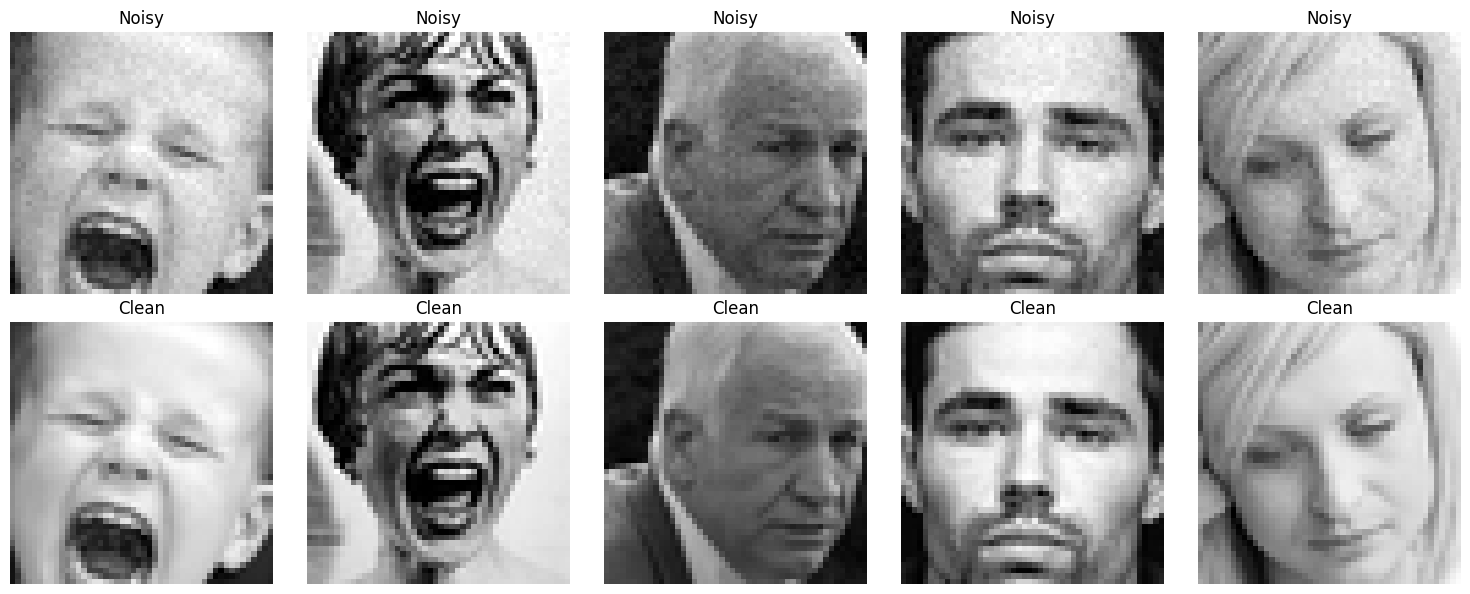

Visualizing Gaussian noise (high):


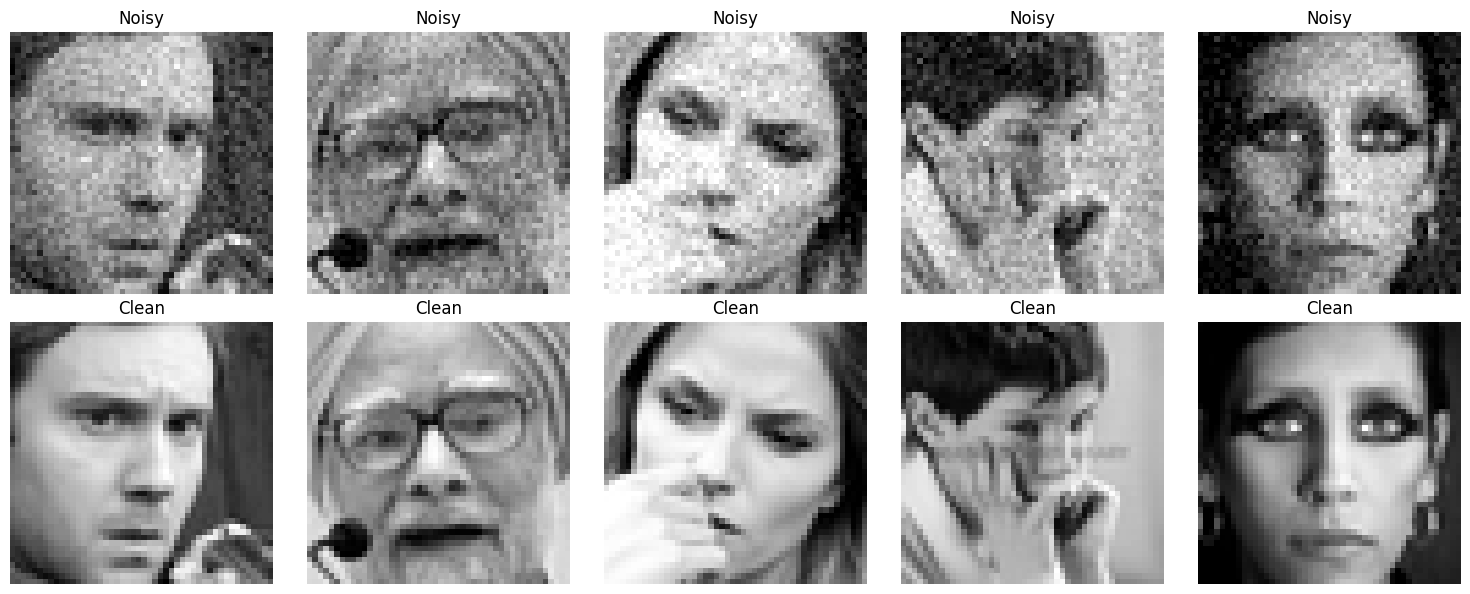

Visualizing Salt-and-Pepper noise:


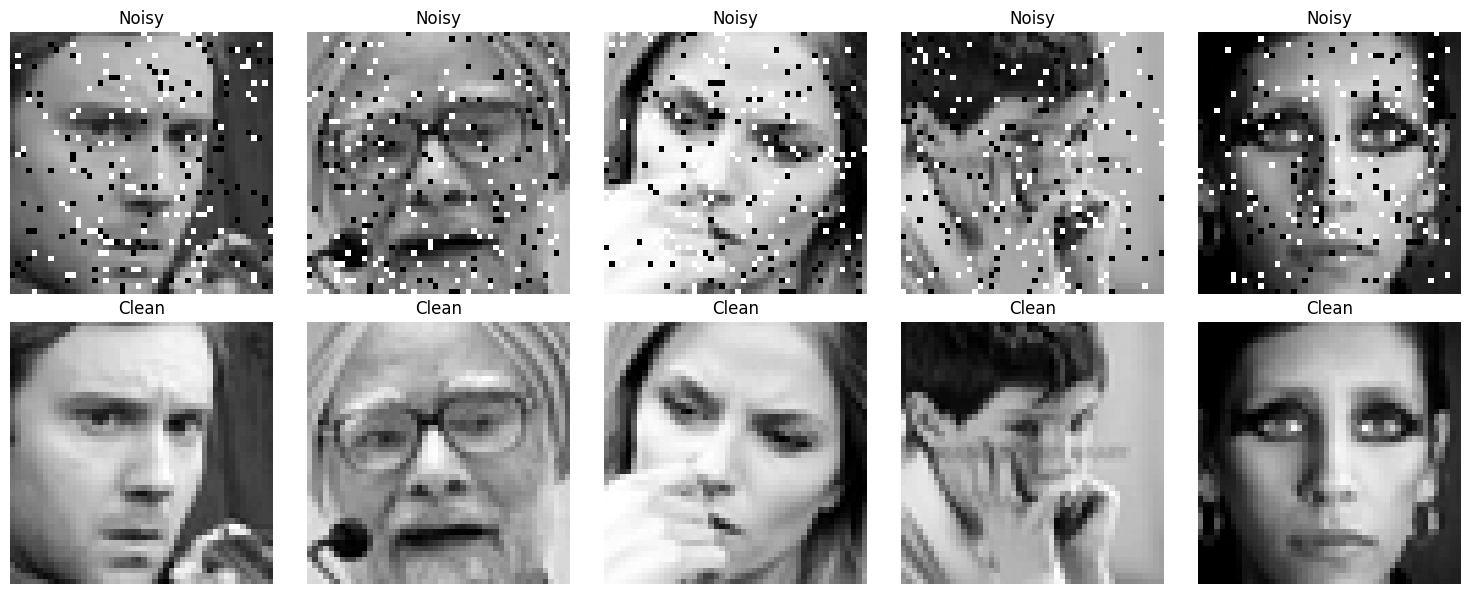

In [ ]:
# Visualize samples
print("Visualizing Gaussian noise (low):")
visualize_noisy_clean(train_loaders['low_gaussian_noise'])

print("Visualizing Gaussian noise (high):")
visualize_noisy_clean(train_loaders['high_gaussian_noise'])

print("Visualizing Salt-and-Pepper noise:")
visualize_noisy_clean(train_loaders['salt_pepper_noise'])

# Model

## 1: AttentionUnet

In [ ]:
import torch
import torch.nn as nn

# Attention Block
class AttentionBlock(nn.Module):
    def __init__(self, in_channels, g_channels, inter_channels):
        super(AttentionBlock, self).__init__()
        self.theta = nn.Conv2d(in_channels, inter_channels, kernel_size=1, stride=1, padding=0)
        self.phi = nn.Conv2d(g_channels, inter_channels, kernel_size=1, stride=1, padding=0)
        self.psi = nn.Conv2d(inter_channels, 1, kernel_size=1, stride=1, padding=0)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, g):
        theta_x = self.theta(x)
        phi_g = self.phi(g)
        f = torch.relu(theta_x + phi_g)
        psi_f = self.psi(f)
        attention = self.sigmoid(psi_f)
        return x * attention


class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, use_batchnorm=True, activation='relu'):
        super(ConvBlock, self).__init__()
        self.activation = activation
        layers = [
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True) if activation == 'relu' else nn.Identity(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True) if activation == 'relu' else nn.Identity(),
        ]
        if use_batchnorm:
            layers.insert(2, nn.BatchNorm2d(out_channels))  # Add BatchNorm2d after first Conv2d
        self.block = nn.Sequential(*layers)
        if activation == 'tanh':
            self.final_activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.final_activation = nn.Sigmoid()
        else:
            self.final_activation = nn.Identity()

    def forward(self, x):
        x = self.block(x)
        return self.final_activation(x)



# Encoder Block with Debugging and Adjustable Stride/Padding
class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, use_attention=False, stride=2, padding=0, debug=False):
        """
        Args:
            in_channels (int): Number of input channels.
            out_channels (int): Number of output channels.
            use_attention (bool): Whether to use attention in the block.
            stride (int): Stride for the pooling operation (default is 2).
            padding (int): Padding for the pooling operation (default is 0).
            debug (bool): Whether to print shape information during forward pass.
        """
        super(EncoderBlock, self).__init__()
        self.conv = ConvBlock(in_channels, out_channels)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=stride, padding=padding)
        self.use_attention = use_attention
        self.debug = debug

        if self.use_attention:
            self.attention = AttentionBlock(out_channels, out_channels, out_channels)

    def forward(self, x):
        if self.debug:
            print(f"Input to EncoderBlock: {x.shape}")
        features = self.conv(x)
        if self.debug:
            print(f"After ConvBlock: {features.shape}")
        if self.use_attention:
            features = self.attention(features, features)  # Self-attention
            if self.debug:
                print(f"After AttentionBlock: {features.shape}")
        downsampled = self.pool(features)
        if self.debug:
            print(f"After Pooling: {downsampled.shape}")
        return features, downsampled


# Decoder Block
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, use_attention=False, debug=False):
        super(DecoderBlock, self).__init__()
        self.upconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
        self.conv = ConvBlock(out_channels * 2, out_channels)
        self.use_attention = use_attention
        self.debug = debug

        if self.use_attention:
            # Ensure `g_channels` matches `out_channels`
            self.attention = AttentionBlock(out_channels, out_channels, out_channels)

    def forward(self, x, skip):
        x = self.upconv(x)
        if self.debug:
            print("Decoder Input Shape:", x.shape)
            print("Skip Connection Shape (Before Attention):", skip.shape)
        if self.use_attention:
            skip = self.attention(skip, x)
            if self.debug:
                print("Skip Connection Shape (After Attention):", skip.shape)
        x = torch.cat([x, skip], dim=1)
        x = self.conv(x)
        return x


class AttentionUNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, use_attention=True, debug=False):
        super(AttentionUNet, self).__init__()
        self.debug = debug
        # Encoder
        self.enc1 = EncoderBlock(in_channels, 16)
        self.enc2 = EncoderBlock(16, 32)
        self.enc3 = EncoderBlock(32, 64)
        self.enc4 = EncoderBlock(64, 128)

        # Bottleneck
        self.bottleneck = ConvBlock(128, 256)

        # Decoder
        self.dec4 = DecoderBlock(256, 128, use_attention=use_attention, debug=debug)
        self.dec3 = DecoderBlock(128, 64, use_attention=use_attention, debug=debug)
        self.dec2 = DecoderBlock(64, 32, use_attention=use_attention, debug=debug)
        self.dec1 = DecoderBlock(32, 16, use_attention=False, debug=debug)

        # Final Output
        self.final_conv = nn.Conv2d(16, out_channels, kernel_size=1)

    def forward(self, x):
        if self.debug:
            print("input:", x.shape)
        # Encoder
        enc1, down1 = self.enc1(x)
        if self.debug:
            print("Encoder 1 Output Shape:", enc1.shape, "Down 1 Shape:", down1.shape)

        enc2, down2 = self.enc2(down1)
        if self.debug:
            print("Encoder 2 Output Shape:", enc2.shape, "Down 2 Shape:", down2.shape)

        enc3, down3 = self.enc3(down2)
        if self.debug:
            print("Encoder 3 Output Shape:", enc3.shape, "Down 3 Shape:", down3.shape)

        enc4, down4 = self.enc4(down3)
        if self.debug:
            print("Encoder 4 Output Shape:", enc4.shape, "Down 4 Shape:", down4.shape)

        # Bottleneck
        bottleneck = self.bottleneck(down4)
        if self.debug:
            print("Bottleneck Output Shape:", bottleneck.shape)

        # Decoder
        dec4 = self.dec4(bottleneck, enc4)
        if self.debug:
            print("Decoder 4 Output Shape:", dec4.shape)

        dec3 = self.dec3(dec4, enc3)
        if self.debug:
            print("Decoder 3 Output Shape:", dec3.shape)

        dec2 = self.dec2(dec3, enc2)
        if self.debug:
            print("Decoder 2 Output Shape:", dec2.shape)

        dec1 = self.dec1(dec2, enc1)
        if self.debug:
            print("Decoder 1 Output Shape:", dec1.shape)

        # Output
        out = self.final_conv(dec1)
        if self.debug:
            print("Final Output Shape:", out.shape)
        return out


## 2: GAN

In [ ]:
class PatchGANDiscriminator(nn.Module):
    """
    PatchGAN Discriminator with optional FC layers after the final convolution.
    """

    def __init__(self, in_channels=2, base_channels=32, stride=[2, 2, 2, 2, 2, 2], padding=[0, 0, 0, 0, 0, 0], use_fc=False, global_pooling=False, debug=False):
        """
        Args:
            in_channels (int): Number of input channels (e.g., noisy + clean/generated = 2).
            base_channels (int): Number of base channels for the first encoder block.
            stride (list): List of strides for encoder blocks.
            padding (list): List of paddings for encoder blocks.
            use_fc (bool): Use fully connected layers after final convolution.
            global_pooling (bool): Apply global average pooling before FC.
            debug (bool): Enable debug prints.
        """
        super(PatchGANDiscriminator, self).__init__()
        self.debug = debug
        self.use_fc = use_fc
        self.global_pooling = global_pooling

        # Encoder layers
        self.enc1 = EncoderBlock(in_channels, base_channels, use_attention=True, stride=stride[0], padding=padding[0], debug=debug)
        self.enc2 = EncoderBlock(base_channels, base_channels * 2, use_attention=False, stride=stride[1], padding=padding[1], debug=debug)
        # self.enc3 = EncoderBlock(base_channels * 2, base_channels * 4, use_attention=True, stride=stride[2], padding=padding[2], debug=debug)
        # self.enc4 = EncoderBlock(base_channels * 4, base_channels * 8, use_attention=False, stride=stride[3], padding=padding[3], debug=debug)

        # Final convolution
        self.final_conv = nn.Conv2d(base_channels * 2, 1, kernel_size=2, stride=stride[5], padding=padding[5])

        # Fully connected layers
        if self.use_fc:
            self.fc_dim = 12 * 12  # Dimensions of the flattened output
            self.fc = nn.Sequential(
                # nn.Linear(base_channels * 8 * (22 * 22), self.fc_dim),  # Input: flattened size
                nn.Linear(base_channels * 2, self.fc_dim),  # Input: flattened size
                nn.Tanh(),  # Activation function
                nn.Linear(self.fc_dim, self.fc_dim),  # Output size
                nn.Tanh()
            )

    def forward(self, x, y):
        """
        Forward pass.
        Args:
            x (Tensor): Noisy input image.
            y (Tensor): Clean/generated image.
        Returns:
            Tensor: Patch-based real/fake scores.
        """
        # Concatenate inputs
        combined = torch.cat([x, y], dim=1)  # Shape: (B, 2, H, W)
        if self.debug:
            print(f"Input to PatchGANDiscriminator: {combined.shape}")

        # Encoder forward pass
        features, downsampled = self.enc1(combined)
        features, downsampled = self.enc2(downsampled)
        # features, downsampled = self.enc3(downsampled)
        # features, downsampled = self.enc4(downsampled)

        # Final convolution
        out = self.final_conv(features)  # Shape: (B, 1, H', W')
        if self.debug:
            print(f"Output of final_conv: {out.shape}")

        if self.use_fc:
            batch_size, channels, height, width = features.shape
            # Apply global pooling if enabled
            if self.global_pooling:
                if self.debug:
                   print(f"input of FC before global avg: {batch_size}, {channels}, {height}, {width}")
                pooled_features = torch.mean(features, dim=[2, 3])  # Global average pooling
                flattened = pooled_features.view(batch_size, -1)  # Flatten pooled features
                if self.debug:
                    print(f"input of FC after global avg: {flattened.shape}")
            else:
                flattened = features.view(batch_size, -1)  # Flatten directly without pooling

            fc_out = self.fc(flattened)  # Pass through FC layers
            if self.debug:
                    print(f"after  FC: {fc_out.shape}")
            out = fc_out.view(batch_size, 1, height, width)  # Reshape to patch size
            if self.debug:
                print(f"Output after FC layers (with global pooling): {out.shape}")


        return out


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim


In [ ]:
pip install --upgrade torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 18.8 MB/s eta 0:00:00


# Training

## Task1: Denoising Low Gaussian Noise

### ATTUNET

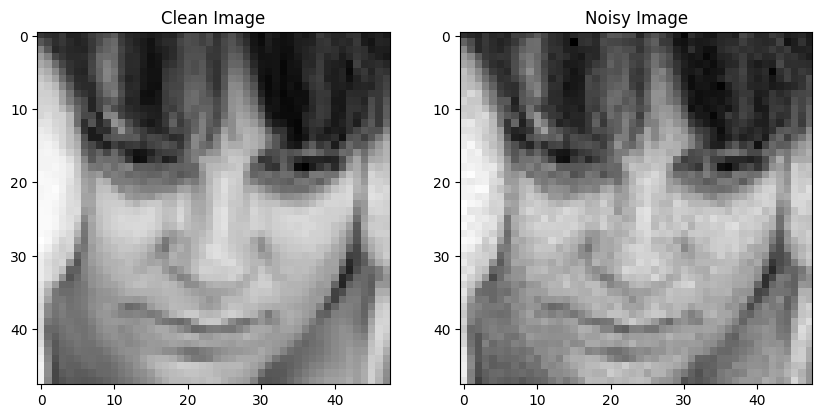

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `peak_signal_noise_ratio` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `peak_signal_noise_ratio` from `torchmetrics.image` instead.
  _future_warning(


SSIM and PSNR Results:
Clean Image with Itself - SSIM: 1.0000, PSNR: inf
Clean Image with Noisy Version - SSIM: 0.9380, PSNR: 27.8064


In [ ]:
import torch
import matplotlib.pyplot as plt
from torchmetrics.functional import structural_similarity_index_measure as ssim
from torchmetrics.functional import peak_signal_noise_ratio as psnr

# Function to visualize images
def visualize_images(clean_image, noisy_image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Clean Image")
    plt.imshow(clean_image.squeeze(), cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image.squeeze(), cmap='gray')

    plt.show()

# Extract a batch from the train loader
for noisy_images, clean_images in train_loaders['low_gaussian_noise']:
    # Select the first sample from the batch
    clean_image_sample = clean_images[0].cpu().numpy().squeeze()  # Ground truth
    noisy_image_sample = noisy_images[0].cpu().numpy().squeeze()  # Noisy version

    # Visualize the clean and noisy images
    visualize_images(clean_image_sample, noisy_image_sample)

    # Compute SSIM and PSNR
    clean_image_tensor = clean_images[0].unsqueeze(0).to(dtype=torch.float32)  # Add batch dimension
    noisy_image_tensor = noisy_images[0].unsqueeze(0).to(dtype=torch.float32)  # Add batch dimension

    # Ground on ground
    clean_to_self_ssim = ssim(clean_image_tensor, clean_image_tensor, data_range=2.0)
    clean_to_self_psnr = psnr(clean_image_tensor, clean_image_tensor, data_range=2.0)

    # Ground on noise
    clean_to_noisy_ssim = ssim(clean_image_tensor, noisy_image_tensor, data_range=2.0)
    clean_to_noisy_psnr = psnr(clean_image_tensor, noisy_image_tensor, data_range=2.0)

    # Print results
    print("SSIM and PSNR Results:")
    print(f"Clean Image with Itself - SSIM: {clean_to_self_ssim:.4f}, PSNR: {clean_to_self_psnr:.4f}")
    print(f"Clean Image with Noisy Version - SSIM: {clean_to_noisy_ssim:.4f}, PSNR: {clean_to_noisy_psnr:.4f}")

    break  # Only process one batch


In [ ]:
import torch
import matplotlib.pyplot as plt
from torchmetrics.functional import structural_similarity_index_measure as ssim
from torchmetrics.functional import peak_signal_noise_ratio as psnr
from tqdm import tqdm


class Trainer:
    def __init__(self, model, train_loader, val_loader, optimizer, criterion, scheduler=None, device='cuda'):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.optimizer = optimizer
        self.criterion = criterion
        self.scheduler = scheduler
        self.device = device

        # Logging
        self.train_history = {'loss': [], 'psnr': [], 'ssim': []}
        self.val_history = {'loss': [], 'psnr': [], 'ssim': []}

        # Best Scores
        self.best_val_loss = float('inf')
        self.best_val_psnr = 0
        self.best_val_ssim = 0

    def compute_metrics(self, clean_images, outputs):
        """Compute PSNR and SSIM for a batch."""
        psnr_score = psnr(outputs, clean_images, data_range=2.0).item()
        ssim_score = ssim(outputs, clean_images, data_range=2.0).item()
        return psnr_score, ssim_score

    def train_epoch(self):
        self.model.train()
        total_loss, total_psnr, total_ssim, num_batches = 0, 0, 0, 0

        for noisy_images, clean_images in tqdm(self.train_loader, desc="Training"):
            noisy_images = noisy_images.to(self.device, dtype=torch.float32)
            clean_images = clean_images.to(self.device, dtype=torch.float32)

            # Forward
            outputs = self.model(noisy_images)
            loss = self.criterion(outputs, clean_images)

            # Backward
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            # Metrics
            psnr_score, ssim_score = self.compute_metrics(clean_images, outputs)
            total_loss += loss.item()
            total_psnr += psnr_score
            total_ssim += ssim_score
            num_batches += 1

        return total_loss / num_batches, total_psnr / num_batches, total_ssim / num_batches

    def validate_epoch(self):
        self.model.eval()
        total_loss, total_psnr, total_ssim, num_batches = 0, 0, 0, 0

        with torch.no_grad():
            for noisy_images, clean_images in tqdm(self.val_loader, desc="Validating"):
                noisy_images = noisy_images.to(self.device, dtype=torch.float32)
                clean_images = clean_images.to(self.device, dtype=torch.float32)

                # Forward
                outputs = self.model(noisy_images)
                loss = self.criterion(outputs, clean_images)

                # Metrics
                psnr_score, ssim_score = self.compute_metrics(clean_images, outputs)
                total_loss += loss.item()
                total_psnr += psnr_score
                total_ssim += ssim_score
                num_batches += 1

        return total_loss / num_batches, total_psnr / num_batches, total_ssim / num_batches

    def plot_metrics(self):
        """Plot and save training and validation metrics."""
        for metric in ['loss', 'psnr', 'ssim']:
            plt.figure(figsize=(10, 5))
            plt.plot(self.train_history[metric], label=f"Train {metric.capitalize()}")
            plt.plot(self.val_history[metric], label=f"Val {metric.capitalize()}")
            plt.xlabel("Epochs")
            plt.ylabel(metric.capitalize())
            plt.title(f"Training and Validation {metric.capitalize()}")
            plt.legend()
            plt.savefig(f"{metric}_plot.png")
            plt.close()

    def fit(self, num_epochs, save_path='best_model.pth', early_stop_patience=5):
        early_stop_count = 0

        for epoch in range(num_epochs):
            print(f"\nEpoch {epoch + 1}/{num_epochs}")

            # Training
            train_loss, train_psnr, train_ssim = self.train_epoch()
            self.train_history['loss'].append(train_loss)
            self.train_history['psnr'].append(train_psnr)
            self.train_history['ssim'].append(train_ssim)

            # Validation
            val_loss, val_psnr, val_ssim = self.validate_epoch()
            self.val_history['loss'].append(val_loss)
            self.val_history['psnr'].append(val_psnr)
            self.val_history['ssim'].append(val_ssim)

            # Scheduler Step
            if self.scheduler:
                self.scheduler.step(val_loss)

            # Logging
            print(f"Train Loss: {train_loss:.4f}, PSNR: {train_psnr:.4f}, SSIM: {train_ssim:.4f}")
            print(f"Val Loss: {val_loss:.4f}, PSNR: {val_psnr:.4f}, SSIM: {val_ssim:.4f}")

            # Save Best Model
            if val_loss < self.best_val_loss:
                print(f"Validation loss improved from {self.best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
                torch.save(self.model.state_dict(), save_path)
                self.best_val_loss = val_loss
                self.best_val_psnr = val_psnr
                self.best_val_ssim = val_ssim
                early_stop_count = 0
            else:
                early_stop_count += 1

            # Early Stopping
            if early_stop_count >= early_stop_patience:
                print("Early stopping triggered.")
                break

        self.plot_metrics()


In [ ]:
# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Initialize the model with debugging enabled for testing
debug_model = AttentionUNet(in_channels=1, out_channels=1, debug=True).to(device)

# Test with a single dummy input
test_input = torch.randn(2, 1, 48, 48).to(device)  # Batch size 2, single-channel, 48x48
test_output = debug_model(test_input)
print("Test Output Shape with Debugging:", test_output.shape)

input: torch.Size([2, 1, 48, 48])
Encoder 1 Output Shape: torch.Size([2, 16, 48, 48]) Down 1 Shape: torch.Size([2, 16, 24, 24])
Encoder 2 Output Shape: torch.Size([2, 32, 24, 24]) Down 2 Shape: torch.Size([2, 32, 12, 12])
Encoder 3 Output Shape: torch.Size([2, 64, 12, 12]) Down 3 Shape: torch.Size([2, 64, 6, 6])
Encoder 4 Output Shape: torch.Size([2, 128, 6, 6]) Down 4 Shape: torch.Size([2, 128, 3, 3])
Bottleneck Output Shape: torch.Size([2, 256, 3, 3])
Decoder Input Shape: torch.Size([2, 128, 6, 6])
Skip Connection Shape (Before Attention): torch.Size([2, 128, 6, 6])
Skip Connection Shape (After Attention): torch.Size([2, 128, 6, 6])
Decoder 4 Output Shape: torch.Size([2, 128, 6, 6])
Decoder Input Shape: torch.Size([2, 64, 12, 12])
Skip Connection Shape (Before Attention): torch.Size([2, 64, 12, 12])
Skip Connection Shape (After Attention): torch.Size([2, 64, 12, 12])
Decoder 3 Output Shape: torch.Size([2, 64, 12, 12])
Decoder Input Shape: torch.Size([2, 32, 24, 24])
Skip Connection S

In [ ]:
# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize Model
model = AttentionUNet(in_channels=1, out_channels=1).to(device)

# Define Loss, Optimizer, and Scheduler
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)


In [ ]:
# Print Shapes of a Batch from the Train Loader
for noisy_images, clean_images in train_loaders['low_gaussian_noise']:
    print("Noisy Image Shape:", noisy_images.shape)
    print("Clean Image Shape:", clean_images.shape)
    break  # Only print shapes for the first batch

# Helper Function: Get Model Save Path
def get_model_save_path(base_path, filename="best_model.pth"):
    """
    Get the save path for the model in the same directory as the dataset.
    Args:
        base_path (str): Path to the dataset directory.
        filename (str): Name of the model file to save.
    Returns:
        str: Full path to save the model.
    """
    save_dir = os.path.join(base_path, "models")
    os.makedirs(save_dir, exist_ok=True)
    return os.path.join(save_dir, filename)

# Define Dataset Base Path and Model Save Path
dataset_base_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data"
save_path = get_model_save_path(dataset_base_path, filename="attention_unet_best_model.pth")

# Test the Model with a Dummy Input
print("\nTesting Model with Dummy Input:")
test_input = torch.randn(2, 1, 48, 48).to(device)  # Batch size 2, single-channel, 48x48
test_output = model(test_input)
print("Test Output Shape:", test_output.shape)

Noisy Image Shape: torch.Size([64, 1, 48, 48])
Clean Image Shape: torch.Size([64, 1, 48, 48])

Testing Model with Dummy Input:
Test Output Shape: torch.Size([2, 1, 48, 48])


In [ ]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    train_loader=train_loaders['low_gaussian_noise'],
    val_loader=val_loaders['low_gaussian_noise'],
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    device=device
)

# Train the Model
print("\nStarting Training:")
trainer.fit(num_epochs=20, save_path=save_path)

print(f"\nTraining completed. Model saved at: {save_path}")


Starting Training:

Epoch 1/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.49it/s]


Train Loss: 0.1242, PSNR: 20.1558, SSIM: 0.7592
Val Loss: 0.0103, PSNR: 25.8764, SSIM: 0.9241
Validation loss improved from inf to 0.0103. Saving model...

Epoch 2/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.12it/s]


Train Loss: 0.0067, PSNR: 27.8303, SSIM: 0.9362
Val Loss: 0.0053, PSNR: 28.7651, SSIM: 0.9425
Validation loss improved from 0.0103 to 0.0053. Saving model...

Epoch 3/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.23it/s]


Train Loss: 0.0053, PSNR: 28.8223, SSIM: 0.9441
Val Loss: 0.0060, PSNR: 28.2093, SSIM: 0.9429

Epoch 4/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.25it/s]


Train Loss: 0.0049, PSNR: 29.1623, SSIM: 0.9475
Val Loss: 0.0047, PSNR: 29.2775, SSIM: 0.9483
Validation loss improved from 0.0053 to 0.0047. Saving model...

Epoch 5/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.24it/s]


Train Loss: 0.0046, PSNR: 29.3606, SSIM: 0.9495
Val Loss: 0.0044, PSNR: 29.5593, SSIM: 0.9510
Validation loss improved from 0.0047 to 0.0044. Saving model...

Epoch 6/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.55it/s]


Train Loss: 0.0045, PSNR: 29.5188, SSIM: 0.9511
Val Loss: 0.0043, PSNR: 29.7133, SSIM: 0.9523
Validation loss improved from 0.0044 to 0.0043. Saving model...

Epoch 7/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.50it/s]


Train Loss: 0.0043, PSNR: 29.6984, SSIM: 0.9527
Val Loss: 0.0042, PSNR: 29.7748, SSIM: 0.9530
Validation loss improved from 0.0043 to 0.0042. Saving model...

Epoch 8/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.13it/s]


Train Loss: 0.0042, PSNR: 29.7513, SSIM: 0.9537
Val Loss: 0.0043, PSNR: 29.7107, SSIM: 0.9537

Epoch 9/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.34it/s]


Train Loss: 0.0042, PSNR: 29.8090, SSIM: 0.9543
Val Loss: 0.0040, PSNR: 30.0359, SSIM: 0.9557
Validation loss improved from 0.0042 to 0.0040. Saving model...

Epoch 10/20


Validating: 100%|██████████| 90/90 [00:08<00:00, 11.11it/s]


Train Loss: 0.0041, PSNR: 29.9150, SSIM: 0.9556
Val Loss: 0.0040, PSNR: 30.0509, SSIM: 0.9563
Validation loss improved from 0.0040 to 0.0040. Saving model...

Epoch 11/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 15.14it/s]


Train Loss: 0.0041, PSNR: 29.9501, SSIM: 0.9563
Val Loss: 0.0039, PSNR: 30.0977, SSIM: 0.9567
Validation loss improved from 0.0040 to 0.0039. Saving model...

Epoch 12/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 13.84it/s]


Train Loss: 0.0040, PSNR: 30.0469, SSIM: 0.9570
Val Loss: 0.0039, PSNR: 30.1588, SSIM: 0.9574
Validation loss improved from 0.0039 to 0.0039. Saving model...

Epoch 13/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 13.87it/s]


Train Loss: 0.0041, PSNR: 29.9619, SSIM: 0.9569
Val Loss: 0.0042, PSNR: 29.7749, SSIM: 0.9559

Epoch 14/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 13.10it/s]


Train Loss: 0.0039, PSNR: 30.1256, SSIM: 0.9578
Val Loss: 0.0038, PSNR: 30.2095, SSIM: 0.9583
Validation loss improved from 0.0039 to 0.0038. Saving model...

Epoch 15/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.80it/s]


Train Loss: 0.0039, PSNR: 30.1229, SSIM: 0.9581
Val Loss: 0.0038, PSNR: 30.2468, SSIM: 0.9586
Validation loss improved from 0.0038 to 0.0038. Saving model...

Epoch 16/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 15.39it/s]


Train Loss: 0.0039, PSNR: 30.1698, SSIM: 0.9585
Val Loss: 0.0038, PSNR: 30.2524, SSIM: 0.9589
Validation loss improved from 0.0038 to 0.0038. Saving model...

Epoch 17/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 13.94it/s]


Train Loss: 0.0038, PSNR: 30.2111, SSIM: 0.9589
Val Loss: 0.0037, PSNR: 30.3321, SSIM: 0.9593
Validation loss improved from 0.0038 to 0.0037. Saving model...

Epoch 18/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 13.46it/s]


Train Loss: 0.0038, PSNR: 30.1829, SSIM: 0.9589
Val Loss: 0.0037, PSNR: 30.3766, SSIM: 0.9597
Validation loss improved from 0.0037 to 0.0037. Saving model...

Epoch 19/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 12.02it/s]


Train Loss: 0.0038, PSNR: 30.2386, SSIM: 0.9593
Val Loss: 0.0037, PSNR: 30.3868, SSIM: 0.9597
Validation loss improved from 0.0037 to 0.0037. Saving model...

Epoch 20/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 11.92it/s]


Train Loss: 0.0037, PSNR: 30.3012, SSIM: 0.9597
Val Loss: 0.0038, PSNR: 30.1673, SSIM: 0.9592

Training completed. Model saved at: /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/models/attention_unet_best_model.pth


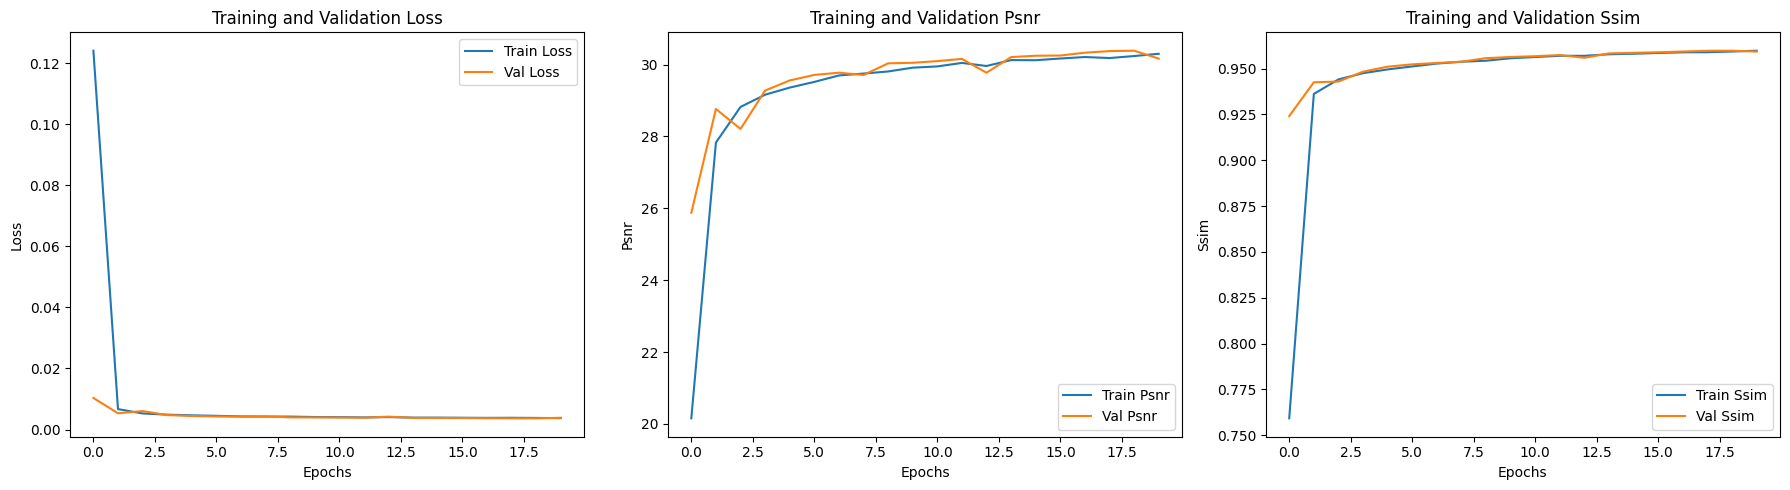

In [ ]:
import matplotlib.pyplot as plt

# Function to plot metrics
def plot_training_history(trainer):
    metrics = ['loss', 'psnr', 'ssim']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for idx, metric in enumerate(metrics):
        axes[idx].plot(trainer.train_history[metric], label=f"Train {metric.capitalize()}")
        axes[idx].plot(trainer.val_history[metric], label=f"Val {metric.capitalize()}")
        axes[idx].set_title(f"Training and Validation {metric.capitalize()}")
        axes[idx].set_xlabel("Epochs")
        axes[idx].set_ylabel(metric.capitalize())
        axes[idx].legend()

    plt.tight_layout()
    plt.savefig("training_history.png")
    plt.show()

# Call the function after training
plot_training_history(trainer)


In [ ]:
def evaluate_on_test_set(model, test_loader, criterion, device='cuda'):
    """
    Evaluate the model on the test set and compute average metrics.
    Args:
        model: Trained model.
        test_loader: DataLoader for the test dataset.
        criterion: Loss function.
        device: Device (CPU or GPU).

    Returns:
        Average test loss, PSNR, and SSIM.
    """
    model.eval()
    total_loss, total_psnr, total_ssim, num_batches = 0, 0, 0, 0

    with torch.no_grad():
        for noisy_images, clean_images in tqdm(test_loader, desc="Testing"):
            noisy_images = noisy_images.to(device, dtype=torch.float32)
            clean_images = clean_images.to(device, dtype=torch.float32)

            # Forward pass
            outputs = model(noisy_images)
            loss = criterion(outputs, clean_images)

            # Compute metrics
            psnr_score = psnr(outputs, clean_images, data_range=2.0).item()
            ssim_score = ssim(outputs, clean_images, data_range=2.0).item()

            total_loss += loss.item()
            total_psnr += psnr_score
            total_ssim += ssim_score
            num_batches += 1

    # Calculate averages
    avg_loss = total_loss / num_batches
    avg_psnr = total_psnr / num_batches
    avg_ssim = total_ssim / num_batches

    return avg_loss, avg_psnr, avg_ssim

test_loss, test_psnr, test_ssim = evaluate_on_test_set(model, test_loaders['low_gaussian_noise'], criterion, device)
print(f"\nTest Set Metrics:\nLoss: {test_loss:.4f}, PSNR: {test_psnr:.4f}, SSIM: {test_ssim:.4f}")


Testing:   0%|          | 0/113 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `peak_signal_noise_ratio` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `peak_signal_noise_ratio` from `torchmetrics.image` instead.
  _future_warning(
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(
Testing: 100%|██████████| 113/113 [00:06<00:00, 17.18it/s]


Test Set Metrics:
Loss: 0.0039, PSNR: 30.1480, SSIM: 0.9593


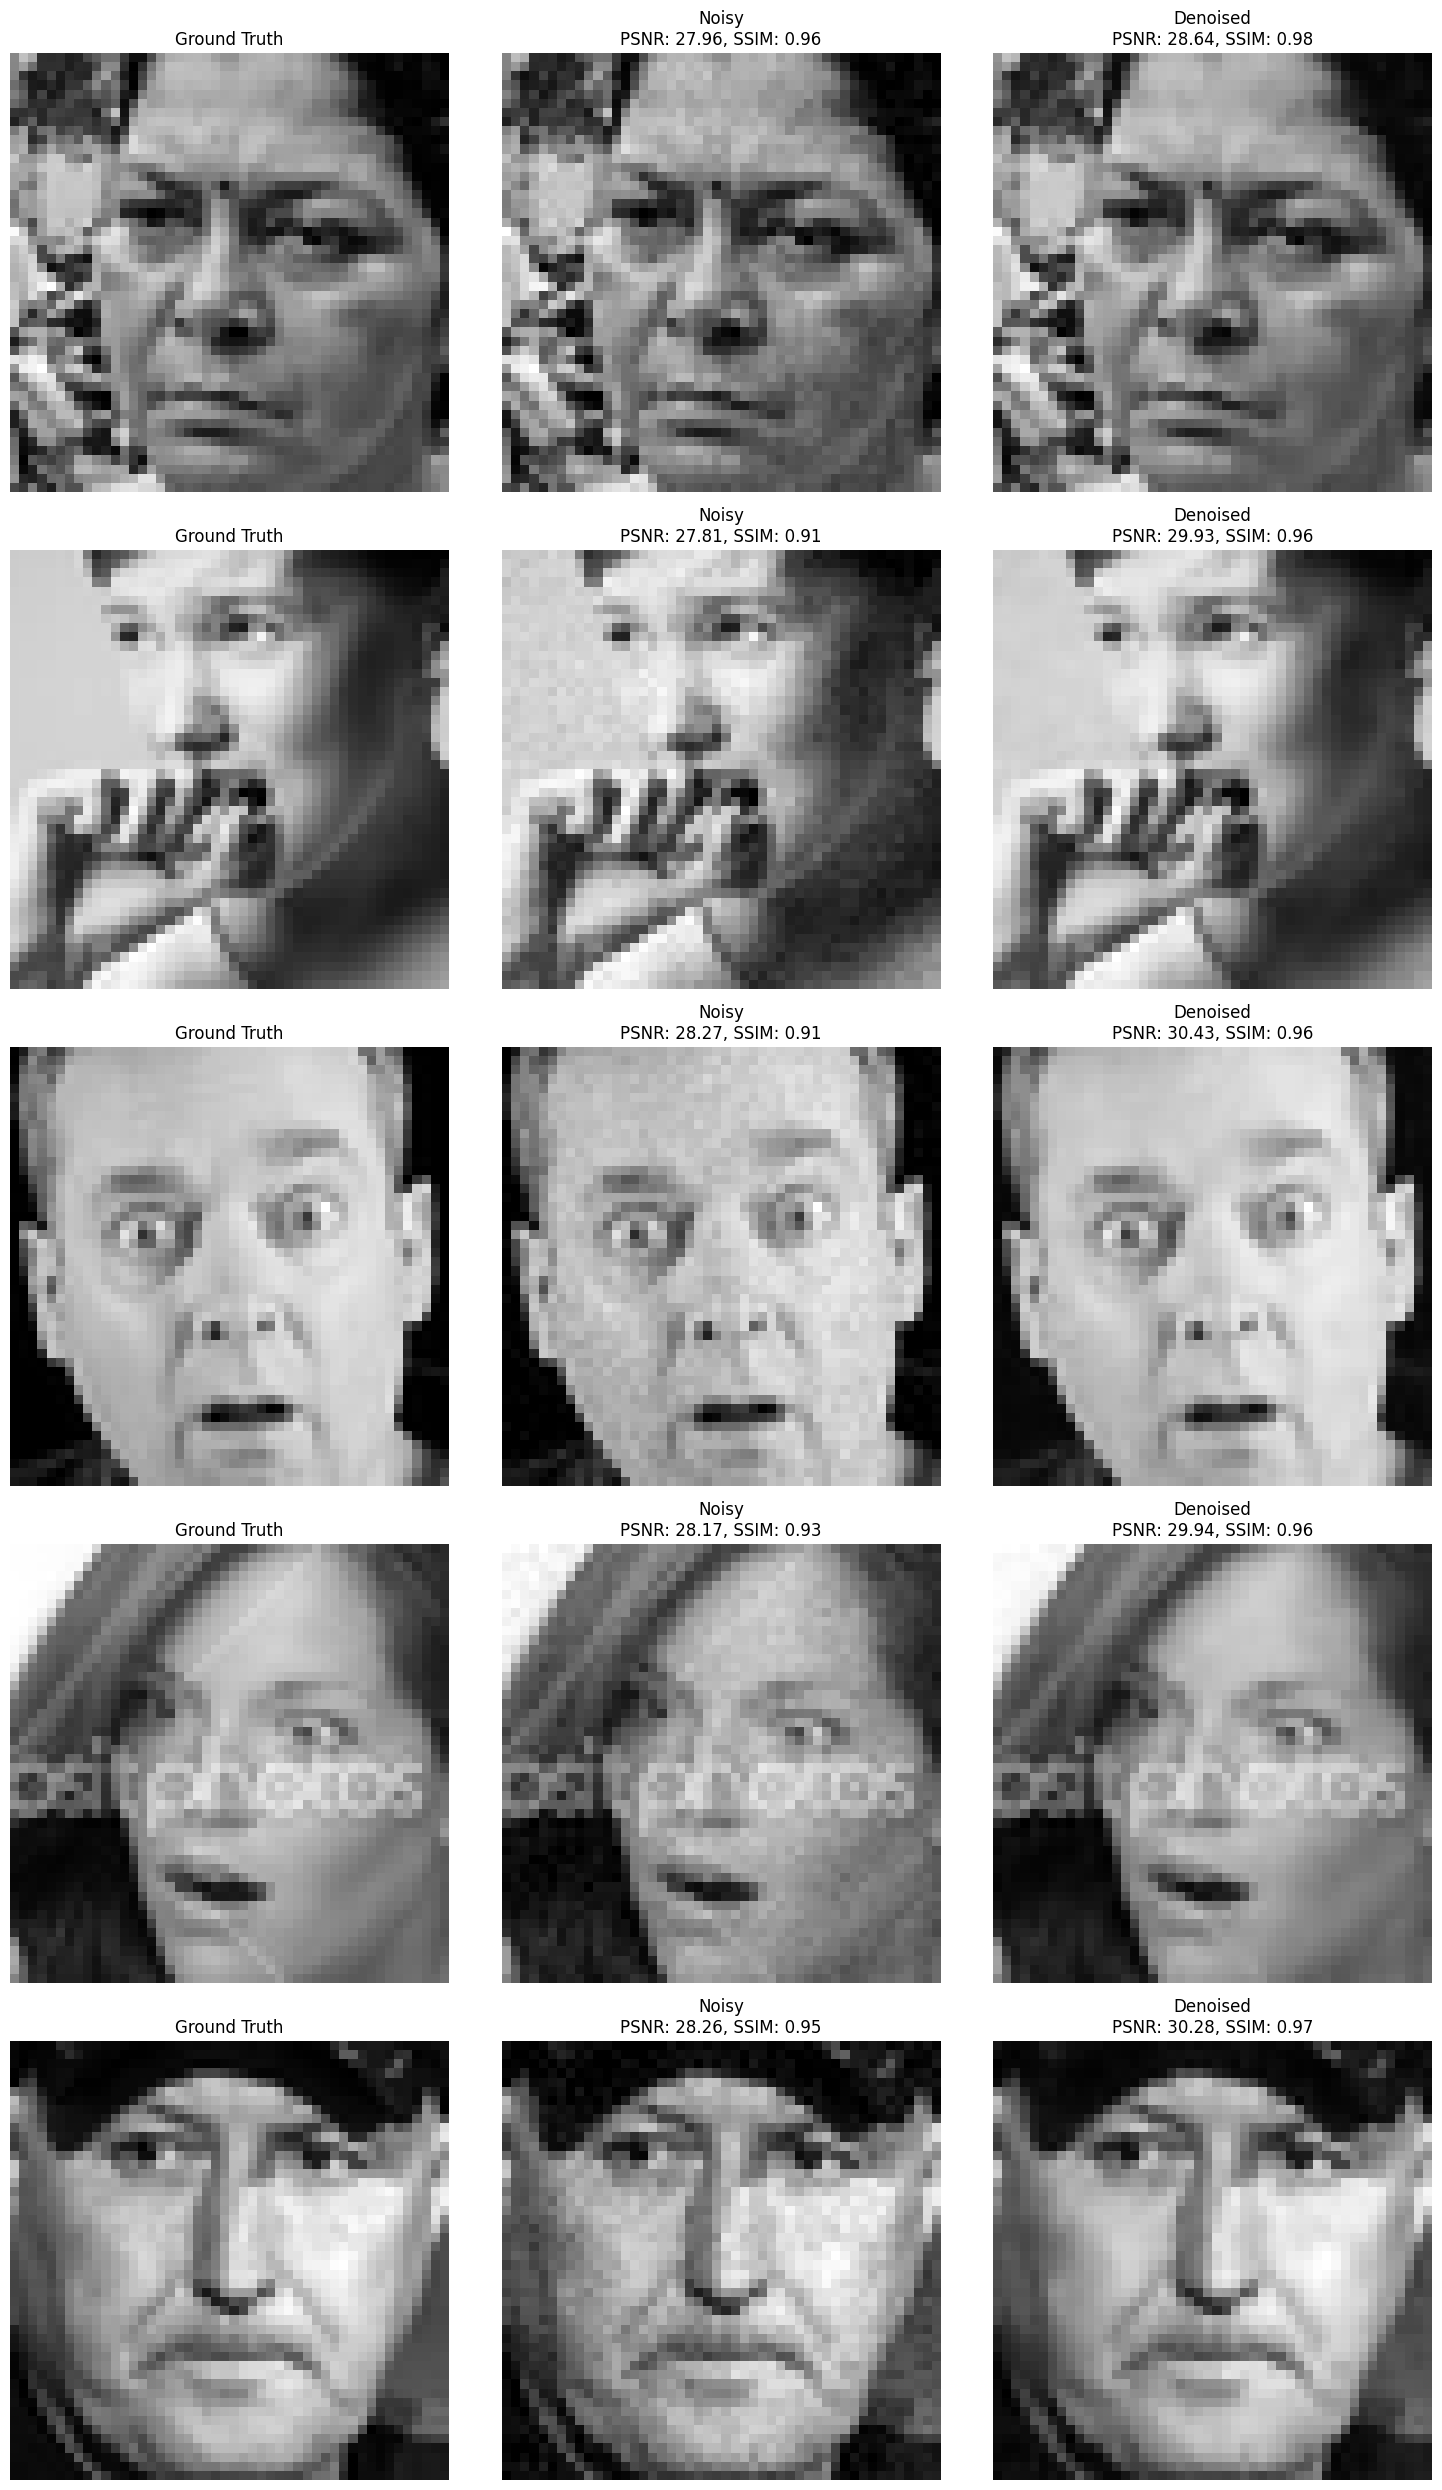

In [ ]:
def visualize_predictions(model, loader, device='cuda', num_samples=5):
    """
    Visualize model predictions alongside metrics for a subset of samples.

    Args:
        model: Trained model.
        loader: DataLoader for the test dataset.
        device: Device (CPU or GPU).
        num_samples: Number of samples to visualize.
    """
    model.eval()
    with torch.no_grad():
        for noisy_images, clean_images in loader:
            noisy_images = noisy_images.to(device, dtype=torch.float32)
            clean_images = clean_images.to(device, dtype=torch.float32)

            # Get model predictions
            denoised_images = model(noisy_images)

            # Select the first `num_samples`
            noisy_images = noisy_images[:num_samples].cpu()
            clean_images = clean_images[:num_samples].cpu()
            denoised_images = denoised_images[:num_samples].cpu()

            # Plot each sample
            num_cols = 3
            fig, axes = plt.subplots(num_samples, num_cols, figsize=(15, 5 * num_samples))
            for i in range(num_samples):
                # Compute metrics
                psnr_noisy = psnr(noisy_images[i].unsqueeze(0), clean_images[i].unsqueeze(0), data_range=2.0).item()
                ssim_noisy = ssim(noisy_images[i].unsqueeze(0), clean_images[i].unsqueeze(0), data_range=2.0).item()
                psnr_denoised = psnr(denoised_images[i].unsqueeze(0), clean_images[i].unsqueeze(0), data_range=2.0).item()
                ssim_denoised = ssim(denoised_images[i].unsqueeze(0), clean_images[i].unsqueeze(0), data_range=2.0).item()

                # Plot ground truth
                axes[i, 0].imshow(clean_images[i][0], cmap='gray')
                axes[i, 0].set_title("Ground Truth")
                axes[i, 0].axis('off')

                # Plot noisy image
                axes[i, 1].imshow(noisy_images[i][0], cmap='gray')
                axes[i, 1].set_title(f"Noisy\nPSNR: {psnr_noisy:.2f}, SSIM: {ssim_noisy:.2f}")
                axes[i, 1].axis('off')

                # Plot denoised image
                axes[i, 2].imshow(denoised_images[i][0], cmap='gray')
                axes[i, 2].set_title(f"Denoised\nPSNR: {psnr_denoised:.2f}, SSIM: {ssim_denoised:.2f}")
                axes[i, 2].axis('off')

            plt.tight_layout()
            plt.savefig("prediction_visualization.png")
            plt.show()
            break  # Only process one batch

# Example usage
visualize_predictions(model, test_loaders['low_gaussian_noise'], device=device, num_samples=5)


### GAN

#### trainer

In [ ]:
from tqdm import tqdm
import torch
import torch.nn.functional as F
from torchmetrics.functional import structural_similarity_index_measure as ssim
from torchmetrics.functional import peak_signal_noise_ratio as psnr
import json

class GANTrainer:
    def __init__(self, generator, discriminator, train_loader, val_loader, gen_optimizer, disc_optimizer, gen_criterion, device='cuda'):
        """
        Initialize the GAN trainer.

        Args:
            generator (nn.Module): The generator model.
            discriminator (nn.Module): The discriminator model.
            train_loader (DataLoader): Training dataset loader.
            val_loader (DataLoader): Validation dataset loader.
            gen_optimizer (Optimizer): Optimizer for the generator.
            disc_optimizer (Optimizer): Optimizer for the discriminator.
            gen_criterion (Loss): Loss function for the generator.
            device (str): Device to use ('cuda' or 'cpu').
        """
        self.generator = generator.to(device)
        self.discriminator = discriminator.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.gen_optimizer = gen_optimizer
        self.disc_optimizer = disc_optimizer
        self.gen_criterion = gen_criterion
        self.device = device

        # Logging
        self.train_history = {'gen_loss': [], 'disc_loss': [], 'psnr': [], 'ssim': []}
        self.val_history = {'gen_loss': [], 'disc_loss': [], 'psnr': [], 'ssim': []}

        # Best model tracking
        self.best_val_loss = float('inf')

    def compute_metrics(self, clean_images, generated_images):
        """Compute PSNR and SSIM for a batch."""
        psnr_score = psnr(generated_images, clean_images, data_range=1.0).item()
        ssim_score = ssim(generated_images, clean_images, data_range=1.0).item()
        return psnr_score, ssim_score

    def train_epoch(self):
        """Train the GAN for one epoch."""
        self.generator.train()
        self.discriminator.train()
        total_gen_loss, total_disc_loss, total_psnr, total_ssim, num_batches = 0, 0, 0, 0, 0

        for noisy_images, clean_images in tqdm(self.train_loader, desc="Training"):
            noisy_images = noisy_images.to(self.device, dtype=torch.float32)
            clean_images = clean_images.to(self.device, dtype=torch.float32)

            ### Train Discriminator ###
            self.disc_optimizer.zero_grad()

            # Generate fake images
            fake_images = self.generator(noisy_images)

            # Discriminator predictions
            real_preds = self.discriminator(noisy_images, clean_images)  # Output: Bx1x8x8
            fake_preds = self.discriminator(noisy_images, fake_images.detach())  # Output: Bx1x8x8

            # Targets must match discriminator output shape
            real_targets = torch.ones_like(real_preds, device=self.device)
            fake_targets = torch.zeros_like(fake_preds, device=self.device)

            # Compute discriminator loss
            real_loss = F.binary_cross_entropy_with_logits(real_preds, real_targets)
            fake_loss = F.binary_cross_entropy_with_logits(fake_preds, fake_targets)
            disc_loss = (real_loss + fake_loss) / 2
            disc_loss.backward()
            self.disc_optimizer.step()

            ### Train Generator ###
            self.gen_optimizer.zero_grad()

            # Recompute fake images and discriminator output
            fake_preds = self.discriminator(noisy_images, fake_images)

            # Generator loss: L2 loss + adversarial loss
            l2_loss = self.gen_criterion(fake_images, clean_images)
            adversarial_loss = F.binary_cross_entropy_with_logits(fake_preds, real_targets)  # Use real targets
            gen_loss = l2_loss + 0.001 * adversarial_loss
            gen_loss.backward()
            self.gen_optimizer.step()

            # Compute metrics
            psnr_score, ssim_score = self.compute_metrics(clean_images, fake_images)
            total_gen_loss += gen_loss.item()
            total_disc_loss += disc_loss.item()
            total_psnr += psnr_score
            total_ssim += ssim_score
            num_batches += 1

        return total_gen_loss / num_batches, total_disc_loss / num_batches, total_psnr / num_batches, total_ssim / num_batches

    def validate_epoch(self):
        """Validate the GAN for one epoch."""
        self.generator.eval()
        self.discriminator.eval()
        total_gen_loss, total_disc_loss, total_psnr, total_ssim, num_batches = 0, 0, 0, 0, 0

        with torch.no_grad():
            for noisy_images, clean_images in tqdm(self.val_loader, desc="Validating"):
                noisy_images = noisy_images.to(self.device, dtype=torch.float32)
                clean_images = clean_images.to(self.device, dtype=torch.float32)

                # Generate fake images
                fake_images = self.generator(noisy_images)

                # Discriminator predictions
                real_preds = self.discriminator(noisy_images, clean_images)
                fake_preds = self.discriminator(noisy_images, fake_images)

                real_targets = torch.full_like(real_preds, 0.9, device=self.device)  # Smoothed real labels
                fake_targets = torch.full_like(fake_preds, 0.1, device=self.device)  # Smoothed fake labels


                # Compute losses
                real_loss = F.binary_cross_entropy_with_logits(real_preds, real_targets)
                fake_loss = F.binary_cross_entropy_with_logits(fake_preds, fake_targets)
                disc_loss = (real_loss + fake_loss) / 2

                l2_loss = self.gen_criterion(fake_images, clean_images)
                adversarial_loss = F.binary_cross_entropy_with_logits(fake_preds, real_targets)
                gen_loss = l2_loss + 0.001 * adversarial_loss

                # Compute metrics
                psnr_score, ssim_score = self.compute_metrics(clean_images, fake_images)
                total_gen_loss += gen_loss.item()
                total_disc_loss += disc_loss.item()
                total_psnr += psnr_score
                total_ssim += ssim_score
                num_batches += 1

        return total_gen_loss / num_batches, total_disc_loss / num_batches, total_psnr / num_batches, total_ssim / num_batches

    def fit(self, num_epochs, gen_save_path='generator.pth', disc_save_path='discriminator.pth', history_path='final_training_history.json'):
        """
        Train the GAN model and save metrics at the end of training.
        Args:
            num_epochs (int): Number of epochs.
            save_path (str): Path to save the generator model.
            history_path (str): Path to save the final comprehensive training history.
        """
        for epoch in range(num_epochs):
            print(f"\nEpoch {epoch + 1}/{num_epochs}")

            # Training
            train_gen_loss, train_disc_loss, train_psnr, train_ssim = self.train_epoch()
            self.train_history['gen_loss'].append(train_gen_loss)
            self.train_history['disc_loss'].append(train_disc_loss)
            self.train_history['psnr'].append(train_psnr)
            self.train_history['ssim'].append(train_ssim)

            # Validation
            val_gen_loss, val_disc_loss, val_psnr, val_ssim = self.validate_epoch()
            self.val_history['gen_loss'].append(val_gen_loss)
            self.val_history['disc_loss'].append(val_disc_loss)
            self.val_history['psnr'].append(val_psnr)
            self.val_history['ssim'].append(val_ssim)

            # Logging
            print(f"Train Gen Loss: {train_gen_loss:.4f}, Train Disc Loss: {train_disc_loss:.4f}, PSNR: {train_psnr:.4f}, SSIM: {train_ssim:.4f}")
            print(f"Val Gen Loss: {val_gen_loss:.4f}, Val Disc Loss: {val_disc_loss:.4f}, PSNR: {val_psnr:.4f}, SSIM: {val_ssim:.4f}")

            # Save the best generator model
            if val_gen_loss < self.best_val_loss:
                print(f"Validation generator loss improved. Saving models to {gen_save_path} and {disc_save_path}...")
                torch.save(self.generator.state_dict(), gen_save_path)
                torch.save(self.discriminator.state_dict(), disc_save_path)
                self.best_val_loss = val_gen_loss

        # Save all metrics at the end of training
        self.save_final_metrics(history_path)

    def save_final_metrics(self, path):
        """
        Save the final training and validation history to a file.
        Args:
            path (str): Path to save the history as a JSON file.
        """
        history = {
            'train_history': self.train_history,
            'val_history': self.val_history,
        }
        with open(path, 'w') as f:
            json.dump(history, f, indent=4)
        print(f"Final training and validation history saved to {path}")

    def load_history(self, path):
        """
        Load training and validation history from a JSON file.
        Args:
            path (str): Path to the history JSON file.
        """
        with open(path, 'r') as f:
            history = json.load(f)
        self.train_history = history['train_history']
        self.val_history = history['val_history']
        print(f"History loaded from {path}")

#### test, configuration, training

##### V1

In [ ]:
# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize Models
discriminator = PatchGANDiscriminator(in_channels=2, base_channels=32, stride=2, padding=1, debug=True).to(device)

# Create dummy inputs
noisy_input = torch.randn(2, 1, 48, 48).to(device)  # Noisy image
generated_input = torch.randn(2, 1, 48, 48).to(device)  # Generated image

# Test the discriminator
print("\nTesting PatchGANDiscriminator:")
output = discriminator(noisy_input, generated_input)



Testing PatchGANDiscriminator:
Input to PatchGANDiscriminator: torch.Size([2, 2, 48, 48])
Input to EncoderBlock: torch.Size([2, 2, 48, 48])
After ConvBlock: torch.Size([2, 32, 48, 48])
After AttentionBlock: torch.Size([2, 32, 48, 48])
After Pooling: torch.Size([2, 32, 25, 25])
After enc1 - Features: torch.Size([2, 32, 48, 48]), Downsampled: torch.Size([2, 32, 25, 25])
Input to EncoderBlock: torch.Size([2, 32, 25, 25])
After ConvBlock: torch.Size([2, 64, 25, 25])
After AttentionBlock: torch.Size([2, 64, 25, 25])
After Pooling: torch.Size([2, 64, 13, 13])
After enc2 - Features: torch.Size([2, 64, 25, 25]), Downsampled: torch.Size([2, 64, 13, 13])
Input to EncoderBlock: torch.Size([2, 64, 13, 13])
After ConvBlock: torch.Size([2, 128, 13, 13])
After AttentionBlock: torch.Size([2, 128, 13, 13])
After Pooling: torch.Size([2, 128, 7, 7])
After enc3 - Features: torch.Size([2, 128, 13, 13]), Downsampled: torch.Size([2, 128, 7, 7])
Input to EncoderBlock: torch.Size([2, 128, 7, 7])
After ConvBlo

##### V2

In [ ]:
# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize Models
discriminator = PatchGANDiscriminator(in_channels=2, base_channels=32, stride=[2, 1, 1, 1, 1, 1], padding=[1, 0, 0, 0, 0, 0], debug=True).to(device)

# Create dummy inputs
noisy_input = torch.randn(2, 1, 48, 48).to(device)  # Noisy image
generated_input = torch.randn(2, 1, 48, 48).to(device)  # Generated image

# Test the discriminator
print("\nTesting PatchGANDiscriminator:")
output = discriminator(noisy_input, generated_input)



Testing PatchGANDiscriminator:
Input to PatchGANDiscriminator: torch.Size([2, 2, 48, 48])
Input to EncoderBlock: torch.Size([2, 2, 48, 48])
After ConvBlock: torch.Size([2, 32, 48, 48])
After AttentionBlock: torch.Size([2, 32, 48, 48])
After Pooling: torch.Size([2, 32, 25, 25])
After enc1 - Features: torch.Size([2, 32, 48, 48]), Downsampled: torch.Size([2, 32, 25, 25])
Input to EncoderBlock: torch.Size([2, 32, 25, 25])
After ConvBlock: torch.Size([2, 64, 25, 25])
After AttentionBlock: torch.Size([2, 64, 25, 25])
After Pooling: torch.Size([2, 64, 24, 24])
After enc2 - Features: torch.Size([2, 64, 25, 25]), Downsampled: torch.Size([2, 64, 24, 24])
Input to EncoderBlock: torch.Size([2, 64, 24, 24])
After ConvBlock: torch.Size([2, 128, 24, 24])
After AttentionBlock: torch.Size([2, 128, 24, 24])
After Pooling: torch.Size([2, 128, 23, 23])
After enc3 - Features: torch.Size([2, 128, 24, 24]), Downsampled: torch.Size([2, 128, 23, 23])
Input to EncoderBlock: torch.Size([2, 128, 23, 23])
After C

##### V3

In [ ]:
# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize Models
discriminator = PatchGANDiscriminator(in_channels=2, base_channels=32, stride=[2, 2, 1, 1, 1, 1], padding=[0, 0, 0, 0, 0, 0], use_fc=True, global_pooling=True, debug=True).to(device)

# Create dummy inputs
noisy_input = torch.randn(2, 1, 48, 48).to(device)  # Noisy image
generated_input = torch.randn(2, 1, 48, 48).to(device)  # Generated image

# Test the discriminator
print("\nTesting PatchGANDiscriminator:")
output = discriminator(noisy_input, generated_input)



Testing PatchGANDiscriminator:
Input to PatchGANDiscriminator: torch.Size([2, 2, 48, 48])
Input to EncoderBlock: torch.Size([2, 2, 48, 48])
After ConvBlock: torch.Size([2, 32, 48, 48])
After AttentionBlock: torch.Size([2, 32, 48, 48])
After Pooling: torch.Size([2, 32, 24, 24])
Input to EncoderBlock: torch.Size([2, 32, 24, 24])
After ConvBlock: torch.Size([2, 64, 24, 24])
After Pooling: torch.Size([2, 64, 12, 12])
Output of final_conv: torch.Size([2, 1, 23, 23])
input of FC before global avg: 2, 64, 24, 24
input of FC after global avg: torch.Size([2, 64])
after  FC: torch.Size([2, 144])


RuntimeError: shape '[2, 1, 24, 24]' is invalid for input of size 288

##### V2

In [ ]:
from torchsummary import summary

class PatchGANWrapper(nn.Module):
    """
    A wrapper to enable testing the PatchGAN Discriminator with torchsummary.
    It combines the noisy and generated inputs into a single tensor.
    """
    def __init__(self, discriminator):
        super(PatchGANWrapper, self).__init__()
        self.discriminator = discriminator

    def forward(self, combined_input):
        # Split the combined input into two parts
        noisy_input, generated_input = torch.chunk(combined_input, chunks=2, dim=1)
        return self.discriminator(noisy_input, generated_input)


# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the PatchGAN Discriminator and its wrapper
discriminator = PatchGANDiscriminator(in_channels=2, base_channels=32, stride=[2, 1, 1, 1, 1, 1], padding=[1, 0, 0, 0, 0, 0]).to(device)
discriminator_wrapper = PatchGANWrapper(discriminator).to(device)

# Test Input Shapes
combined_input = torch.randn(1, 2, 48, 48).to(device)  # Combine noisy and generated inputs

# Display Model Summary
print("\nPatchGAN Discriminator Summary:")
summary(discriminator_wrapper, input_size=combined_input.shape[1:])



PatchGAN Discriminator Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 48]             608
              ReLU-2           [-1, 32, 48, 48]               0
       BatchNorm2d-3           [-1, 32, 48, 48]              64
            Conv2d-4           [-1, 32, 48, 48]           9,248
              ReLU-5           [-1, 32, 48, 48]               0
         ConvBlock-6           [-1, 32, 48, 48]               0
            Conv2d-7           [-1, 32, 48, 48]           1,056
            Conv2d-8           [-1, 32, 48, 48]           1,056
            Conv2d-9            [-1, 1, 48, 48]              33
          Sigmoid-10            [-1, 1, 48, 48]               0
   AttentionBlock-11           [-1, 32, 48, 48]               0
        MaxPool2d-12           [-1, 32, 25, 25]               0
     EncoderBlock-13  [[-1, 32, 48, 48], [-1, 32, 25, 25]]            

##### V3

In [ ]:
from torchsummary import summary

class PatchGANWrapper(nn.Module):
    """
    A wrapper to enable testing the PatchGAN Discriminator with torchsummary.
    It combines the noisy and generated inputs into a single tensor.
    """
    def __init__(self, discriminator):
        super(PatchGANWrapper, self).__init__()
        self.discriminator = discriminator

    def forward(self, combined_input):
        # Split the combined input into two parts
        noisy_input, generated_input = torch.chunk(combined_input, chunks=2, dim=1)
        return self.discriminator(noisy_input, generated_input)


# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the PatchGAN Discriminator and its wrapper
discriminator = PatchGANDiscriminator(in_channels=2, base_channels=32, stride=[2, 1, 1, 1, 1, 1], padding=[0, 0, 0, 0, 0, 0], use_fc=True, global_pooling=True).to(device)
discriminator_wrapper = PatchGANWrapper(discriminator).to(device)

# Test Input Shapes
combined_input = torch.randn(1, 2, 48, 48).to(device)  # Combine noisy and generated inputs

# Display Model Summary
print("\nPatchGAN Discriminator Summary:")
summary(discriminator_wrapper, input_size=combined_input.shape[1:])



PatchGAN Discriminator Summary:


RuntimeError: shape '[2, 1, 23, 23]' is invalid for input of size 968

In [ ]:
# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize Models
generator = AttentionUNet(in_channels=1, out_channels=1, use_attention=True).to(device)
discriminator = PatchGANDiscriminator(in_channels=2, base_channels=32, stride=[2, 1, 1, 1, 1, 1], padding=[0, 0, 0, 0, 0, 0]).to(device)

# Optimizers
gen_optimizer = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.5, 0.999))
disc_optimizer = optim.Adam(discriminator.parameters(), lr=1e-4, betas=(0.5, 0.999))

# Loss Function for the Generator
gen_criterion = nn.MSELoss()

# Train and validation DataLoaders (assume they are already defined)
train_loader = train_loaders['low_gaussian_noise']
val_loader = val_loaders['low_gaussian_noise']


In [ ]:
# Initialize GAN Trainer
gan_trainer = GANTrainer(
    generator=generator,
    discriminator=discriminator,
    train_loader=train_loader,
    val_loader=val_loader,
    gen_optimizer=gen_optimizer,
    disc_optimizer=disc_optimizer,
    gen_criterion=gen_criterion,
    device=device
)

# Paths to save the models and training history
gen_save_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth"
disc_save_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth"
history_save_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_training_history_v2.json"



In [ ]:
# Train the GAN
gan_trainer.fit(
    num_epochs=20,
    gen_save_path=gen_save_path,
    disc_save_path=disc_save_path,
    history_path=history_save_path
)


Epoch 1/20


Training:   0%|          | 0/449 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `peak_signal_noise_ratio` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `peak_signal_noise_ratio` from `torchmetrics.image` instead.
  _future_warning(
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(
Validating: 100%|██████████| 57/57 [00:03<00:00, 14.91it/s]


Train Gen Loss: 0.2544, Train Disc Loss: 0.1695, PSNR: 9.5880, SSIM: 0.5845
Val Gen Loss: 0.0355, Val Disc Loss: 1.3200, PSNR: 14.8032, SSIM: 0.8148
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 2/20


Validating: 100%|██████████| 57/57 [00:05<00:00, 10.04it/s]


Train Gen Loss: 0.0316, Train Disc Loss: 0.2210, PSNR: 15.5479, SSIM: 0.8316
Val Gen Loss: 0.0264, Val Disc Loss: 1.8716, PSNR: 16.6565, SSIM: 0.8174
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 3/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.20it/s]


Train Gen Loss: 0.0246, Train Disc Loss: 0.2265, PSNR: 16.8404, SSIM: 0.8565
Val Gen Loss: 0.0190, Val Disc Loss: 2.1051, PSNR: 18.1777, SSIM: 0.8805
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 4/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 11.86it/s]


Train Gen Loss: 0.0237, Train Disc Loss: 0.0365, PSNR: 17.6337, SSIM: 0.8663
Val Gen Loss: 0.0194, Val Disc Loss: 3.4961, PSNR: 18.9508, SSIM: 0.8946

Epoch 5/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 12.17it/s]


Train Gen Loss: 0.0210, Train Disc Loss: 0.1129, PSNR: 18.2012, SSIM: 0.8738
Val Gen Loss: 0.0173, Val Disc Loss: 3.4855, PSNR: 19.5339, SSIM: 0.8985
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 6/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.14it/s]


Train Gen Loss: 0.0213, Train Disc Loss: 0.0593, PSNR: 18.4825, SSIM: 0.8780
Val Gen Loss: 0.0154, Val Disc Loss: 2.9915, PSNR: 19.9360, SSIM: 0.9019
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 7/20


Validating: 100%|██████████| 57/57 [00:05<00:00,  9.62it/s]


Train Gen Loss: 0.0193, Train Disc Loss: 0.1088, PSNR: 18.8354, SSIM: 0.8830
Val Gen Loss: 0.0154, Val Disc Loss: 2.7663, PSNR: 19.8310, SSIM: 0.8758
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 8/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.69it/s]


Train Gen Loss: 0.0180, Train Disc Loss: 0.1535, PSNR: 19.0035, SSIM: 0.8850
Val Gen Loss: 0.0159, Val Disc Loss: 2.7924, PSNR: 20.0754, SSIM: 0.8765

Epoch 9/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 14.18it/s]


Train Gen Loss: 0.0177, Train Disc Loss: 0.1358, PSNR: 19.2114, SSIM: 0.8863
Val Gen Loss: 0.0152, Val Disc Loss: 2.9190, PSNR: 20.5393, SSIM: 0.8984
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 10/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 12.91it/s]


Train Gen Loss: 0.0165, Train Disc Loss: 0.1576, PSNR: 19.4730, SSIM: 0.8896
Val Gen Loss: 0.0117, Val Disc Loss: 2.1254, PSNR: 21.0403, SSIM: 0.9086
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 11/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.93it/s]


Train Gen Loss: 0.0170, Train Disc Loss: 0.1058, PSNR: 19.6559, SSIM: 0.8903
Val Gen Loss: 0.0166, Val Disc Loss: 3.6897, PSNR: 20.3478, SSIM: 0.8939

Epoch 12/20


Validating: 100%|██████████| 57/57 [00:05<00:00,  9.84it/s]


Train Gen Loss: 0.0158, Train Disc Loss: 0.1949, PSNR: 19.8897, SSIM: 0.8926
Val Gen Loss: 0.0133, Val Disc Loss: 2.0605, PSNR: 20.2886, SSIM: 0.9119

Epoch 13/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.70it/s]


Train Gen Loss: 0.0146, Train Disc Loss: 0.1949, PSNR: 19.9964, SSIM: 0.8973
Val Gen Loss: 0.0115, Val Disc Loss: 2.1509, PSNR: 21.2063, SSIM: 0.9014
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 14/20


Validating: 100%|██████████| 57/57 [00:05<00:00, 10.76it/s]


Train Gen Loss: 0.0138, Train Disc Loss: 0.2591, PSNR: 20.1802, SSIM: 0.9006
Val Gen Loss: 0.0107, Val Disc Loss: 1.8019, PSNR: 21.3098, SSIM: 0.9078
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 15/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.11it/s]


Train Gen Loss: 0.0147, Train Disc Loss: 0.1250, PSNR: 20.1949, SSIM: 0.9002
Val Gen Loss: 0.0116, Val Disc Loss: 2.3785, PSNR: 21.3790, SSIM: 0.9159

Epoch 16/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.64it/s]


Train Gen Loss: 0.0151, Train Disc Loss: 0.1750, PSNR: 20.1626, SSIM: 0.8977
Val Gen Loss: 0.0114, Val Disc Loss: 2.2909, PSNR: 21.3336, SSIM: 0.9101

Epoch 17/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 11.78it/s]


Train Gen Loss: 0.0129, Train Disc Loss: 0.2475, PSNR: 20.5424, SSIM: 0.9061
Val Gen Loss: 0.0102, Val Disc Loss: 1.9086, PSNR: 21.7208, SSIM: 0.9173
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 18/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.37it/s]


Train Gen Loss: 0.0130, Train Disc Loss: 0.1958, PSNR: 20.6323, SSIM: 0.9059
Val Gen Loss: 0.0112, Val Disc Loss: 1.5783, PSNR: 20.9032, SSIM: 0.9166

Epoch 19/20


Validating: 100%|██████████| 57/57 [00:05<00:00, 10.43it/s]


Train Gen Loss: 0.0129, Train Disc Loss: 0.2204, PSNR: 20.7287, SSIM: 0.9070
Val Gen Loss: 0.0082, Val Disc Loss: 0.8398, PSNR: 21.6620, SSIM: 0.9219
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth...

Epoch 20/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.10it/s]

Train Gen Loss: 0.0118, Train Disc Loss: 0.2761, PSNR: 20.7922, SSIM: 0.9088
Val Gen Loss: 0.0089, Val Disc Loss: 1.4391, PSNR: 21.9726, SSIM: 0.9228
Final training and validation history saved to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_training_history_v2.json


##### V1

In [ ]:
import matplotlib.pyplot as plt

def plot_gan_training_history(trainer, path='gan_training_history.png'):
    """
    Plot training and validation history for GAN.
    Args:
        trainer (GANTrainer): The GANTrainer object with training history.
    """
    metrics = ['gen_loss', 'disc_loss', 'psnr', 'ssim']
    titles = ['Generator Loss', 'Discriminator Loss', 'PSNR', 'SSIM']

    fig, axes = plt.subplots(1, 4, figsize=(24, 5))

    for idx, metric in enumerate(metrics):
        axes[idx].plot(trainer.train_history[metric], label=f"Train {titles[idx]}")
        axes[idx].plot(trainer.val_history[metric], label=f"Val {titles[idx]}")
        axes[idx].set_title(f"Training and Validation {titles[idx]}")
        axes[idx].set_xlabel("Epochs")
        axes[idx].set_ylabel(titles[idx])
        axes[idx].legend()

    plt.tight_layout()

    plt.savefig(path)
    plt.show()

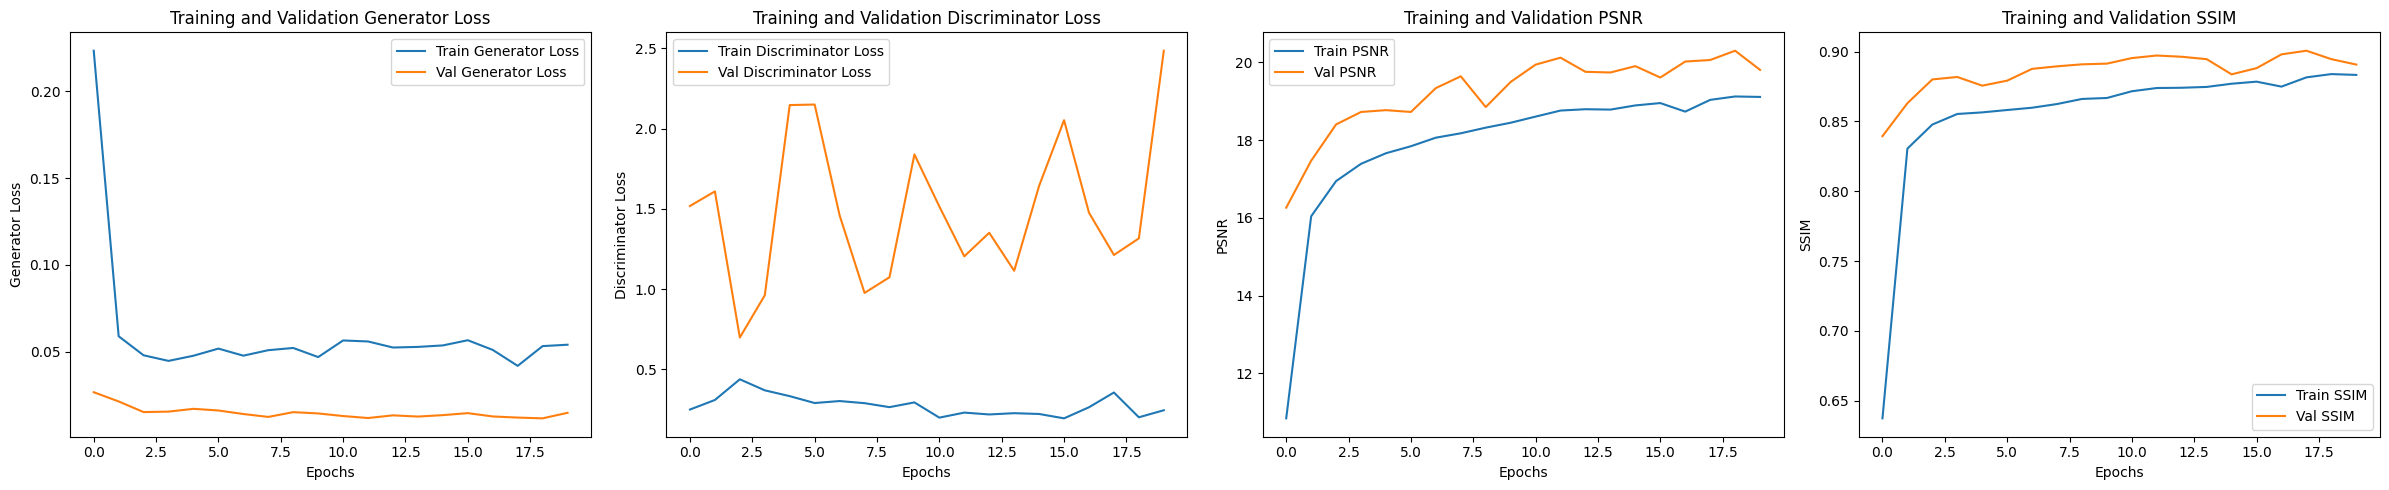

In [ ]:
plot_gan_training_history(gan_trainer)


##### V2

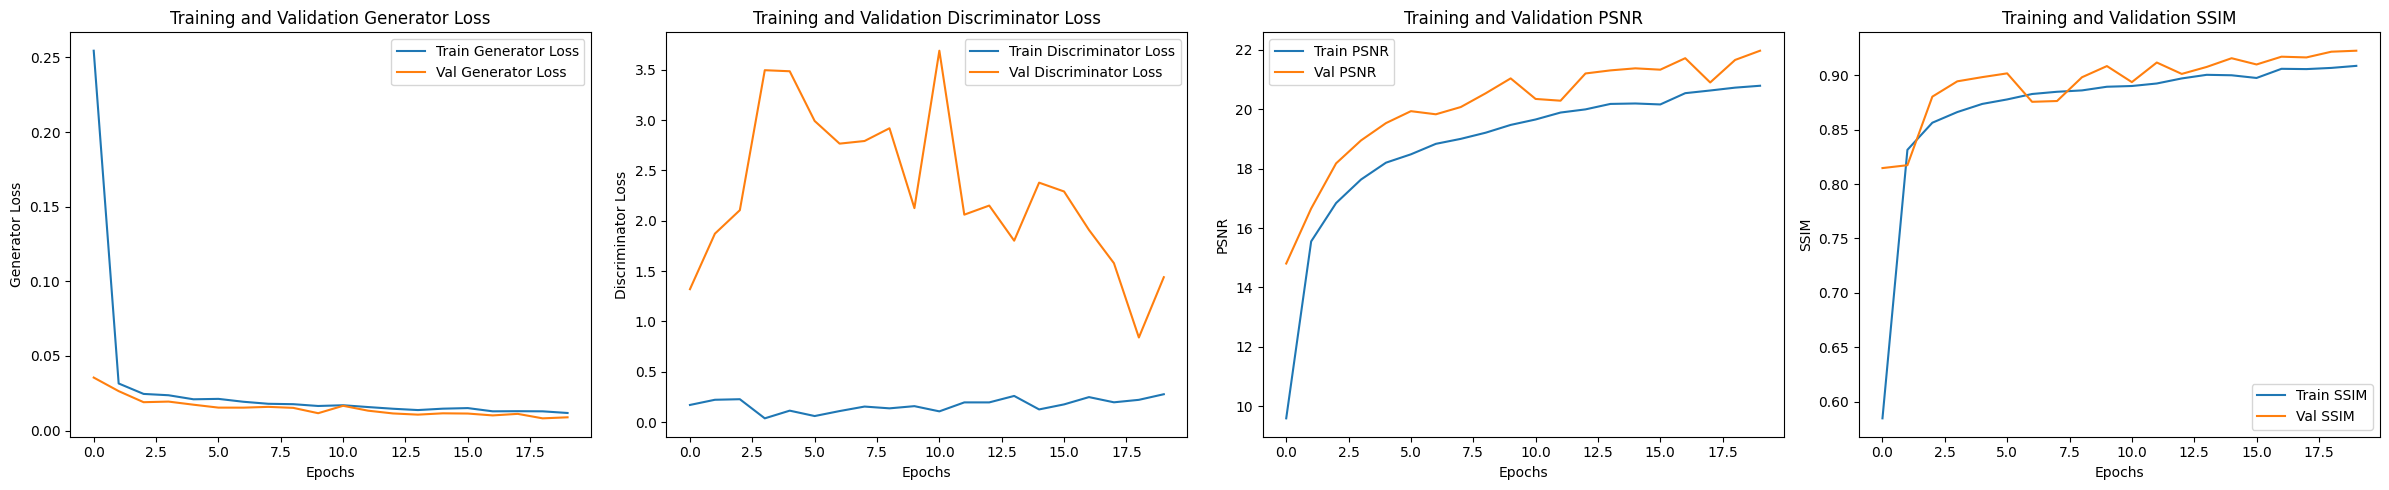

In [ ]:
plot_gan_training_history(gan_trainer, 'gan_training_history_v2.png')


In [ ]:
def evaluate_gan_on_test_set(generator, test_loader, criterion, device='cuda'):
    """
    Evaluate the GAN generator on the test set and compute average metrics.
    Args:
        generator: Trained generator model.
        test_loader: DataLoader for the test dataset.
        criterion: Loss function for the generator.
        device: Device (CPU or GPU).

    Returns:
        Average test loss, PSNR, and SSIM.
    """
    generator.eval()
    total_loss, total_psnr, total_ssim, num_batches = 0, 0, 0, 0

    with torch.no_grad():
        for noisy_images, clean_images in tqdm(test_loader, desc="Testing"):
            noisy_images = noisy_images.to(device, dtype=torch.float32)
            clean_images = clean_images.to(device, dtype=torch.float32)

            # Generate fake images
            generated_images = generator(noisy_images)
            loss = criterion(generated_images, clean_images)

            # Compute metrics
            psnr_score = psnr(generated_images, clean_images, data_range=1.0).item()
            ssim_score = ssim(generated_images, clean_images, data_range=1.0).item()

            total_loss += loss.item()
            total_psnr += psnr_score
            total_ssim += ssim_score
            num_batches += 1

    avg_loss = total_loss / num_batches
    avg_psnr = total_psnr / num_batches
    avg_ssim = total_ssim / num_batches

    return avg_loss, avg_psnr, avg_ssim


##### V1

In [ ]:
# Example usage
test_loss, test_psnr, test_ssim = evaluate_gan_on_test_set(generator, test_loaders['low_gaussian_noise'], gen_criterion, device)
print(f"\nTest Set Metrics:\nLoss: {test_loss:.4f}, PSNR: {test_psnr:.4f}, SSIM: {test_ssim:.4f}")


Testing: 100%|██████████| 57/57 [00:02<00:00, 19.29it/s]


Test Set Metrics:
Loss: 0.0105, PSNR: 19.7766, SSIM: 0.8912


##### V2

In [ ]:
# Example usage
test_loss, test_psnr, test_ssim = evaluate_gan_on_test_set(generator, test_loaders['low_gaussian_noise'], gen_criterion, device)
print(f"\nTest Set Metrics:\nLoss: {test_loss:.4f}, PSNR: {test_psnr:.4f}, SSIM: {test_ssim:.4f}")


Testing:   0%|          | 0/57 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `peak_signal_noise_ratio` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `peak_signal_noise_ratio` from `torchmetrics.image` instead.
  _future_warning(
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(
Testing: 100%|██████████| 57/57 [00:03<00:00, 18.55it/s]


Test Set Metrics:
Loss: 0.0064, PSNR: 21.9678, SSIM: 0.9221


In [ ]:
def visualize_gan_predictions(generator, loader, device='cuda', num_samples=5):
    """
    Visualize generator predictions alongside noisy and clean images.

    Args:
        generator: Trained generator model.
        loader: DataLoader for the test dataset.
        device: Device (CPU or GPU).
        num_samples: Number of samples to visualize.
    """
    generator.eval()
    with torch.no_grad():
        for noisy_images, clean_images in loader:
            noisy_images = noisy_images.to(device, dtype=torch.float32)
            clean_images = clean_images.to(device, dtype=torch.float32)

            # Generate fake images
            generated_images = generator(noisy_images)

            # Select the first `num_samples`
            noisy_images = noisy_images[:num_samples].cpu()
            clean_images = clean_images[:num_samples].cpu()
            generated_images = generated_images[:num_samples].cpu()

            # Plot each sample
            num_cols = 3
            fig, axes = plt.subplots(num_samples, num_cols, figsize=(15, 5 * num_samples))
            for i in range(num_samples):
                # Compute metrics
                psnr_noisy = psnr(noisy_images[i].unsqueeze(0), clean_images[i].unsqueeze(0), data_range=1.0).item()
                ssim_noisy = ssim(noisy_images[i].unsqueeze(0), clean_images[i].unsqueeze(0), data_range=1.0).item()
                psnr_generated = psnr(generated_images[i].unsqueeze(0), clean_images[i].unsqueeze(0), data_range=1.0).item()
                ssim_generated = ssim(generated_images[i].unsqueeze(0), clean_images[i].unsqueeze(0), data_range=1.0).item()

                # Plot ground truth
                axes[i, 0].imshow(clean_images[i][0], cmap='gray')
                axes[i, 0].set_title("Ground Truth")
                axes[i, 0].axis('off')

                # Plot noisy image
                axes[i, 1].imshow(noisy_images[i][0], cmap='gray')
                axes[i, 1].set_title(f"Noisy\nPSNR: {psnr_noisy:.2f}, SSIM: {ssim_noisy:.2f}")
                axes[i, 1].axis('off')

                # Plot generated image
                axes[i, 2].imshow(generated_images[i][0], cmap='gray')
                axes[i, 2].set_title(f"Generated\nPSNR: {psnr_generated:.2f}, SSIM: {ssim_generated:.2f}")
                axes[i, 2].axis('off')

            plt.tight_layout()
            plt.savefig("gan_prediction_visualization.png")
            plt.show()
            break  # Only process one batch

##### V1

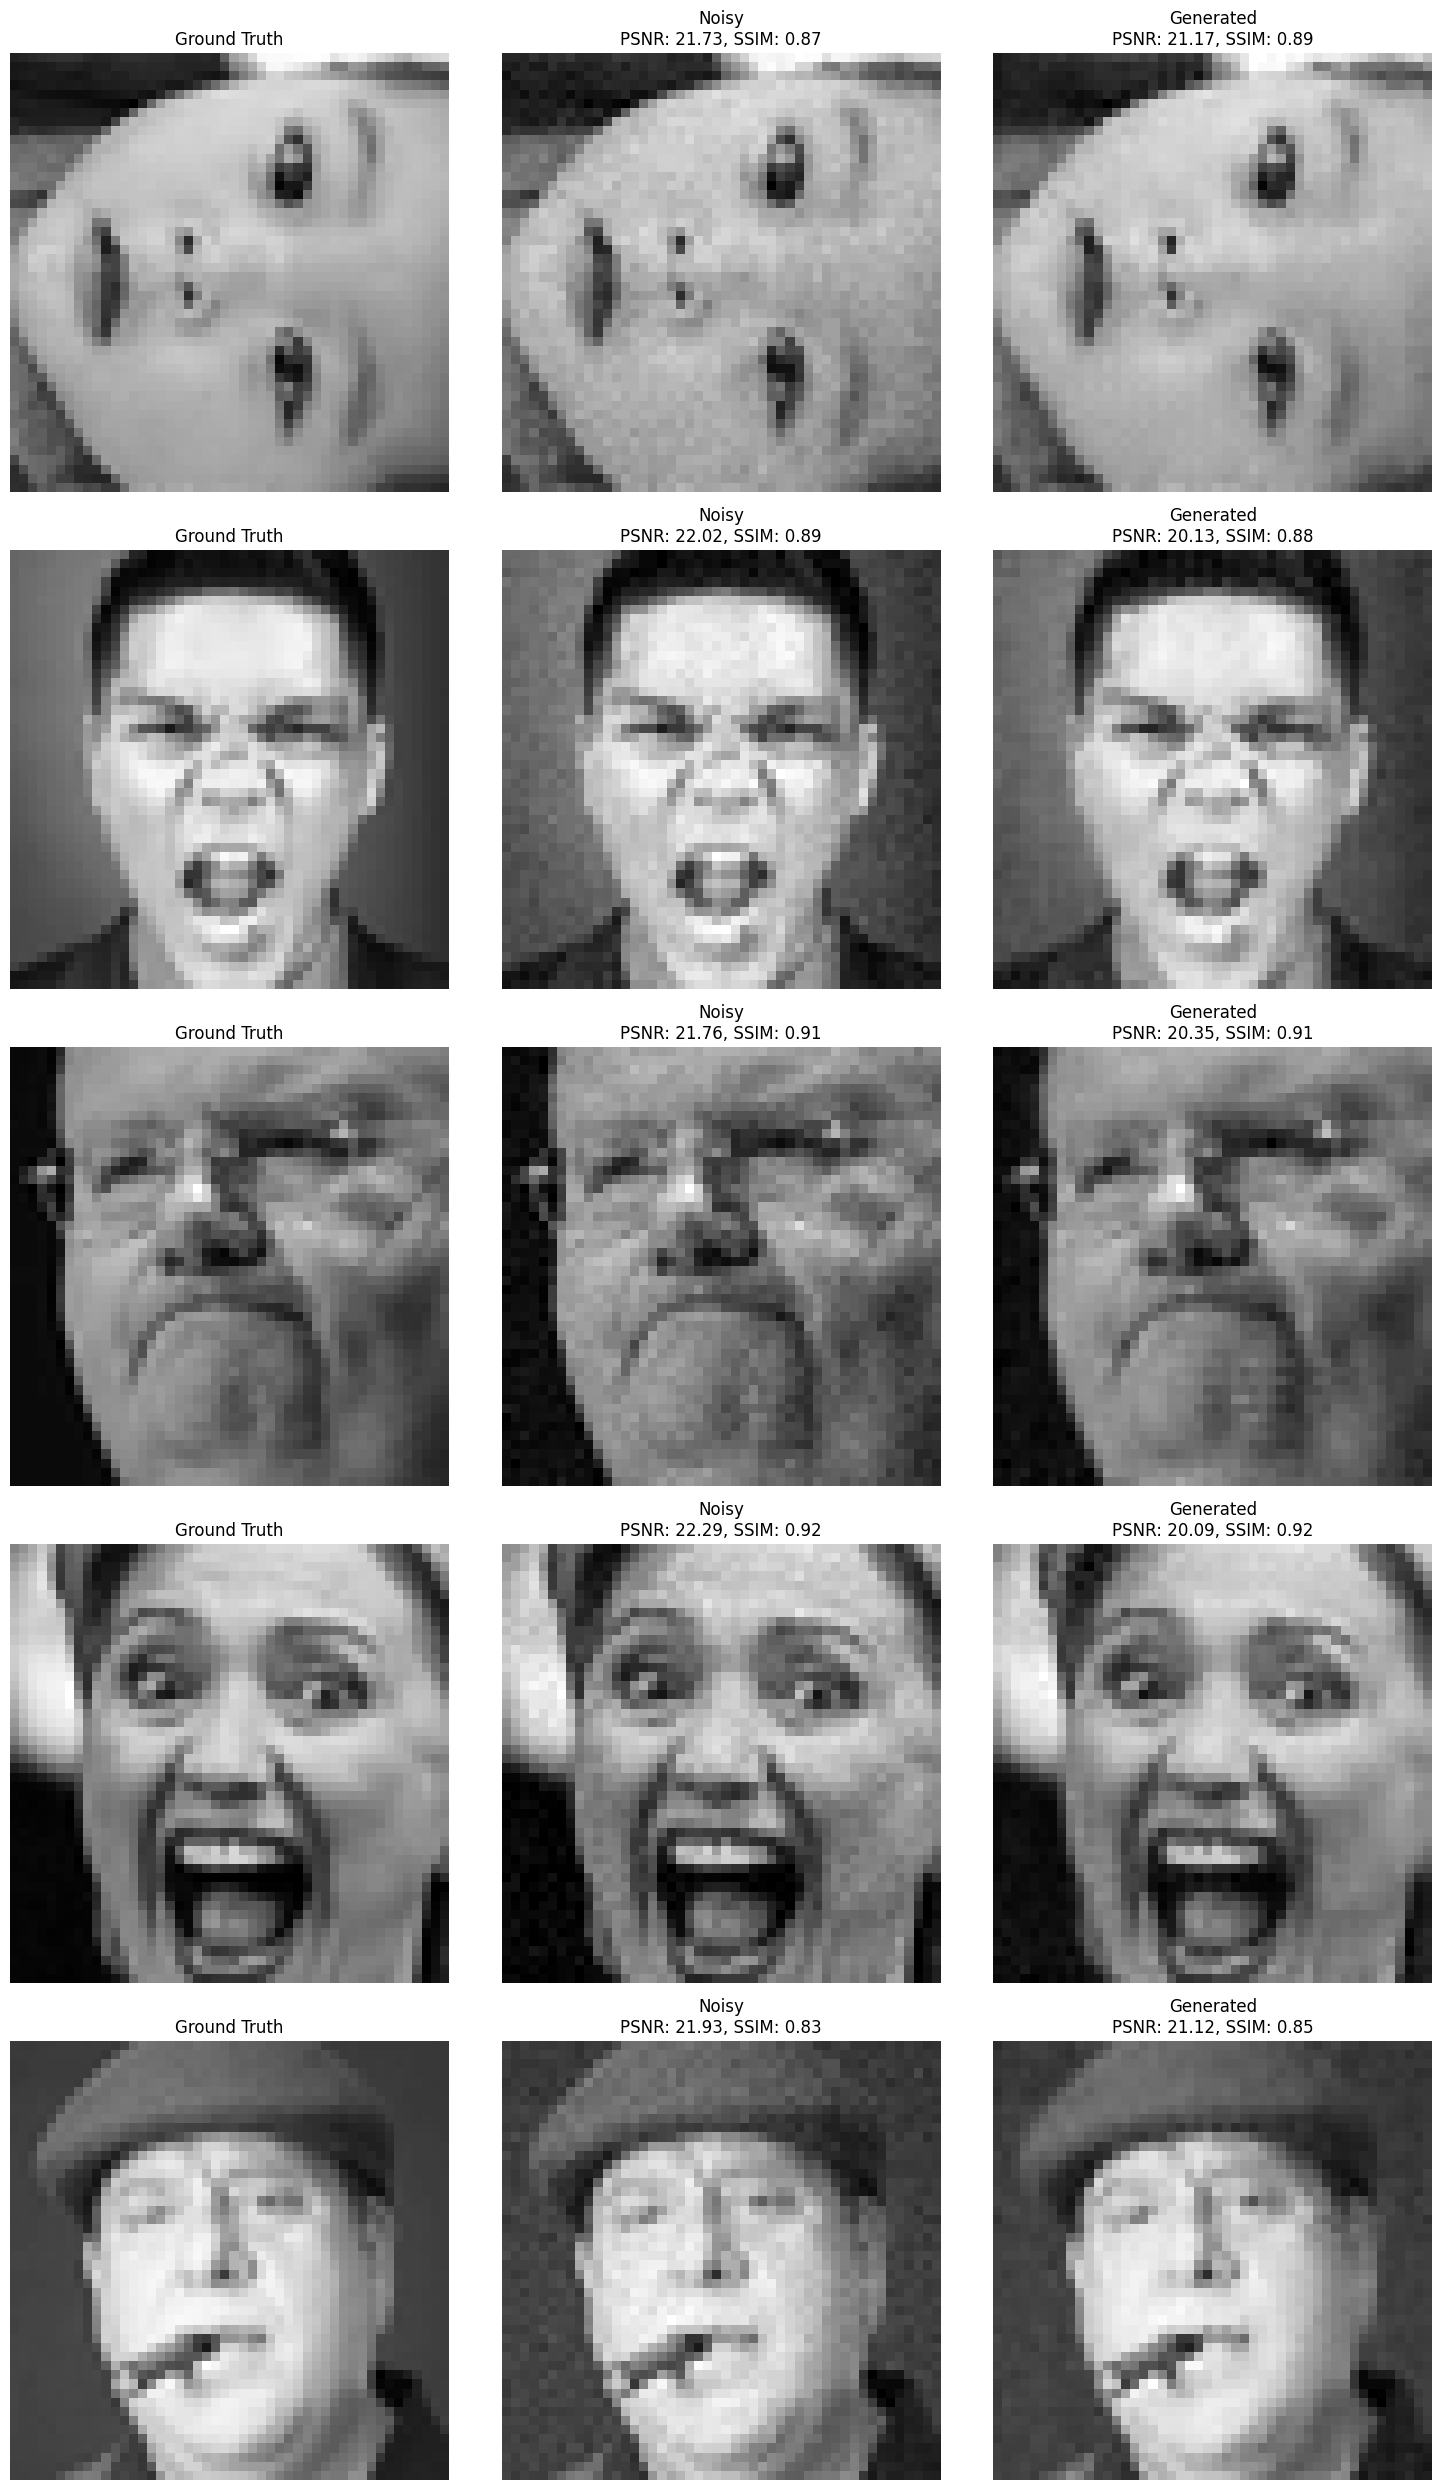

In [ ]:
# Example usage
visualize_gan_predictions(generator, test_loaders['low_gaussian_noise'], device=device, num_samples=5)


##### V2

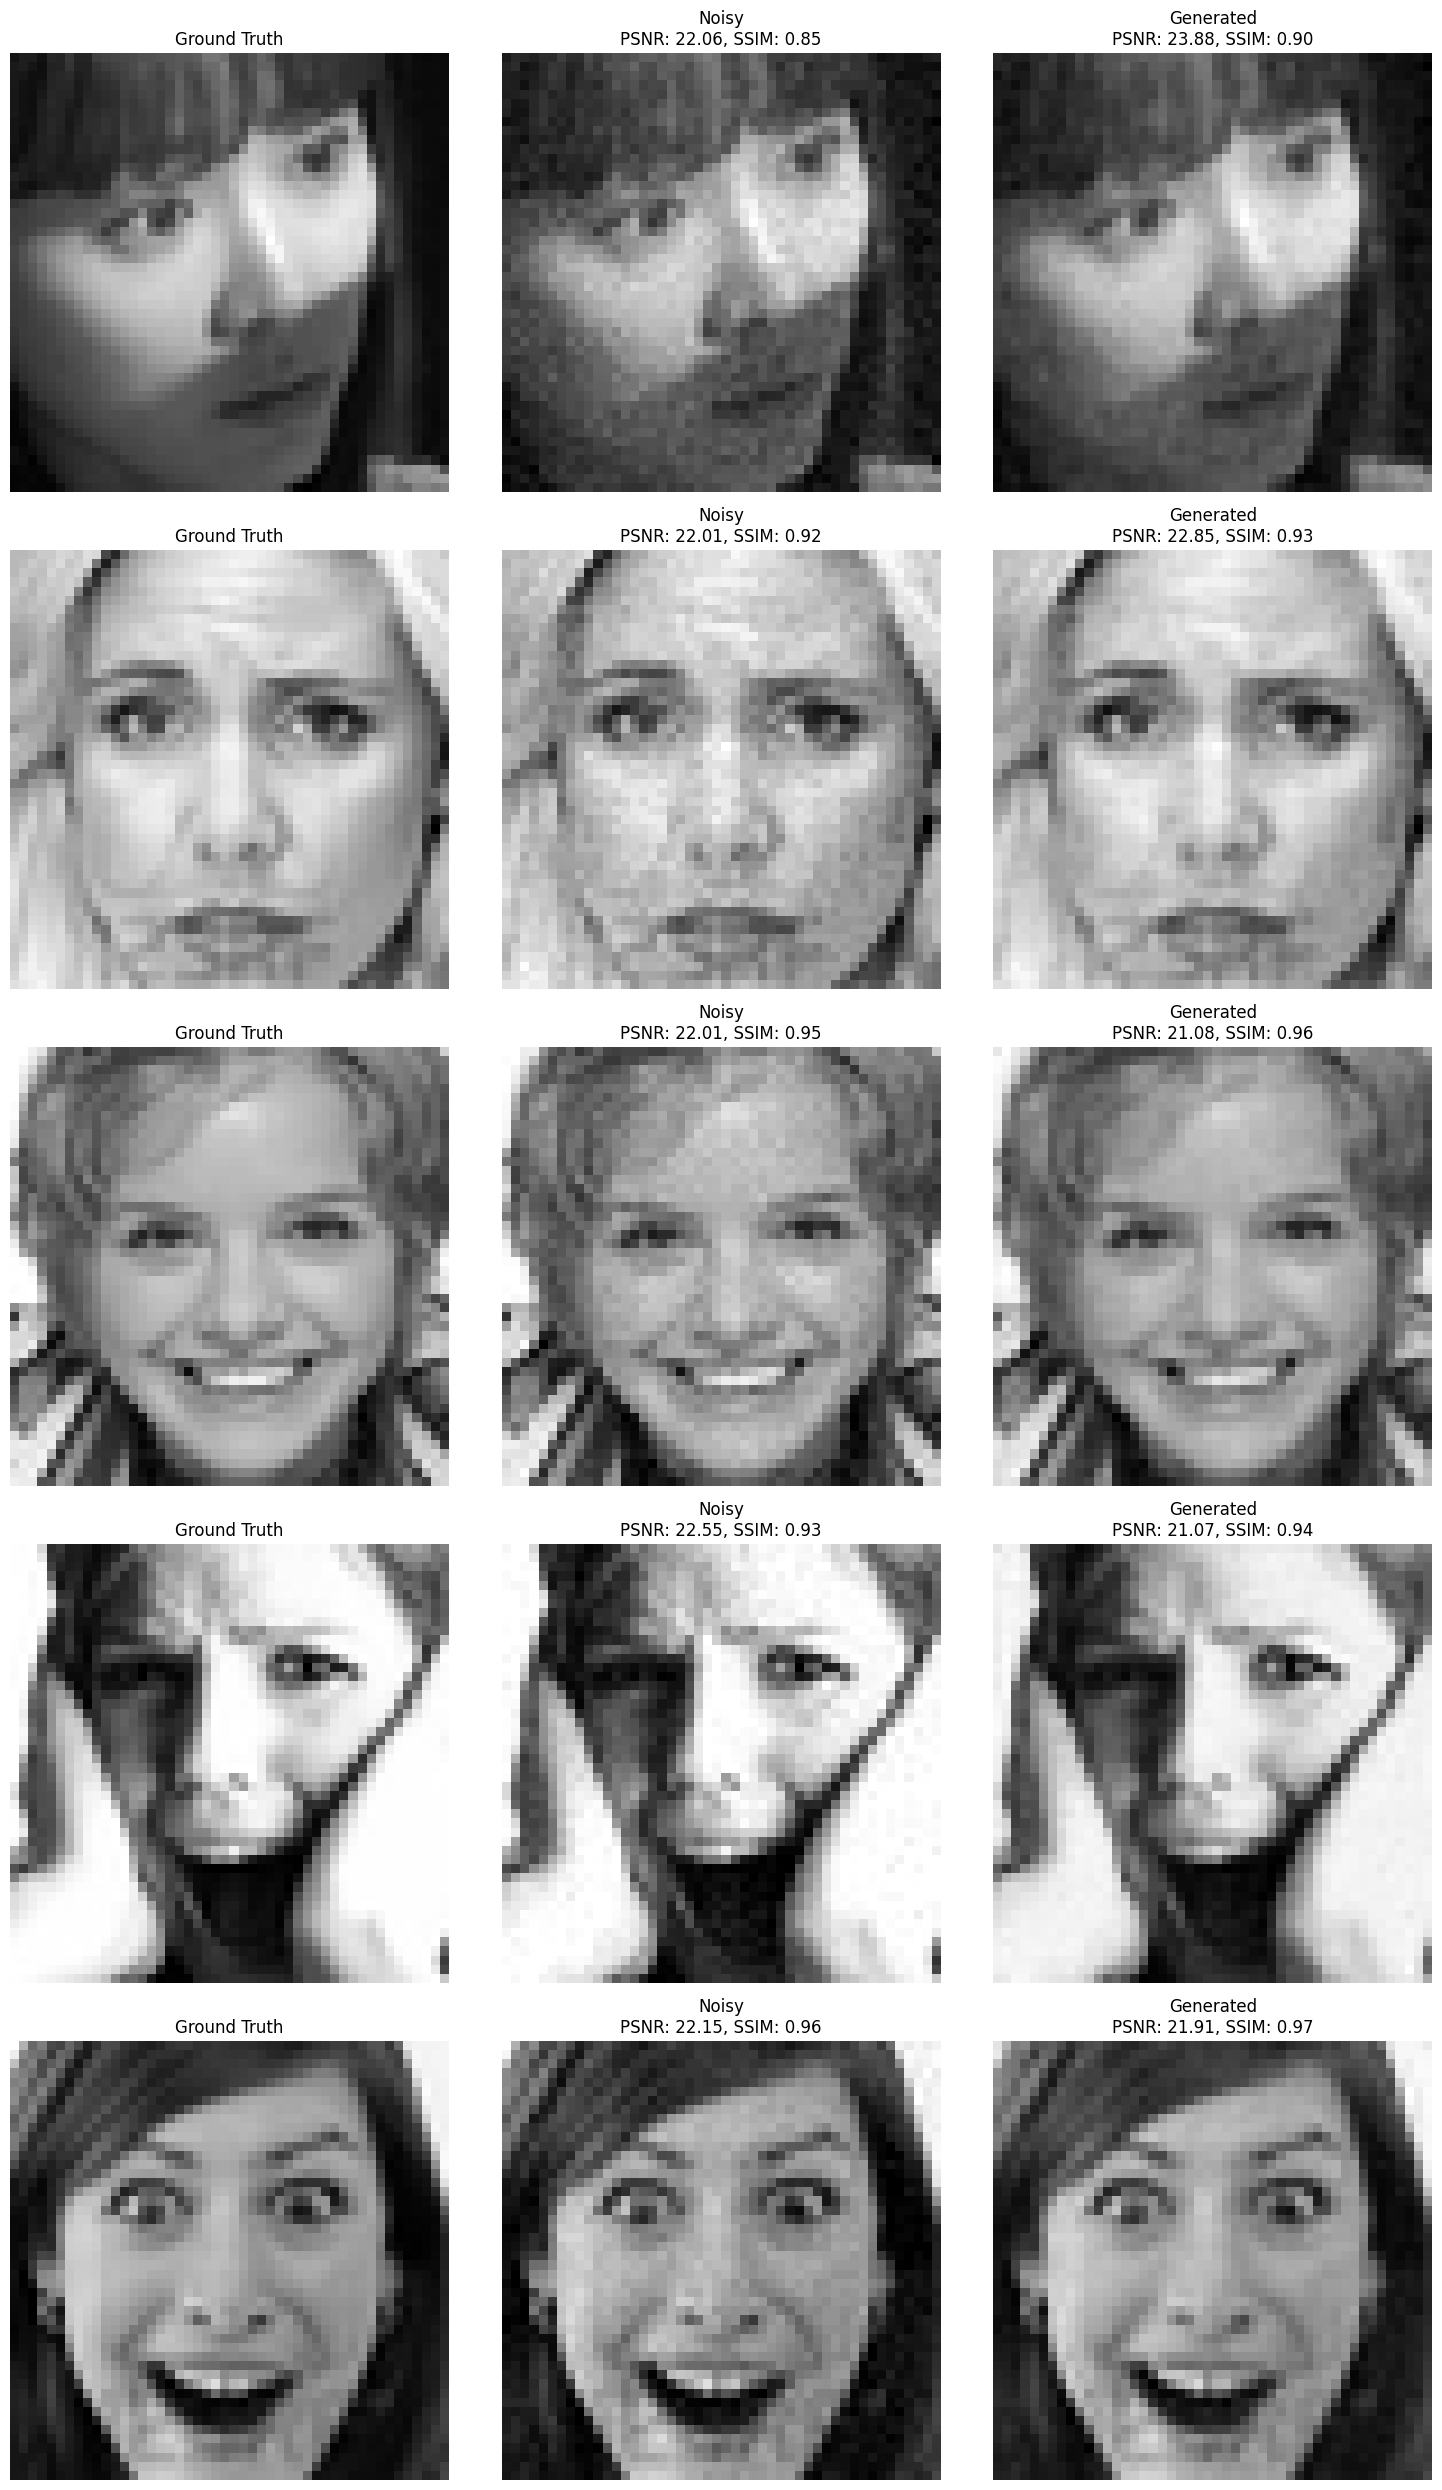

In [ ]:
# Example usage
visualize_gan_predictions(generator, test_loaders['low_gaussian_noise'], device=device, num_samples=5)


## Task 2: Denosing High Gaussian Noise

### AttentionUnet



In [ ]:
# Load Pretrained Model for High Gaussian Noise
model = AttentionUNet(in_channels=1, out_channels=1).to(device)

# Load weights from the previous task
low_noise_model_path = get_model_save_path(dataset_base_path, filename="attention_unet_best_model.pth")
model.load_state_dict(torch.load(low_noise_model_path))
print(f"Loaded pretrained weights from: {low_noise_model_path}")


Loaded pretrained weights from: /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/models/attention_unet_best_model.pth


<ipython-input-63-73e8e3fb0a7d>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(low_noise_model_path))


Visualizing High Gaussian Noise:


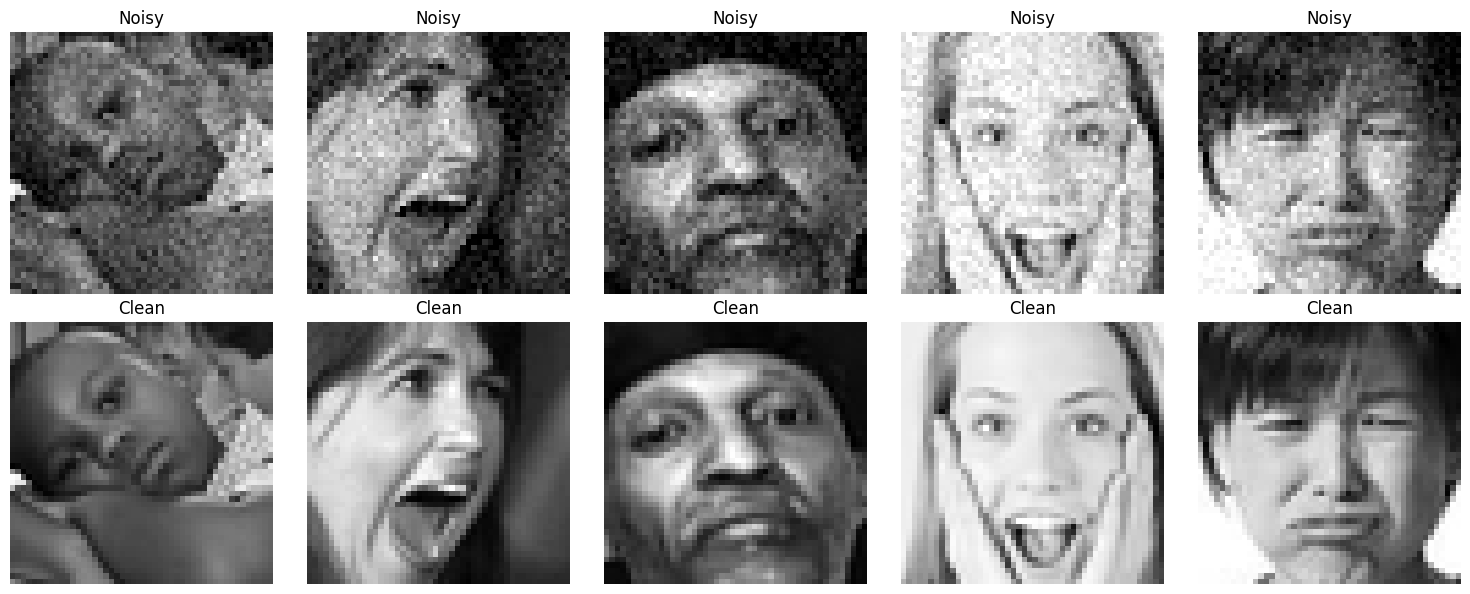

In [ ]:
# Visualize high Gaussian noise dataset
print("Visualizing High Gaussian Noise:")
visualize_noisy_clean(train_loaders['high_gaussian_noise'])


In [ ]:
# Update optimizer and scheduler for high noise training
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Adjust learning rate if needed
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)

# Save path for high noise training
high_noise_model_path = get_model_save_path(dataset_base_path, filename="attention_unet_best_model_high_noise.pth")

# Initialize Trainer for high Gaussian noise
trainer = Trainer(
    model=model,
    train_loader=train_loaders['high_gaussian_noise'],
    val_loader=val_loaders['high_gaussian_noise'],
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    device=device
)

# Train the model on high Gaussian noise
print("\nStarting Training for High Gaussian Noise:")
trainer.fit(num_epochs=20, save_path=high_noise_model_path)

print(f"\nTraining completed for High Gaussian Noise. Model saved at: {high_noise_model_path}")



Starting Training for High Gaussian Noise:

Epoch 1/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.14it/s]


Train Loss: 0.0200, PSNR: 23.0343, SSIM: 0.8362
Val Loss: 0.0187, PSNR: 23.3093, SSIM: 0.8467
Validation loss improved from inf to 0.0187. Saving model...

Epoch 2/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 15.22it/s]


Train Loss: 0.0184, PSNR: 23.3719, SSIM: 0.8498
Val Loss: 0.0181, PSNR: 23.4390, SSIM: 0.8522
Validation loss improved from 0.0187 to 0.0181. Saving model...

Epoch 3/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 14.57it/s]


Train Loss: 0.0180, PSNR: 23.4706, SSIM: 0.8540
Val Loss: 0.0178, PSNR: 23.5209, SSIM: 0.8552
Validation loss improved from 0.0181 to 0.0178. Saving model...

Epoch 4/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 12.94it/s]


Train Loss: 0.0177, PSNR: 23.5469, SSIM: 0.8568
Val Loss: 0.0175, PSNR: 23.5961, SSIM: 0.8583
Validation loss improved from 0.0178 to 0.0175. Saving model...

Epoch 5/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 11.29it/s]


Train Loss: 0.0174, PSNR: 23.6097, SSIM: 0.8592
Val Loss: 0.0173, PSNR: 23.6489, SSIM: 0.8603
Validation loss improved from 0.0175 to 0.0173. Saving model...

Epoch 6/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 11.75it/s]


Train Loss: 0.0172, PSNR: 23.6607, SSIM: 0.8611
Val Loss: 0.0171, PSNR: 23.6962, SSIM: 0.8618
Validation loss improved from 0.0173 to 0.0171. Saving model...

Epoch 7/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 12.83it/s]


Train Loss: 0.0171, PSNR: 23.7034, SSIM: 0.8626
Val Loss: 0.0169, PSNR: 23.7313, SSIM: 0.8635
Validation loss improved from 0.0171 to 0.0169. Saving model...

Epoch 8/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 12.70it/s]


Train Loss: 0.0169, PSNR: 23.7392, SSIM: 0.8641
Val Loss: 0.0168, PSNR: 23.7634, SSIM: 0.8646
Validation loss improved from 0.0169 to 0.0168. Saving model...

Epoch 9/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 12.41it/s]


Train Loss: 0.0168, PSNR: 23.7690, SSIM: 0.8652
Val Loss: 0.0167, PSNR: 23.7973, SSIM: 0.8657
Validation loss improved from 0.0168 to 0.0167. Saving model...

Epoch 10/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.05it/s]


Train Loss: 0.0167, PSNR: 23.7949, SSIM: 0.8660
Val Loss: 0.0166, PSNR: 23.8184, SSIM: 0.8668
Validation loss improved from 0.0167 to 0.0166. Saving model...

Epoch 11/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.30it/s]


Train Loss: 0.0166, PSNR: 23.8171, SSIM: 0.8669
Val Loss: 0.0165, PSNR: 23.8404, SSIM: 0.8675
Validation loss improved from 0.0166 to 0.0165. Saving model...

Epoch 12/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 17.30it/s]


Train Loss: 0.0165, PSNR: 23.8421, SSIM: 0.8678
Val Loss: 0.0164, PSNR: 23.8634, SSIM: 0.8682
Validation loss improved from 0.0165 to 0.0164. Saving model...

Epoch 13/20


Validating: 100%|██████████| 90/90 [00:08<00:00, 11.02it/s]


Train Loss: 0.0165, PSNR: 23.8592, SSIM: 0.8684
Val Loss: 0.0164, PSNR: 23.8843, SSIM: 0.8691
Validation loss improved from 0.0164 to 0.0164. Saving model...

Epoch 14/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 15.87it/s]


Train Loss: 0.0164, PSNR: 23.8773, SSIM: 0.8690
Val Loss: 0.0163, PSNR: 23.8924, SSIM: 0.8688
Validation loss improved from 0.0164 to 0.0163. Saving model...

Epoch 15/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.20it/s]


Train Loss: 0.0163, PSNR: 23.8949, SSIM: 0.8695
Val Loss: 0.0163, PSNR: 23.9104, SSIM: 0.8699
Validation loss improved from 0.0163 to 0.0163. Saving model...

Epoch 16/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 15.36it/s]


Train Loss: 0.0163, PSNR: 23.9093, SSIM: 0.8700
Val Loss: 0.0162, PSNR: 23.9338, SSIM: 0.8704
Validation loss improved from 0.0163 to 0.0162. Saving model...

Epoch 17/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 13.27it/s]


Train Loss: 0.0162, PSNR: 23.9226, SSIM: 0.8705
Val Loss: 0.0162, PSNR: 23.9392, SSIM: 0.8708
Validation loss improved from 0.0162 to 0.0162. Saving model...

Epoch 18/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 11.43it/s]


Train Loss: 0.0162, PSNR: 23.9369, SSIM: 0.8709
Val Loss: 0.0161, PSNR: 23.9559, SSIM: 0.8714
Validation loss improved from 0.0162 to 0.0161. Saving model...

Epoch 19/20


Validating: 100%|██████████| 90/90 [00:08<00:00, 11.21it/s]


Train Loss: 0.0161, PSNR: 23.9483, SSIM: 0.8713
Val Loss: 0.0161, PSNR: 23.9520, SSIM: 0.8719

Epoch 20/20


Validating: 100%|██████████| 90/90 [00:08<00:00, 11.22it/s]


Train Loss: 0.0161, PSNR: 23.9614, SSIM: 0.8717
Val Loss: 0.0160, PSNR: 23.9751, SSIM: 0.8720
Validation loss improved from 0.0161 to 0.0160. Saving model...

Training completed for High Gaussian Noise. Model saved at: /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/models/attention_unet_best_model_high_noise.pth


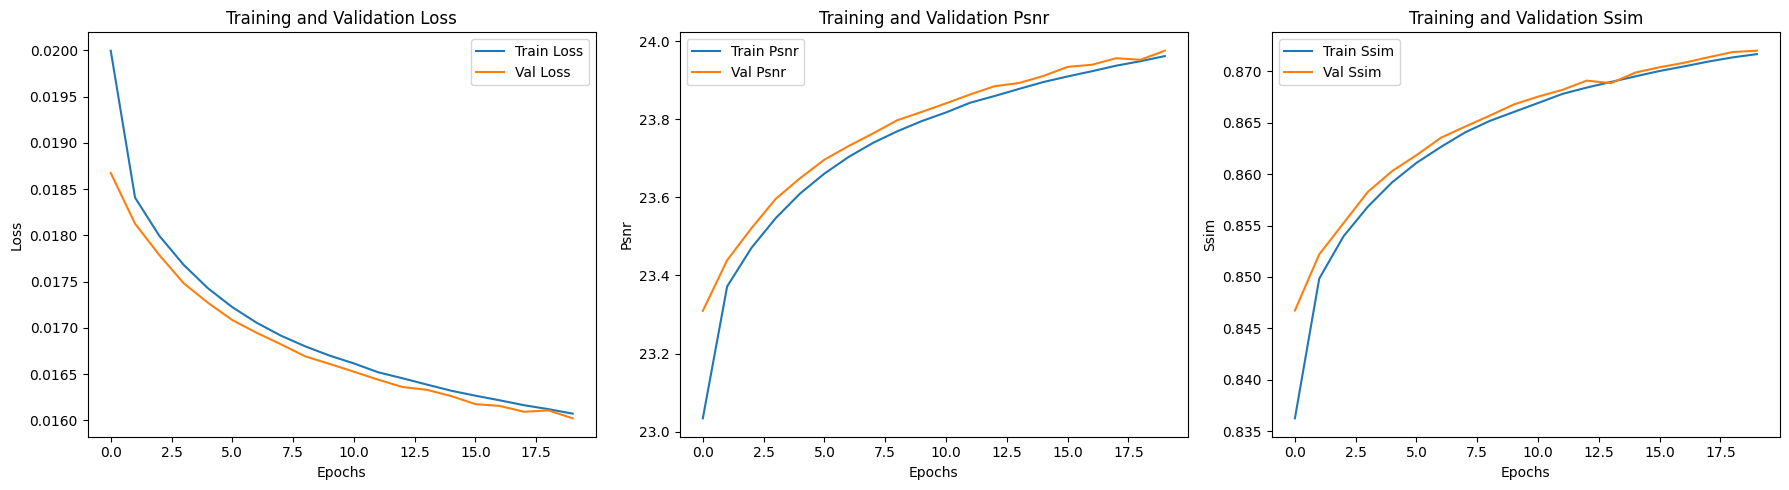

In [ ]:
# Call the function after training
plot_training_history(trainer)

In [ ]:
# Evaluate the model on the high Gaussian noise test set
test_loss, test_psnr, test_ssim = evaluate_on_test_set(
    model,
    test_loaders['high_gaussian_noise'],
    criterion,
    device
)
print(f"\nHigh Gaussian Noise Test Set Metrics:\nLoss: {test_loss:.4f}, PSNR: {test_psnr:.4f}, SSIM: {test_ssim:.4f}")


Testing: 100%|██████████| 113/113 [00:08<00:00, 14.10it/s]


High Gaussian Noise Test Set Metrics:
Loss: 0.0161, PSNR: 23.9465, SSIM: 0.8720


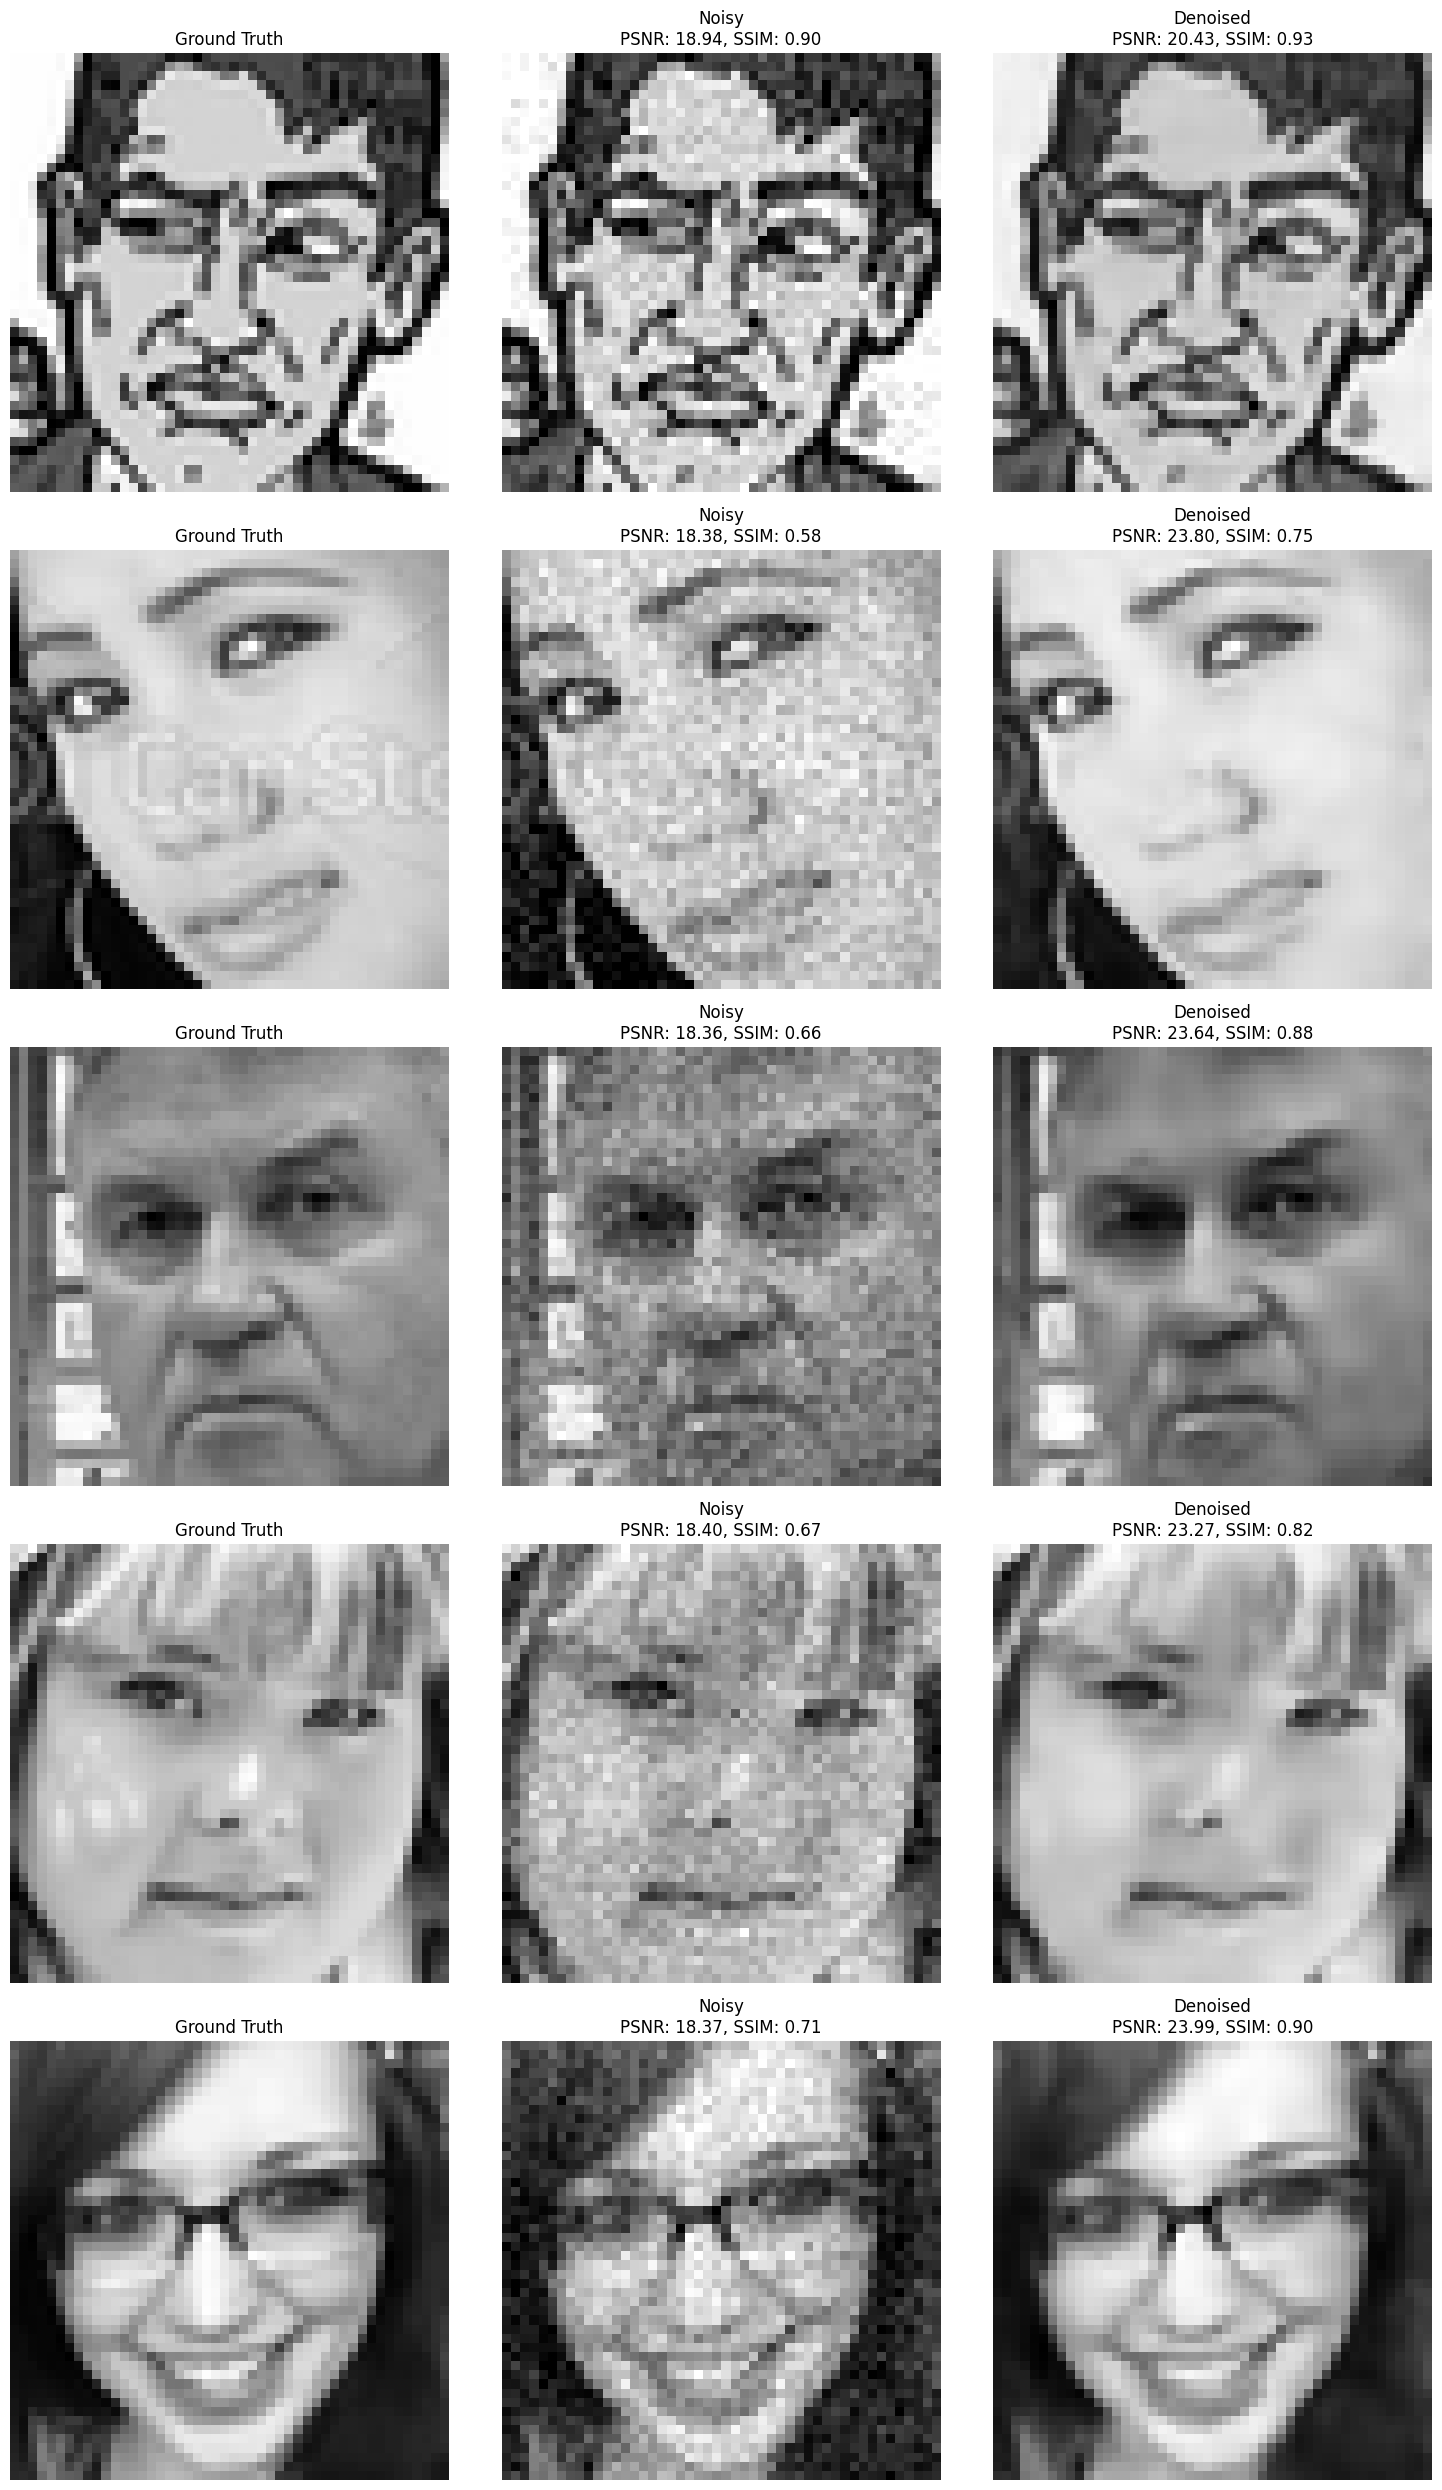

In [ ]:
# Visualize predictions for high Gaussian noise test set
visualize_predictions(model, test_loaders['high_gaussian_noise'], device=device, num_samples=5)


### GAN

In [ ]:
# Load Pretrained Generator for High Gaussian Noise
high_noise_generator = AttentionUNet().to(device)
low_noise_gen_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth"
high_noise_generator.load_state_dict(torch.load(low_noise_gen_path))
print(f"Loaded pretrained generator weights from: {low_noise_gen_path}")

# Load Pretrained Discriminator for High Gaussian Noise
high_noise_discriminator = PatchGANDiscriminator(in_channels=2, base_channels=32, stride=[2, 1, 1, 1, 1, 1], padding=[1, 0, 0, 0, 0, 0]).to(device)
low_noise_disc_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth"
high_noise_discriminator.load_state_dict(torch.load(low_noise_disc_path))
print(f"Loaded pretrained discriminator weights from: {low_noise_disc_path}")


<ipython-input-28-cb476ed73ba0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  high_noise_generator.load_state_dict(torch.load(low_noise_gen_path))


Loaded pretrained generator weights from: /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_generator_v2.pth


<ipython-input-28-cb476ed73ba0>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  high_noise_discriminator.load_state_dict(torch.load(low_noise_disc_path))


Loaded pretrained discriminator weights from: /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/patch_gan_discriminator_v2.pth


Visualizing High Gaussian Noise:


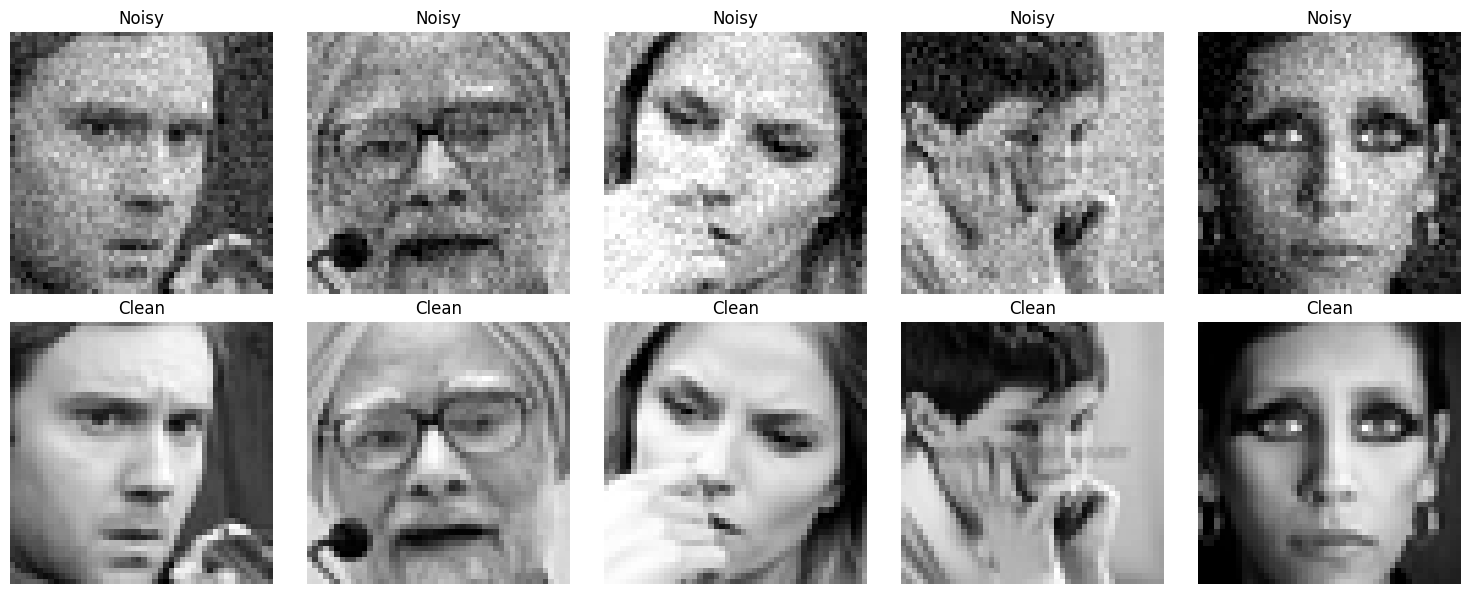

In [ ]:
# Visualize high Gaussian noise dataset
print("Visualizing High Gaussian Noise:")
visualize_noisy_clean(train_loaders['high_gaussian_noise'])


##### V1

In [ ]:
# Define optimizer and loss function for the new task
gen_optimizer = torch.optim.Adam(high_noise_generator.parameters(), lr=1e-4)
disc_optimizer = torch.optim.Adam(high_noise_discriminator.parameters(), lr=1e-4)
gen_criterion = torch.nn.MSELoss()  # Adjust loss function if needed

# Define save paths for the new task
high_noise_gen_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator.pth"
high_noise_disc_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator.pth"
high_noise_history_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_training_history.json"

# Initialize GAN Trainer for High Gaussian Noise
high_noise_gan_trainer = GANTrainer(
    generator=high_noise_generator,
    discriminator=high_noise_discriminator,
    train_loader=train_loaders['high_gaussian_noise'],
    val_loader=val_loaders['high_gaussian_noise'],
    gen_optimizer=gen_optimizer,
    disc_optimizer=disc_optimizer,
    gen_criterion=gen_criterion,
    device=device
)


In [ ]:
print("\nStarting Training for High Gaussian Noise:")
high_noise_gan_trainer.fit(
    num_epochs=20,
    gen_save_path=high_noise_gen_path,
    disc_save_path=high_noise_disc_path,
    history_path=high_noise_history_path
)



Starting Training for High Gaussian Noise:

Epoch 1/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.80it/s]


Train Gen Loss: 0.0517, Train Disc Loss: 0.5215, PSNR: 14.9669, SSIM: 0.7640
Val Gen Loss: 0.0288, Val Disc Loss: 1.1110, PSNR: 15.7077, SSIM: 0.7805
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator.pth...

Epoch 2/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.77it/s]


Train Gen Loss: 0.0613, Train Disc Loss: 0.3754, PSNR: 14.6978, SSIM: 0.7567
Val Gen Loss: 0.0312, Val Disc Loss: 0.9572, PSNR: 15.3076, SSIM: 0.7798

Epoch 3/20


Validating: 100%|██████████| 57/57 [00:05<00:00, 11.18it/s]


Train Gen Loss: 0.0632, Train Disc Loss: 0.3677, PSNR: 14.7105, SSIM: 0.7601
Val Gen Loss: 0.0307, Val Disc Loss: 0.8106, PSNR: 15.3119, SSIM: 0.7721

Epoch 4/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.96it/s]


Train Gen Loss: 0.0636, Train Disc Loss: 0.3771, PSNR: 14.6854, SSIM: 0.7558
Val Gen Loss: 0.0318, Val Disc Loss: 1.1127, PSNR: 15.2242, SSIM: 0.7654

Epoch 5/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 12.10it/s]


Train Gen Loss: 0.0597, Train Disc Loss: 0.3987, PSNR: 14.7438, SSIM: 0.7577
Val Gen Loss: 0.0356, Val Disc Loss: 1.1414, PSNR: 14.7565, SSIM: 0.7531

Epoch 6/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.52it/s]


Train Gen Loss: 0.0622, Train Disc Loss: 0.3929, PSNR: 14.7686, SSIM: 0.7596
Val Gen Loss: 0.0318, Val Disc Loss: 0.9663, PSNR: 15.2155, SSIM: 0.7700

Epoch 7/20


Validating: 100%|██████████| 57/57 [00:05<00:00, 11.23it/s]


Train Gen Loss: 0.0599, Train Disc Loss: 0.4174, PSNR: 14.8071, SSIM: 0.7592
Val Gen Loss: 0.0312, Val Disc Loss: 0.8707, PSNR: 15.2920, SSIM: 0.7695

Epoch 8/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.16it/s]


Train Gen Loss: 0.0673, Train Disc Loss: 0.3621, PSNR: 14.7599, SSIM: 0.7563
Val Gen Loss: 0.0329, Val Disc Loss: 1.1548, PSNR: 15.1088, SSIM: 0.7644

Epoch 9/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 11.74it/s]


Train Gen Loss: 0.0612, Train Disc Loss: 0.4015, PSNR: 14.8583, SSIM: 0.7610
Val Gen Loss: 0.0328, Val Disc Loss: 1.1733, PSNR: 15.1739, SSIM: 0.7690

Epoch 10/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.40it/s]


Train Gen Loss: 0.0629, Train Disc Loss: 0.3854, PSNR: 14.7431, SSIM: 0.7559
Val Gen Loss: 0.0348, Val Disc Loss: 0.8734, PSNR: 14.8033, SSIM: 0.7602

Epoch 11/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.89it/s]


Train Gen Loss: 0.0660, Train Disc Loss: 0.3776, PSNR: 14.7707, SSIM: 0.7552
Val Gen Loss: 0.0330, Val Disc Loss: 1.3065, PSNR: 15.1643, SSIM: 0.7636

Epoch 12/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.80it/s]


Train Gen Loss: 0.0668, Train Disc Loss: 0.3728, PSNR: 14.6048, SSIM: 0.7515
Val Gen Loss: 0.0341, Val Disc Loss: 1.4241, PSNR: 15.0137, SSIM: 0.7566

Epoch 13/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.79it/s]


Train Gen Loss: 0.0661, Train Disc Loss: 0.3746, PSNR: 14.6502, SSIM: 0.7540
Val Gen Loss: 0.0355, Val Disc Loss: 1.0045, PSNR: 14.7303, SSIM: 0.7528

Epoch 14/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.92it/s]


Train Gen Loss: 0.0763, Train Disc Loss: 0.3048, PSNR: 14.5363, SSIM: 0.7483
Val Gen Loss: 0.0368, Val Disc Loss: 1.3109, PSNR: 14.6443, SSIM: 0.7465

Epoch 15/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.06it/s]


Train Gen Loss: 0.0776, Train Disc Loss: 0.2844, PSNR: 14.5405, SSIM: 0.7507
Val Gen Loss: 0.0341, Val Disc Loss: 1.1569, PSNR: 14.9603, SSIM: 0.7625

Epoch 16/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 13.21it/s]


Train Gen Loss: 0.0749, Train Disc Loss: 0.2787, PSNR: 14.5892, SSIM: 0.7516
Val Gen Loss: 0.0354, Val Disc Loss: 1.5794, PSNR: 14.9036, SSIM: 0.7545

Epoch 17/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.04it/s]


Train Gen Loss: 0.0751, Train Disc Loss: 0.3002, PSNR: 14.5026, SSIM: 0.7481
Val Gen Loss: 0.0372, Val Disc Loss: 1.4202, PSNR: 14.6016, SSIM: 0.7437

Epoch 18/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 13.00it/s]


Train Gen Loss: 0.0759, Train Disc Loss: 0.3092, PSNR: 14.4500, SSIM: 0.7473
Val Gen Loss: 0.0331, Val Disc Loss: 0.9175, PSNR: 15.0251, SSIM: 0.7615

Epoch 19/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.26it/s]


Train Gen Loss: 0.0789, Train Disc Loss: 0.2788, PSNR: 14.5833, SSIM: 0.7542
Val Gen Loss: 0.0341, Val Disc Loss: 1.3337, PSNR: 15.0215, SSIM: 0.7655

Epoch 20/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 11.47it/s]

Train Gen Loss: 0.0774, Train Disc Loss: 0.2846, PSNR: 14.6229, SSIM: 0.7539
Val Gen Loss: 0.0344, Val Disc Loss: 1.7304, PSNR: 15.0796, SSIM: 0.7649
Final training and validation history saved to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_training_history.json


##### V2

In [ ]:
# Define optimizer and loss function for the new task
gen_optimizer = torch.optim.Adam(high_noise_generator.parameters(), lr=1e-4)
disc_optimizer = torch.optim.Adam(high_noise_discriminator.parameters(), lr=1e-4)
gen_criterion = torch.nn.MSELoss()  # Adjust loss function if needed

# Define save paths for the new task
high_noise_gen_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator_v2.pth"
high_noise_disc_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator_v2.pth"
high_noise_history_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_training_history_v2.json"

# Initialize GAN Trainer for High Gaussian Noise
high_noise_gan_trainer = GANTrainer(
    generator=high_noise_generator,
    discriminator=high_noise_discriminator,
    train_loader=train_loaders['high_gaussian_noise'],
    val_loader=val_loaders['high_gaussian_noise'],
    gen_optimizer=gen_optimizer,
    disc_optimizer=disc_optimizer,
    gen_criterion=gen_criterion,
    device=device
)


In [ ]:
print("\nStarting Training for High Gaussian Noise:")
high_noise_gan_trainer.fit(
    num_epochs=20,
    gen_save_path=high_noise_gen_path,
    disc_save_path=high_noise_disc_path,
    history_path=high_noise_history_path
)



Starting Training for High Gaussian Noise:

Epoch 1/20


Training:   0%|          | 0/449 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `peak_signal_noise_ratio` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `peak_signal_noise_ratio` from `torchmetrics.image` instead.
  _future_warning(
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(
Validating: 100%|██████████| 57/57 [00:03<00:00, 15.31it/s]


Train Gen Loss: 0.0284, Train Disc Loss: 0.2760, PSNR: 15.8165, SSIM: 0.7877
Val Gen Loss: 0.0246, Val Disc Loss: 0.7376, PSNR: 16.2548, SSIM: 0.7991
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator_v2.pth...

Epoch 2/20


Validating: 100%|██████████| 57/57 [00:05<00:00, 10.46it/s]


Train Gen Loss: 0.0286, Train Disc Loss: 0.3337, PSNR: 15.8161, SSIM: 0.7881
Val Gen Loss: 0.0244, Val Disc Loss: 0.7147, PSNR: 16.2844, SSIM: 0.7993
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator_v2.pth...

Epoch 3/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.36it/s]


Train Gen Loss: 0.0308, Train Disc Loss: 0.1664, PSNR: 15.6830, SSIM: 0.7800
Val Gen Loss: 0.0263, Val Disc Loss: 0.9970, PSNR: 16.0784, SSIM: 0.7897

Epoch 4/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.24it/s]


Train Gen Loss: 0.0302, Train Disc Loss: 0.1172, PSNR: 15.8924, SSIM: 0.7905
Val Gen Loss: 0.0238, Val Disc Loss: 0.7349, PSNR: 16.4036, SSIM: 0.8044
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator_v2.pth...

Epoch 5/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 13.93it/s]


Train Gen Loss: 0.0304, Train Disc Loss: 0.1093, PSNR: 15.9292, SSIM: 0.7924
Val Gen Loss: 0.0249, Val Disc Loss: 0.8363, PSNR: 16.2665, SSIM: 0.7991

Epoch 6/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.54it/s]


Train Gen Loss: 0.0299, Train Disc Loss: 0.0153, PSNR: 16.1477, SSIM: 0.7990
Val Gen Loss: 0.0222, Val Disc Loss: 0.7086, PSNR: 16.7008, SSIM: 0.8152
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator_v2.pth...

Epoch 7/20


Validating: 100%|██████████| 57/57 [00:05<00:00, 10.77it/s]


Train Gen Loss: 0.0291, Train Disc Loss: 0.0015, PSNR: 16.4423, SSIM: 0.8115
Val Gen Loss: 0.0217, Val Disc Loss: 0.7207, PSNR: 16.7527, SSIM: 0.8173
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator_v2.pth...

Epoch 8/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.74it/s]


Train Gen Loss: 0.0291, Train Disc Loss: 0.0015, PSNR: 16.4448, SSIM: 0.8128
Val Gen Loss: 0.0219, Val Disc Loss: 0.7381, PSNR: 16.7070, SSIM: 0.8176

Epoch 9/20


Validating: 100%|██████████| 57/57 [00:05<00:00, 11.08it/s]


Train Gen Loss: 0.0299, Train Disc Loss: 0.0009, PSNR: 16.4238, SSIM: 0.8125
Val Gen Loss: 0.0219, Val Disc Loss: 0.8020, PSNR: 16.6884, SSIM: 0.8172

Epoch 10/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.80it/s]


Train Gen Loss: 0.0304, Train Disc Loss: 0.0006, PSNR: 16.3961, SSIM: 0.8120
Val Gen Loss: 0.0219, Val Disc Loss: 0.9111, PSNR: 16.6724, SSIM: 0.8161

Epoch 11/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.63it/s]


Train Gen Loss: 0.0310, Train Disc Loss: 0.0005, PSNR: 16.3451, SSIM: 0.8102
Val Gen Loss: 0.0220, Val Disc Loss: 1.0410, PSNR: 16.6512, SSIM: 0.8163

Epoch 12/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.29it/s]


Train Gen Loss: 0.0314, Train Disc Loss: 0.0003, PSNR: 16.3283, SSIM: 0.8108
Val Gen Loss: 0.0220, Val Disc Loss: 0.9081, PSNR: 16.6522, SSIM: 0.8177

Epoch 13/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.26it/s]


Train Gen Loss: 0.0316, Train Disc Loss: 0.0003, PSNR: 16.3374, SSIM: 0.8113
Val Gen Loss: 0.0228, Val Disc Loss: 1.0722, PSNR: 16.4981, SSIM: 0.8161

Epoch 14/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 13.11it/s]


Train Gen Loss: 0.0321, Train Disc Loss: 0.0002, PSNR: 16.3195, SSIM: 0.8111
Val Gen Loss: 0.0226, Val Disc Loss: 1.3036, PSNR: 16.5276, SSIM: 0.8137

Epoch 15/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.51it/s]


Train Gen Loss: 0.0321, Train Disc Loss: 0.0002, PSNR: 16.3296, SSIM: 0.8116
Val Gen Loss: 0.0230, Val Disc Loss: 1.3422, PSNR: 16.4611, SSIM: 0.8176

Epoch 16/20


Validating: 100%|██████████| 57/57 [00:05<00:00, 10.38it/s]


Train Gen Loss: 0.0327, Train Disc Loss: 0.0001, PSNR: 16.3396, SSIM: 0.8121
Val Gen Loss: 0.0237, Val Disc Loss: 0.8487, PSNR: 16.3858, SSIM: 0.8170

Epoch 17/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.55it/s]


Train Gen Loss: 0.0319, Train Disc Loss: 0.1520, PSNR: 16.0604, SSIM: 0.7992
Val Gen Loss: 0.0244, Val Disc Loss: 0.8074, PSNR: 16.3357, SSIM: 0.7991

Epoch 18/20


Validating: 100%|██████████| 57/57 [00:04<00:00, 11.78it/s]


Train Gen Loss: 0.0305, Train Disc Loss: 0.2366, PSNR: 15.7025, SSIM: 0.7797
Val Gen Loss: 0.0265, Val Disc Loss: 0.8070, PSNR: 15.9681, SSIM: 0.7880

Epoch 19/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.22it/s]


Train Gen Loss: 0.0316, Train Disc Loss: 0.2973, PSNR: 15.5594, SSIM: 0.7761
Val Gen Loss: 0.0290, Val Disc Loss: 0.7396, PSNR: 15.5282, SSIM: 0.7692

Epoch 20/20


Validating: 100%|██████████| 57/57 [00:03<00:00, 14.98it/s]

Train Gen Loss: 0.0316, Train Disc Loss: 0.3027, PSNR: 15.5056, SSIM: 0.7726
Val Gen Loss: 0.0278, Val Disc Loss: 0.7122, PSNR: 15.6853, SSIM: 0.7761
Final training and validation history saved to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_training_history_v2.json


##### V1

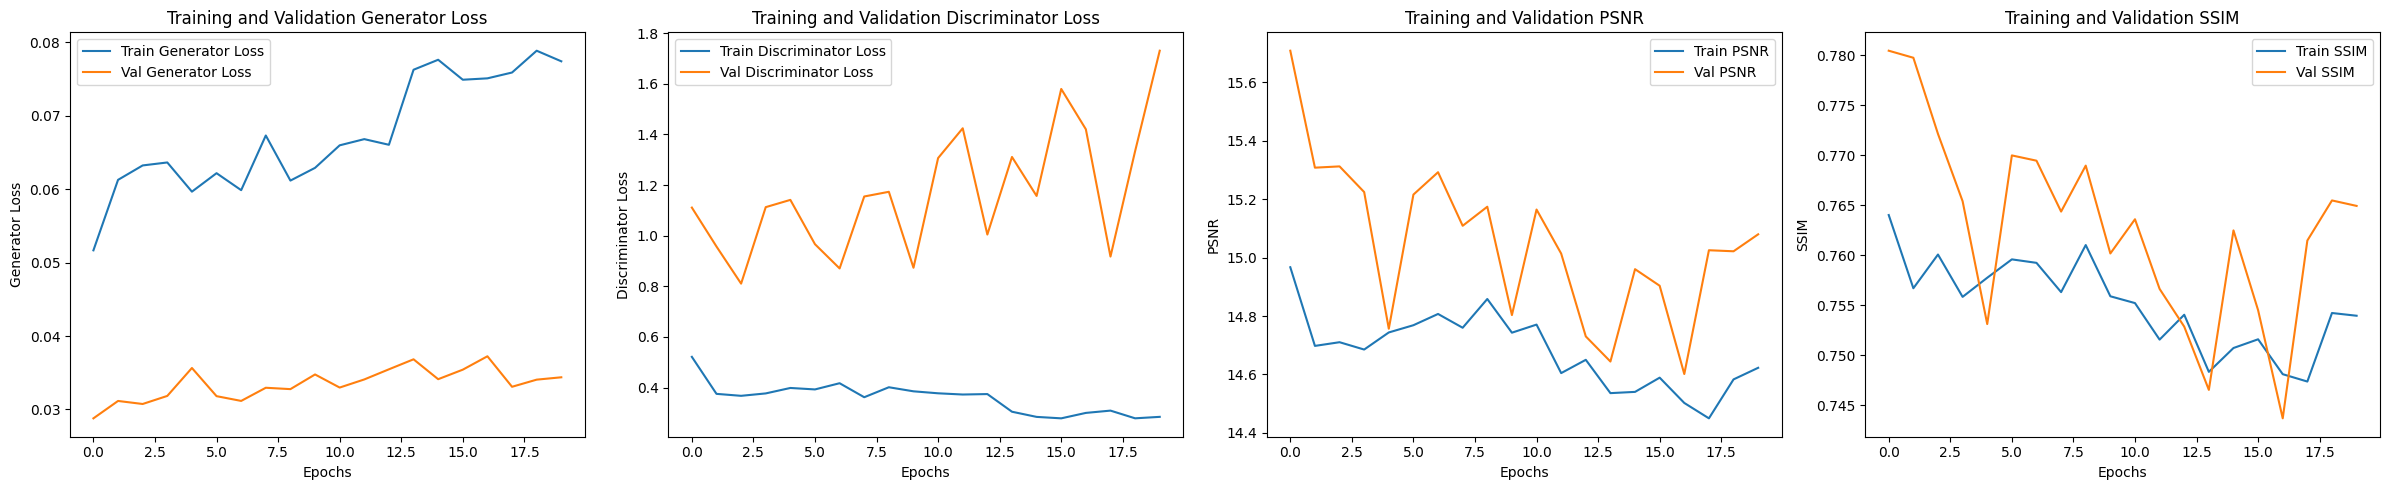

In [ ]:
# Plot training history
plot_gan_training_history(high_noise_gan_trainer)


##### V2

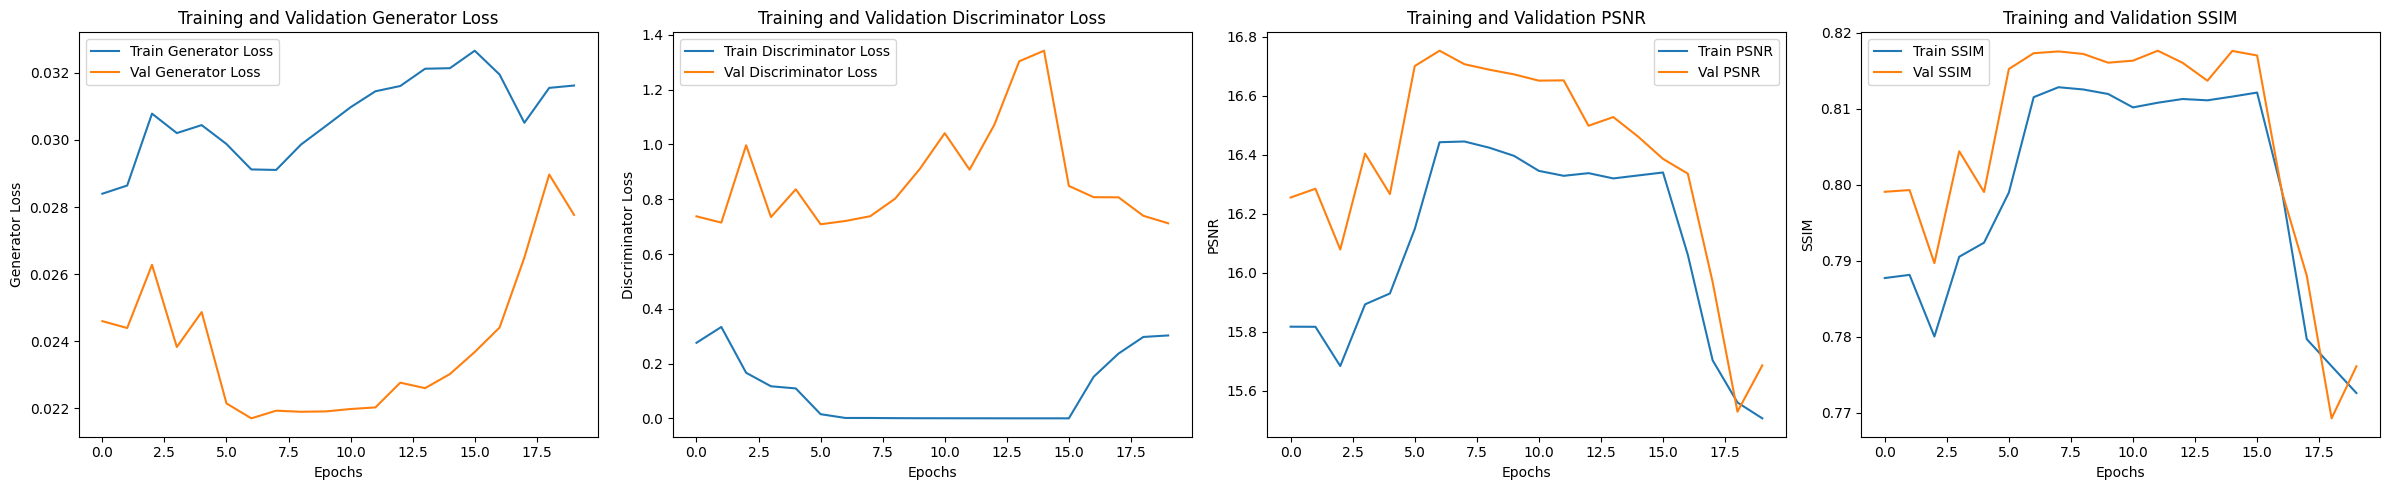

In [ ]:
# Plot training history
plot_gan_training_history(high_noise_gan_trainer)


In [ ]:
# Evaluate the GAN on the high Gaussian noise test set
test_loss, test_psnr, test_ssim = evaluate_gan_on_test_set(
    high_noise_generator,
    test_loaders['high_gaussian_noise'],
    gen_criterion,
    device
)


Testing: 100%|██████████| 57/57 [00:03<00:00, 18.61it/s]


##### V1

Testing: 100%|██████████| 57/57 [00:03<00:00, 18.05it/s]


High Gaussian Noise Test Set Metrics:
Loss: 0.0310, PSNR: 15.0893, SSIM: 0.7640


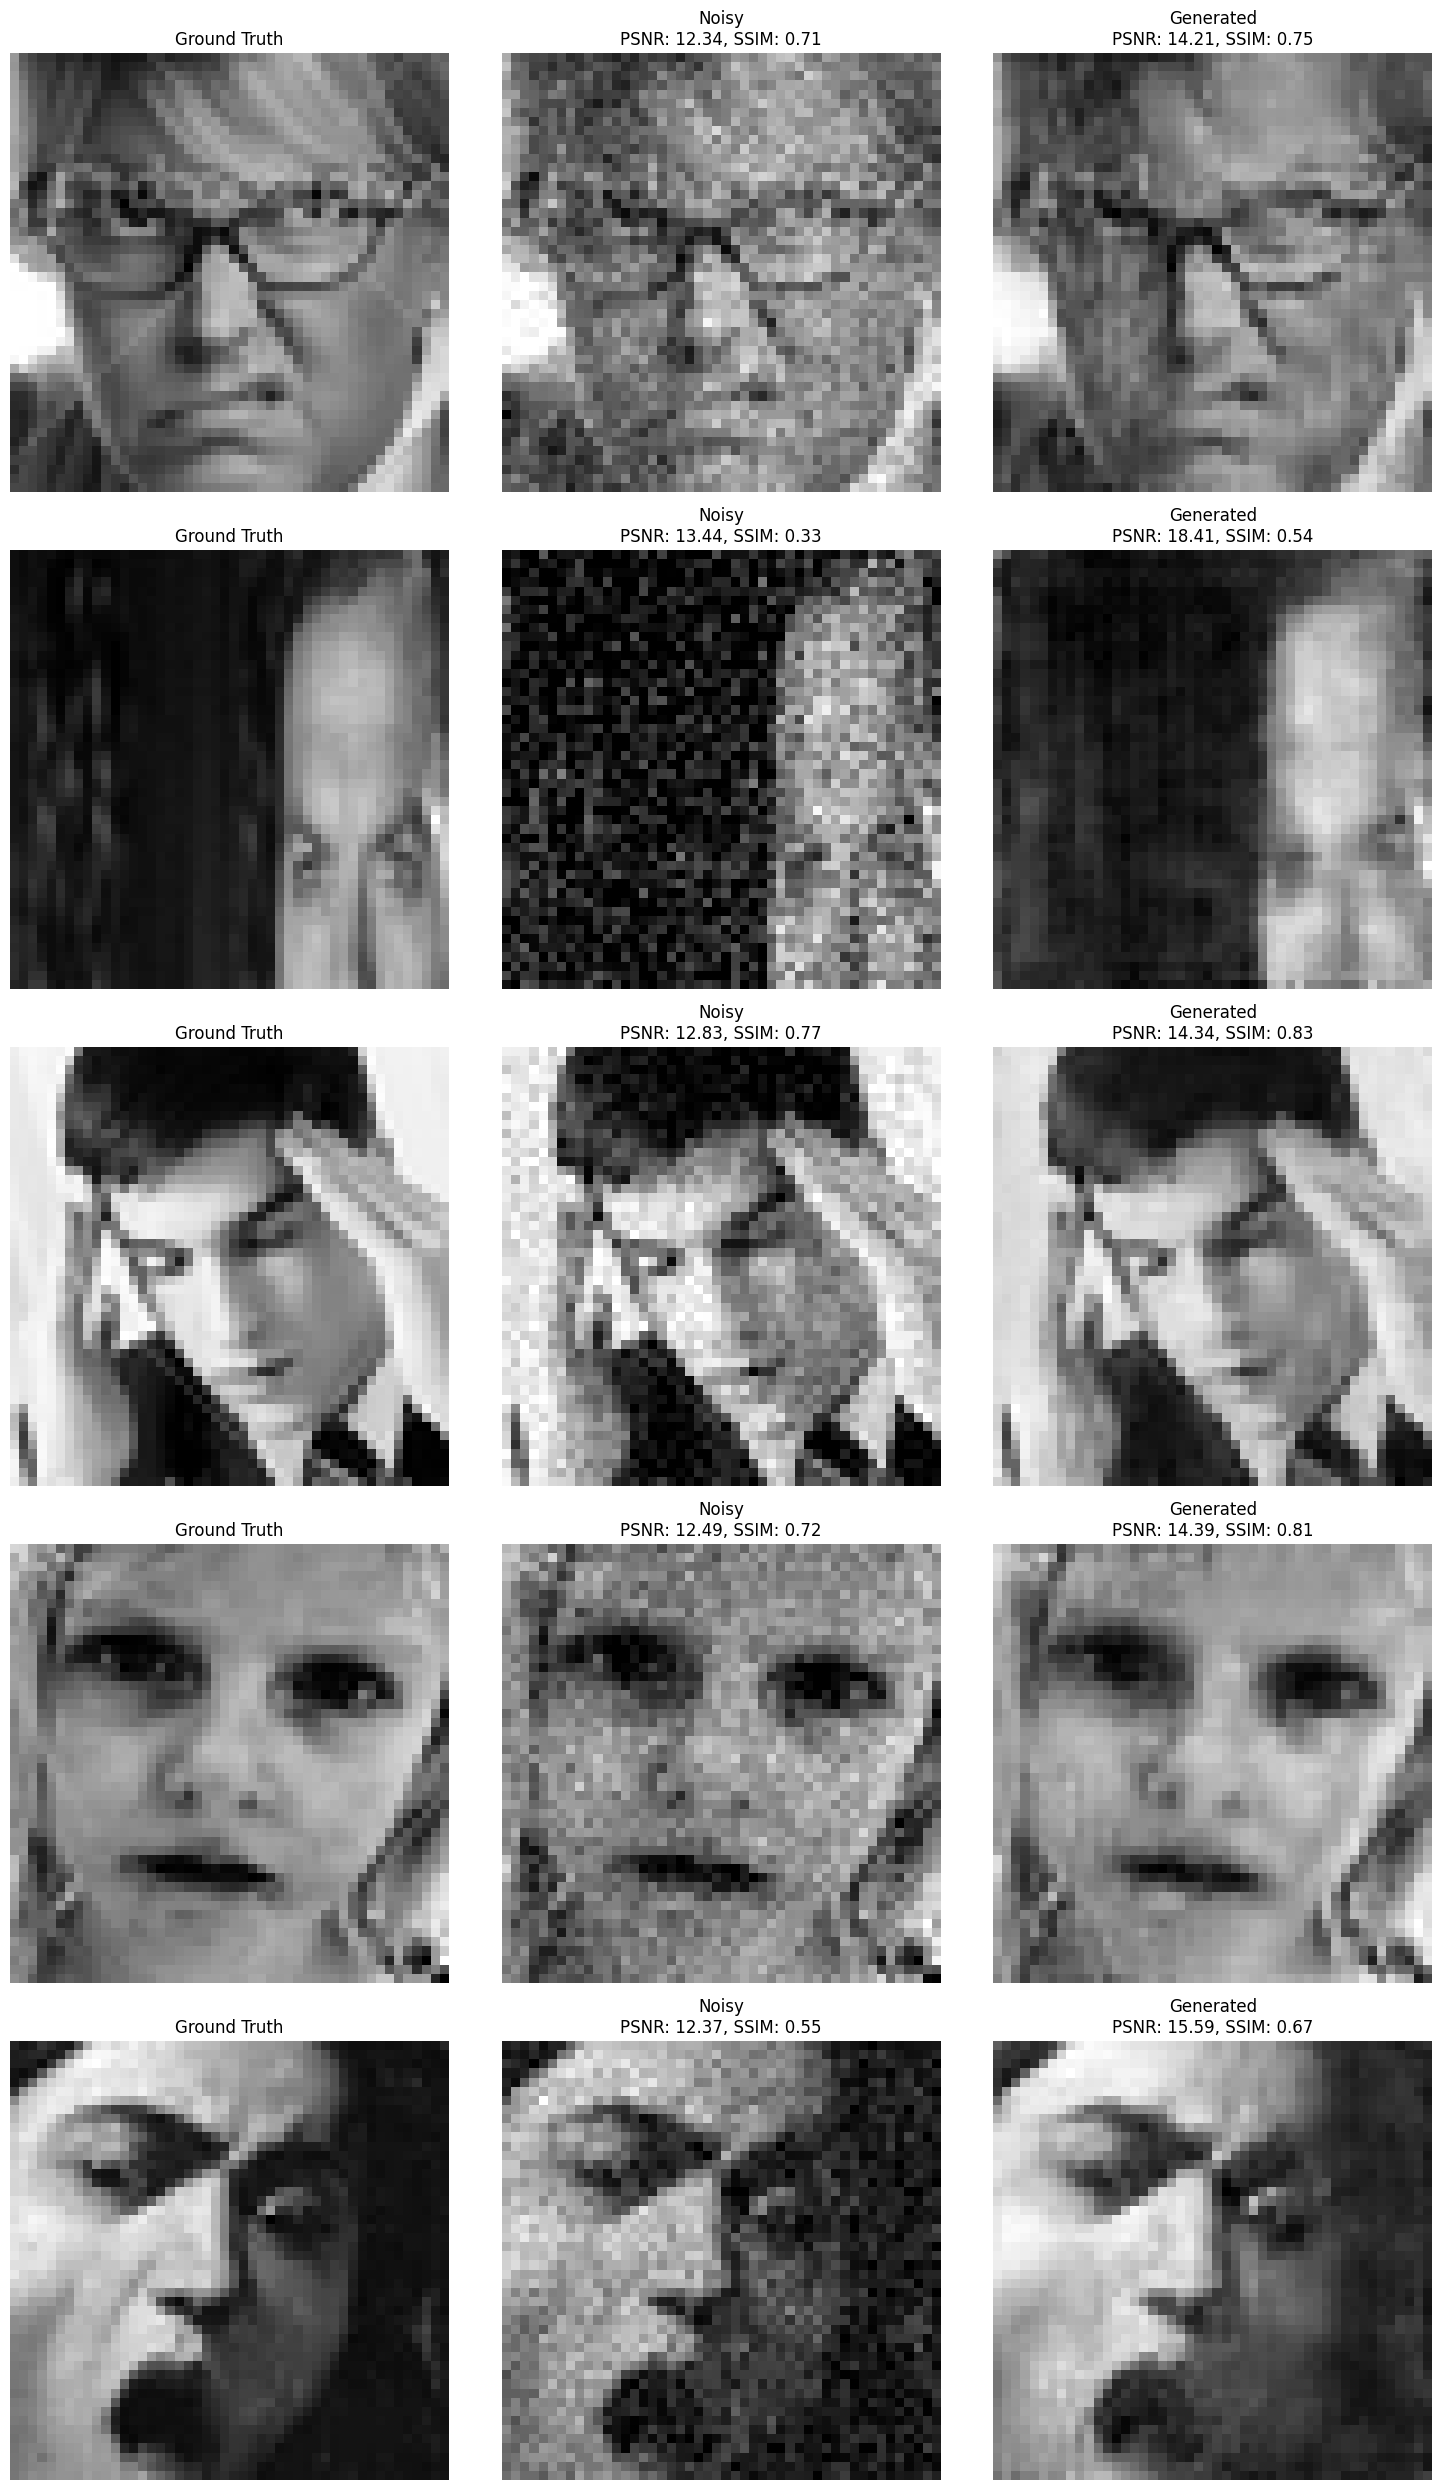

In [ ]:
print(f"\nHigh Gaussian Noise Test Set Metrics:\nLoss: {test_loss:.4f}, PSNR: {test_psnr:.4f}, SSIM: {test_ssim:.4f}")
# Visualize predictions for high Gaussian noise test set
visualize_gan_predictions(high_noise_generator, test_loaders['high_gaussian_noise'], device=device, num_samples=5)

##### V2


High Gaussian Noise Test Set Metrics:
Loss: 0.0270, PSNR: 15.6816, SSIM: 0.7745


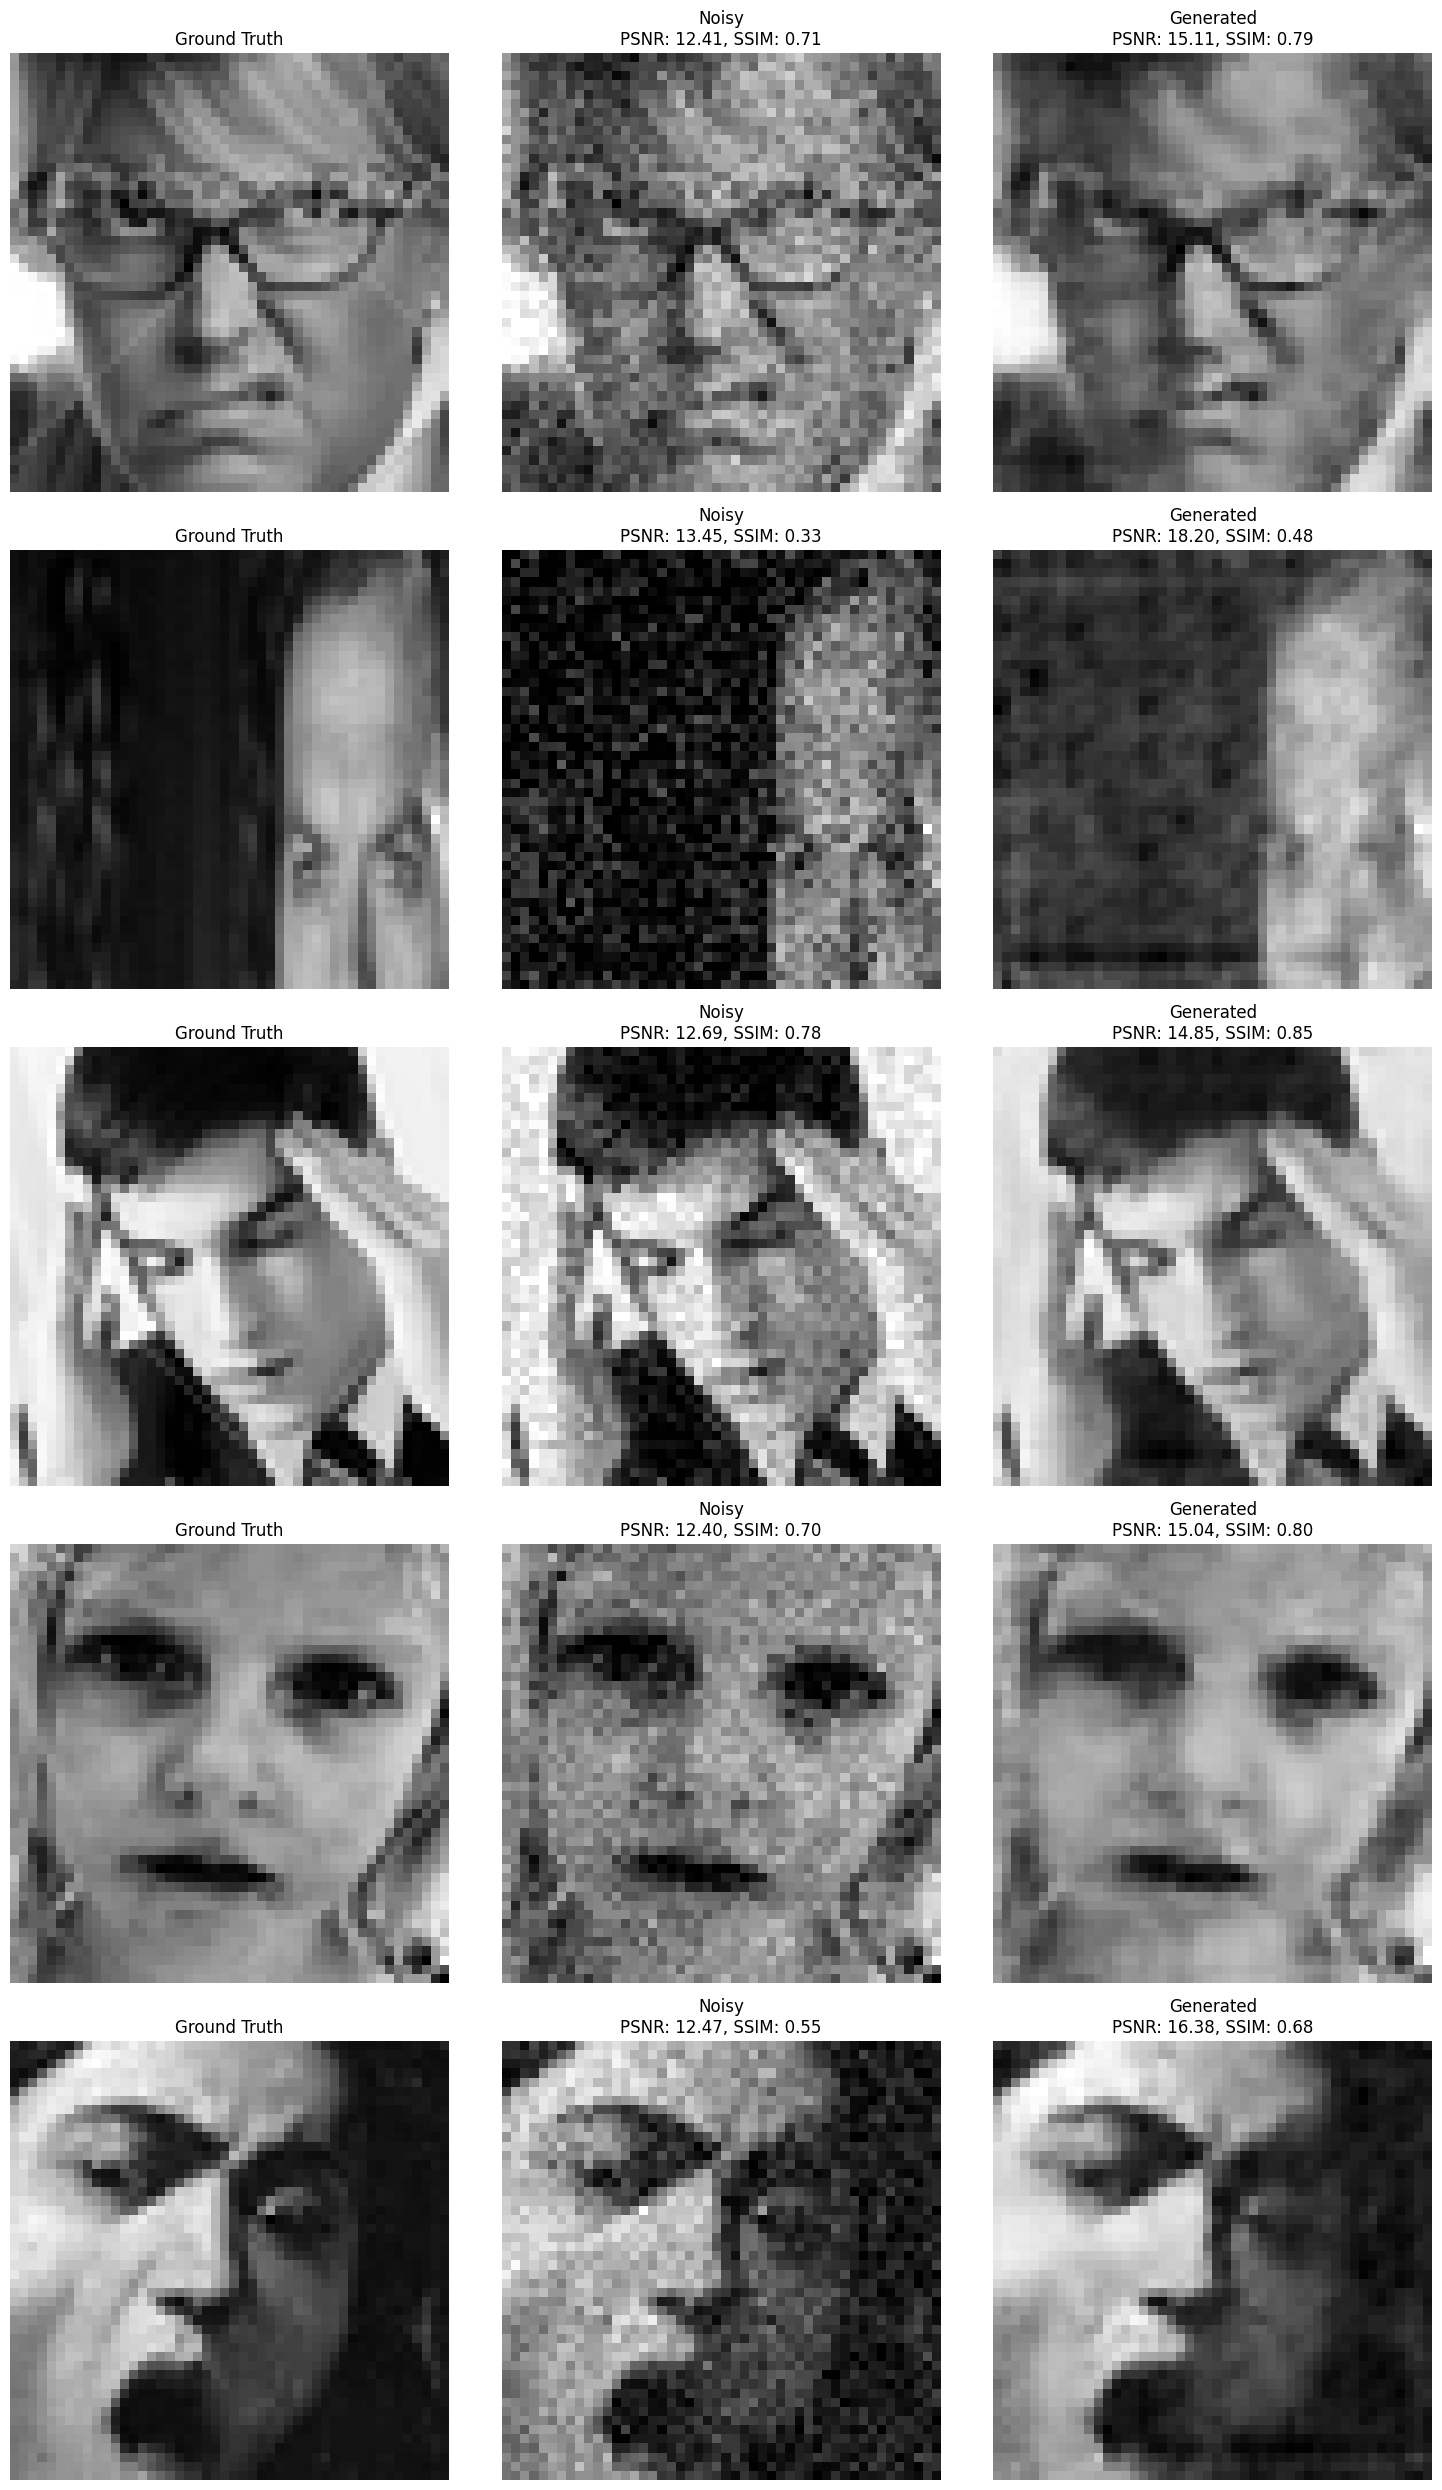

In [ ]:
print(f"\nHigh Gaussian Noise Test Set Metrics:\nLoss: {test_loss:.4f}, PSNR: {test_psnr:.4f}, SSIM: {test_ssim:.4f}")
# Visualize predictions for high Gaussian noise test set
visualize_gan_predictions(high_noise_generator, test_loaders['high_gaussian_noise'], device=device, num_samples=5)

## Task 3: Denosing Salt and Pepper Noise

### AttentionUnet



In [ ]:
# Load model with pretrained weights from high Gaussian noise
model = AttentionUNet(in_channels=1, out_channels=1).to(device)

# Load weights from the high Gaussian noise task
high_noise_model_path = get_model_save_path(dataset_base_path, filename="attention_unet_best_model_high_noise.pth")
model.load_state_dict(torch.load(high_noise_model_path))
print(f"Loaded pretrained weights from: {high_noise_model_path}")


Loaded pretrained weights from: /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/models/attention_unet_best_model_high_noise.pth


<ipython-input-69-95af39c2f836>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(high_noise_model_path))


Visualizing Salt-and-Pepper Noise:


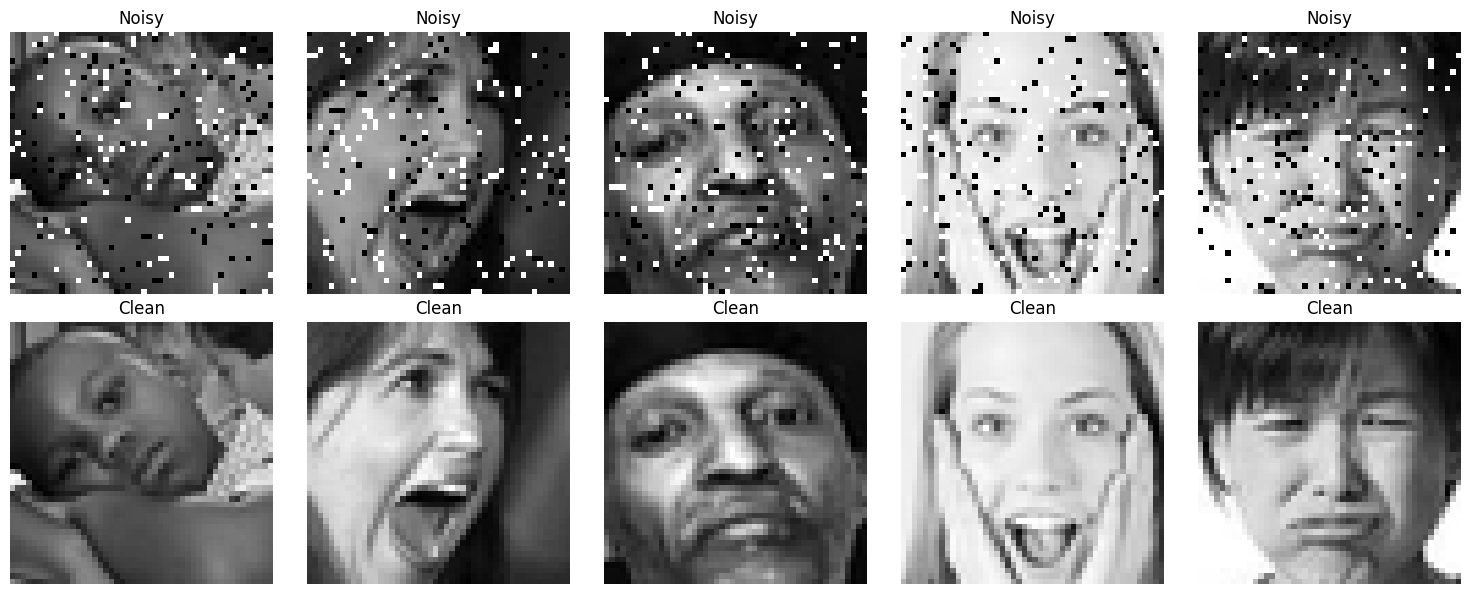

In [ ]:
# Visualize salt-and-pepper noise dataset
print("Visualizing Salt-and-Pepper Noise:")
visualize_noisy_clean(train_loaders['salt_pepper_noise'])


In [ ]:
# Update optimizer and scheduler for fine-tuning
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Slightly higher learning rate for fine-tuning
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)

# Save path for salt-and-pepper noise training
sp_noise_model_path = get_model_save_path(dataset_base_path, filename="attention_unet_best_model_salt_pepper_noise.pth")

# Initialize Trainer for salt-and-pepper noise
trainer = Trainer(
    model=model,
    train_loader=train_loaders['salt_pepper_noise'],
    val_loader=val_loaders['salt_pepper_noise'],
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    device=device
)

# Train the model on salt-and-pepper noise
print("\nStarting Training for Salt-and-Pepper Noise:")
trainer.fit(num_epochs=20, save_path=sp_noise_model_path)

print(f"\nTraining completed for Salt-and-Pepper Noise. Model saved at: {sp_noise_model_path}")



Starting Training for Salt-and-Pepper Noise:

Epoch 1/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.97it/s]


Train Loss: 0.0589, PSNR: 18.5942, SSIM: 0.7143
Val Loss: 0.0310, PSNR: 21.1146, SSIM: 0.8249
Validation loss improved from inf to 0.0310. Saving model...

Epoch 2/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 13.16it/s]


Train Loss: 0.0196, PSNR: 23.2453, SSIM: 0.8812
Val Loss: 0.0128, PSNR: 24.9725, SSIM: 0.9176
Validation loss improved from 0.0310 to 0.0128. Saving model...

Epoch 3/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.27it/s]


Train Loss: 0.0109, PSNR: 25.6776, SSIM: 0.9287
Val Loss: 0.0092, PSNR: 26.3792, SSIM: 0.9381
Validation loss improved from 0.0128 to 0.0092. Saving model...

Epoch 4/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 15.56it/s]


Train Loss: 0.0086, PSNR: 26.7144, SSIM: 0.9428
Val Loss: 0.0074, PSNR: 27.3458, SSIM: 0.9503
Validation loss improved from 0.0092 to 0.0074. Saving model...

Epoch 5/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 14.59it/s]


Train Loss: 0.0070, PSNR: 27.5911, SSIM: 0.9530
Val Loss: 0.0064, PSNR: 27.9672, SSIM: 0.9580
Validation loss improved from 0.0074 to 0.0064. Saving model...

Epoch 6/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 11.39it/s]


Train Loss: 0.0063, PSNR: 28.0780, SSIM: 0.9580
Val Loss: 0.0061, PSNR: 28.2085, SSIM: 0.9587
Validation loss improved from 0.0064 to 0.0061. Saving model...

Epoch 7/20


Validating: 100%|██████████| 90/90 [00:08<00:00, 11.04it/s]


Train Loss: 0.0057, PSNR: 28.4790, SSIM: 0.9621
Val Loss: 0.0058, PSNR: 28.3822, SSIM: 0.9593
Validation loss improved from 0.0061 to 0.0058. Saving model...

Epoch 8/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 11.25it/s]


Train Loss: 0.0053, PSNR: 28.8266, SSIM: 0.9652
Val Loss: 0.0049, PSNR: 29.1488, SSIM: 0.9691
Validation loss improved from 0.0058 to 0.0049. Saving model...

Epoch 9/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 11.43it/s]


Train Loss: 0.0049, PSNR: 29.1417, SSIM: 0.9683
Val Loss: 0.0047, PSNR: 29.3042, SSIM: 0.9685
Validation loss improved from 0.0049 to 0.0047. Saving model...

Epoch 10/20


Validating: 100%|██████████| 90/90 [00:08<00:00, 11.20it/s]


Train Loss: 0.0047, PSNR: 29.3730, SSIM: 0.9701
Val Loss: 0.0051, PSNR: 28.9798, SSIM: 0.9664

Epoch 11/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 12.13it/s]


Train Loss: 0.0045, PSNR: 29.5543, SSIM: 0.9716
Val Loss: 0.0041, PSNR: 29.8807, SSIM: 0.9747
Validation loss improved from 0.0047 to 0.0041. Saving model...

Epoch 12/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 13.14it/s]


Train Loss: 0.0043, PSNR: 29.7329, SSIM: 0.9729
Val Loss: 0.0047, PSNR: 29.3166, SSIM: 0.9673

Epoch 13/20


Validating: 100%|██████████| 90/90 [00:07<00:00, 11.88it/s]


Train Loss: 0.0041, PSNR: 29.9064, SSIM: 0.9742
Val Loss: 0.0041, PSNR: 29.8707, SSIM: 0.9728

Epoch 14/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.94it/s]


Train Loss: 0.0040, PSNR: 30.0556, SSIM: 0.9753
Val Loss: 0.0042, PSNR: 29.7606, SSIM: 0.9749

Epoch 15/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.94it/s]


Train Loss: 0.0039, PSNR: 30.1769, SSIM: 0.9762
Val Loss: 0.0039, PSNR: 30.1389, SSIM: 0.9751
Validation loss improved from 0.0041 to 0.0039. Saving model...

Epoch 16/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.61it/s]


Train Loss: 0.0038, PSNR: 30.2759, SSIM: 0.9767
Val Loss: 0.0039, PSNR: 30.0914, SSIM: 0.9742

Epoch 17/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.90it/s]


Train Loss: 0.0037, PSNR: 30.3429, SSIM: 0.9772
Val Loss: 0.0035, PSNR: 30.6487, SSIM: 0.9798
Validation loss improved from 0.0039 to 0.0035. Saving model...

Epoch 18/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 16.74it/s]


Train Loss: 0.0036, PSNR: 30.4492, SSIM: 0.9778
Val Loss: 0.0037, PSNR: 30.4167, SSIM: 0.9794

Epoch 19/20


Validating: 100%|██████████| 90/90 [00:05<00:00, 15.76it/s]


Train Loss: 0.0036, PSNR: 30.5136, SSIM: 0.9782
Val Loss: 0.0043, PSNR: 29.6634, SSIM: 0.9681

Epoch 20/20


Validating: 100%|██████████| 90/90 [00:06<00:00, 14.89it/s]


Train Loss: 0.0035, PSNR: 30.5869, SSIM: 0.9787
Val Loss: 0.0036, PSNR: 30.5144, SSIM: 0.9776

Training completed for Salt-and-Pepper Noise. Model saved at: /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/models/attention_unet_best_model_salt_pepper_noise.pth


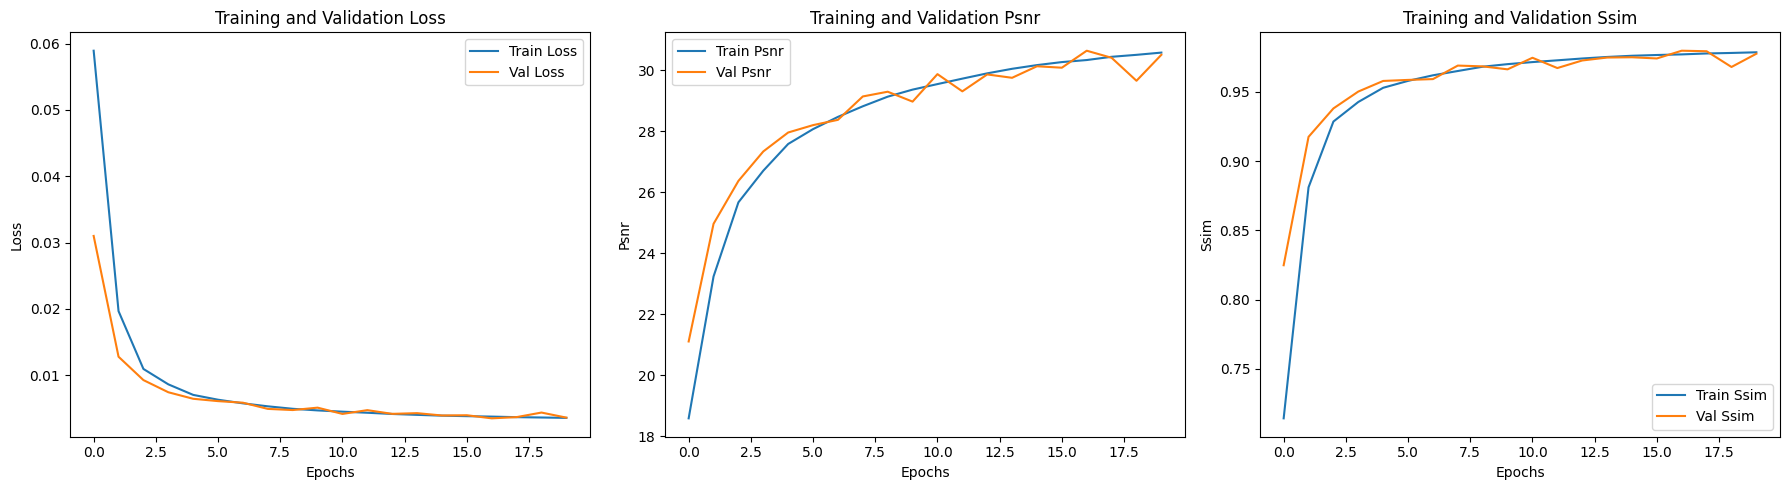

In [ ]:
# Call the function after training
plot_training_history(trainer)

In [ ]:
# Evaluate the model on the salt-and-pepper noise test set
test_loss, test_psnr, test_ssim = evaluate_on_test_set(
    model,
    test_loaders['salt_pepper_noise'],
    criterion,
    device
)
print(f"\nSalt-and-Pepper Noise Test Set Metrics:\nLoss: {test_loss:.4f}, PSNR: {test_psnr:.4f}, SSIM: {test_ssim:.4f}")


Testing: 100%|██████████| 113/113 [00:06<00:00, 17.08it/s]


Salt-and-Pepper Noise Test Set Metrics:
Loss: 0.0037, PSNR: 30.3950, SSIM: 0.9774


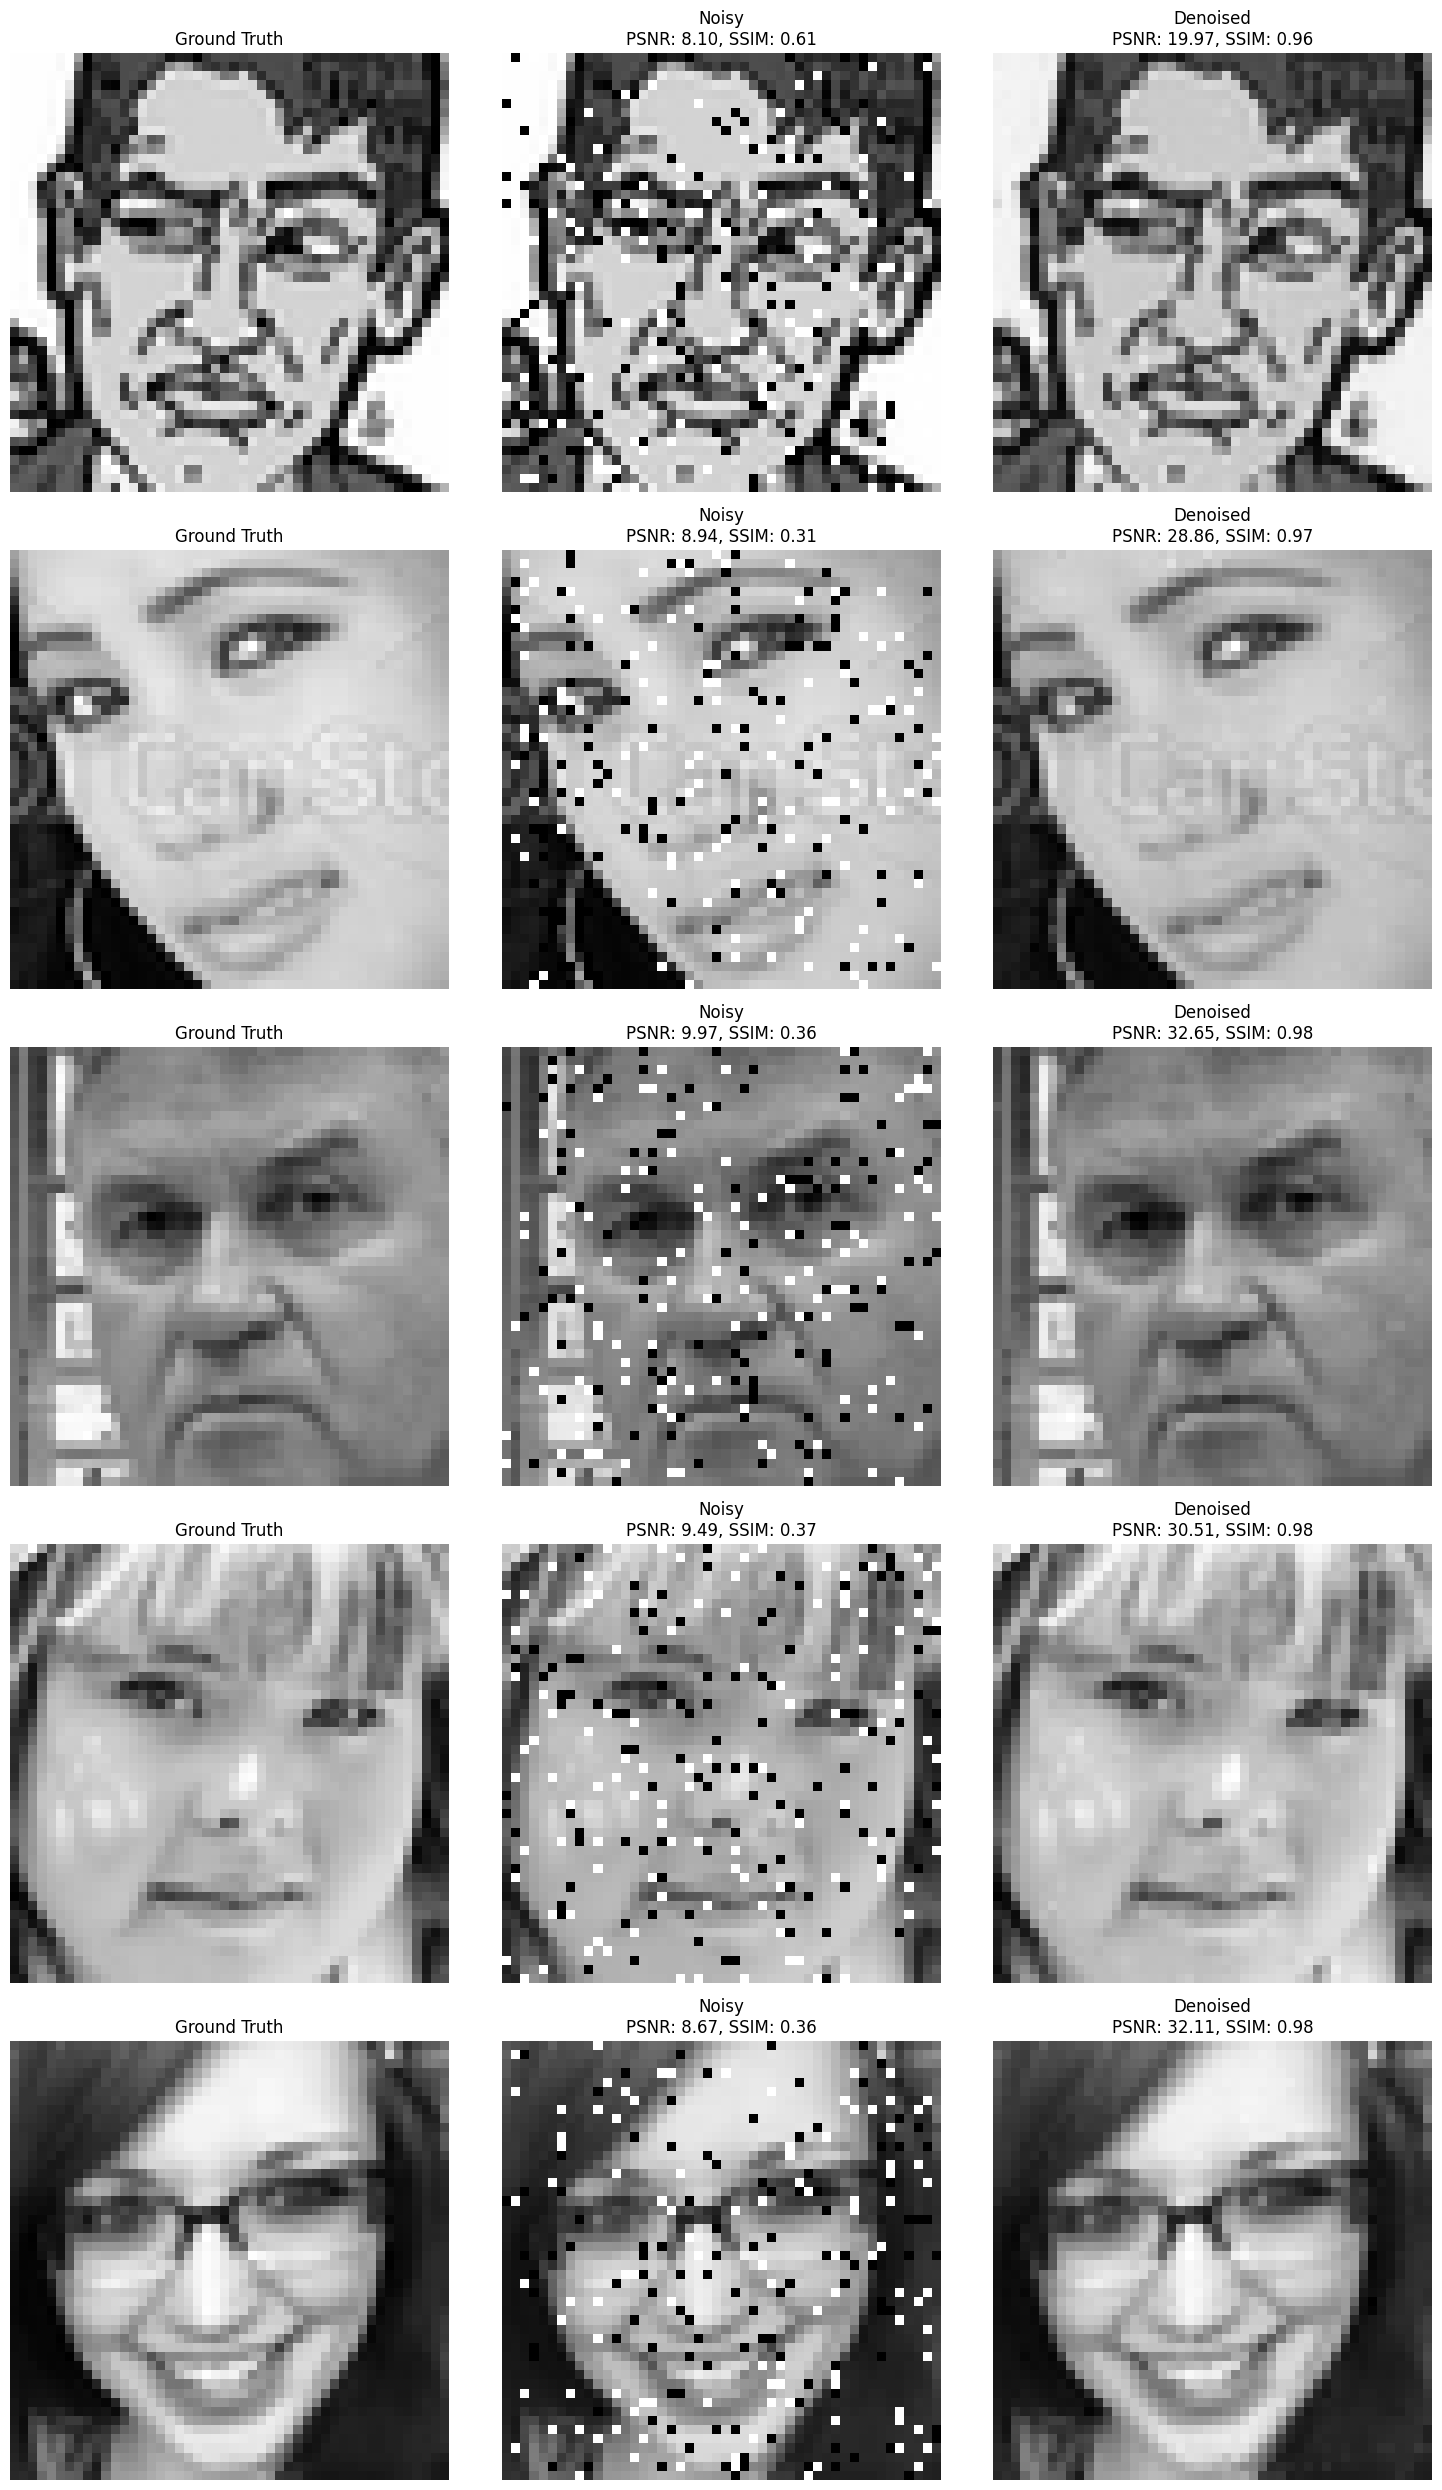

In [ ]:
# Visualize predictions for salt-and-pepper noise test set
visualize_predictions(model, test_loaders['salt_pepper_noise'], device=device, num_samples=5)


### AttentionPatchGAN



##### V2

In [ ]:
# Load Pretrained Generator for High Gaussian Noise
sp_noise_generator = AttentionUNet().to(device)
# high_noise_gen_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator_v2.pth"
# sp_noise_generator.load_state_dict(torch.load(high_noise_gen_path))
# print(f"Loaded pretrained generator weights from: {high_noise_gen_path}")

# Load Pretrained Discriminator for High Gaussian Noise
sp_noise_discriminator = PatchGANDiscriminator(in_channels=2, base_channels=32, stride=[2, 1, 1, 1, 1, 1], padding=[1, 0, 0, 0, 0, 0]).to(device)
# high_noise_disc_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator_v2.pth"
# sp_noise_discriminator.load_state_dict(torch.load(high_noise_disc_path))
# print(f"Loaded pretrained discriminator weights from: {high_noise_disc_path}")


Visualizing Salt-and-Pepper Noise:


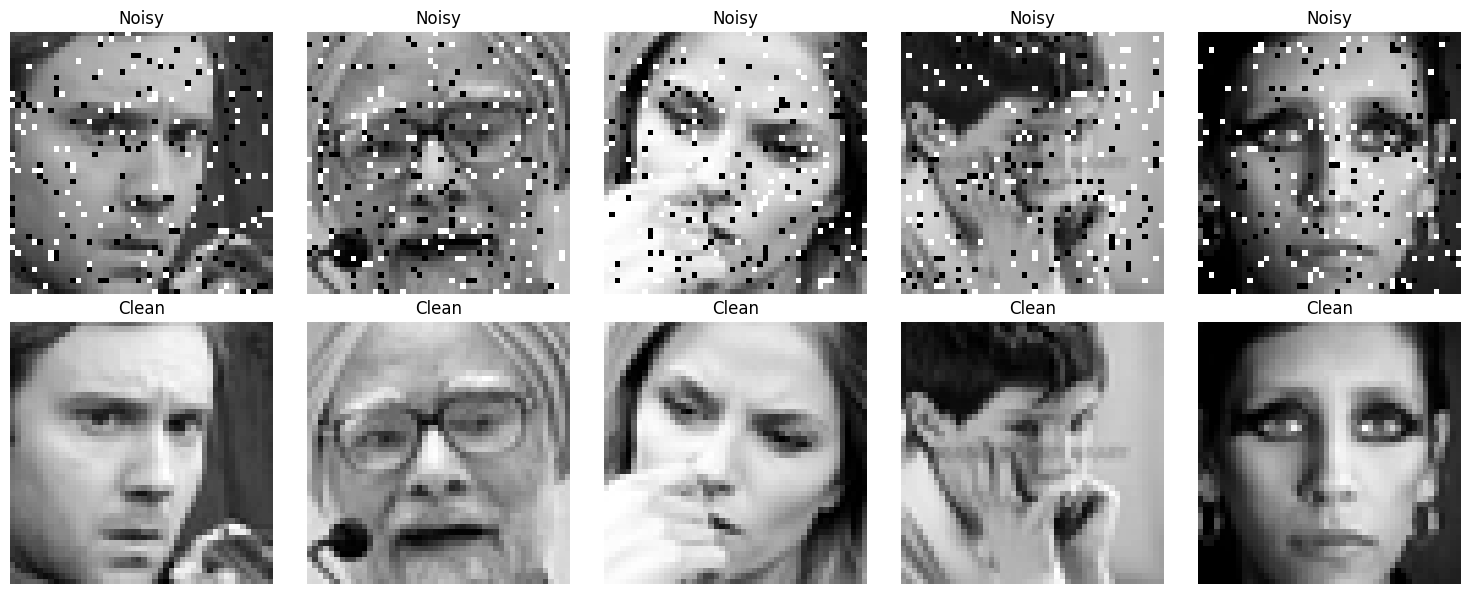

In [ ]:
# Visualize salt-and-pepper noise dataset
print("Visualizing Salt-and-Pepper Noise:")
visualize_noisy_clean(train_loaders['salt_pepper_noise'])


In [ ]:
# Define optimizer and loss function for the new task
gen_optimizer = torch.optim.Adam(sp_noise_discriminator.parameters(), lr=1e-4)
disc_optimizer = torch.optim.Adam(sp_noise_discriminator.parameters(), lr=1e-4)
gen_criterion = torch.nn.MSELoss()  # Adjust loss function if needed

# Define save paths for the new task
sp_noise_gen_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_generator_v2.pth"
sp_noise_disc_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_discriminator_v2.pth"
sp_noise_history_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_training_history_v2.json"

# Initialize GAN Trainer for sp Gaussian Noise
sp_noise_gan_trainer = GANTrainer(
    generator=sp_noise_generator,
    discriminator=sp_noise_discriminator,
    train_loader=train_loaders['salt_pepper_noise'],
    val_loader=val_loaders['salt_pepper_noise'],
    gen_optimizer=gen_optimizer,
    disc_optimizer=disc_optimizer,
    gen_criterion=gen_criterion,
    device=device
)


print("\nStarting Training for sp Gaussian Noise:")
sp_noise_gan_trainer.fit(
    num_epochs=40,
    gen_save_path=sp_noise_gen_path,
    disc_save_path=sp_noise_disc_path,
    history_path=sp_noise_history_path
)



Starting Training for sp Gaussian Noise:

Epoch 1/40


Validating: 100%|██████████| 57/57 [00:04<00:00, 13.57it/s]


Train Gen Loss: 2.1619, Train Disc Loss: 0.5928, PSNR: -3.3375, SSIM: 0.0013
Val Gen Loss: 2.1789, Val Disc Loss: 1.5137, PSNR: -3.3728, SSIM: 0.0012
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_generator_v2.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_discriminator_v2.pth...

Epoch 2/40


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.55it/s]


Train Gen Loss: 2.1619, Train Disc Loss: 0.5294, PSNR: -3.3376, SSIM: 0.0013
Val Gen Loss: 2.1795, Val Disc Loss: 1.9291, PSNR: -3.3739, SSIM: 0.0012

Epoch 3/40


Validating: 100%|██████████| 57/57 [00:05<00:00, 10.36it/s]


Train Gen Loss: 2.1619, Train Disc Loss: 0.5182, PSNR: -3.3376, SSIM: 0.0013
Val Gen Loss: 2.1791, Val Disc Loss: 2.1393, PSNR: -3.3730, SSIM: 0.0011

Epoch 4/40


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.45it/s]


Train Gen Loss: 2.1619, Train Disc Loss: 0.5142, PSNR: -3.3375, SSIM: 0.0013
Val Gen Loss: 2.1793, Val Disc Loss: 2.2866, PSNR: -3.3734, SSIM: 0.0012

Epoch 5/40


Validating: 100%|██████████| 57/57 [00:03<00:00, 15.10it/s]


Train Gen Loss: 2.1619, Train Disc Loss: 0.5119, PSNR: -3.3376, SSIM: 0.0013
Val Gen Loss: 2.1795, Val Disc Loss: 2.4724, PSNR: -3.3736, SSIM: 0.0012

Epoch 6/40


Validating: 100%|██████████| 57/57 [00:05<00:00, 11.23it/s]


Train Gen Loss: 2.1618, Train Disc Loss: 0.5097, PSNR: -3.3374, SSIM: 0.0013
Val Gen Loss: 2.1795, Val Disc Loss: 2.5237, PSNR: -3.3738, SSIM: 0.0012

Epoch 7/40


Training:  40%|████      | 181/449 [00:38<00:57,  4.65it/s]


KeyboardInterrupt: 

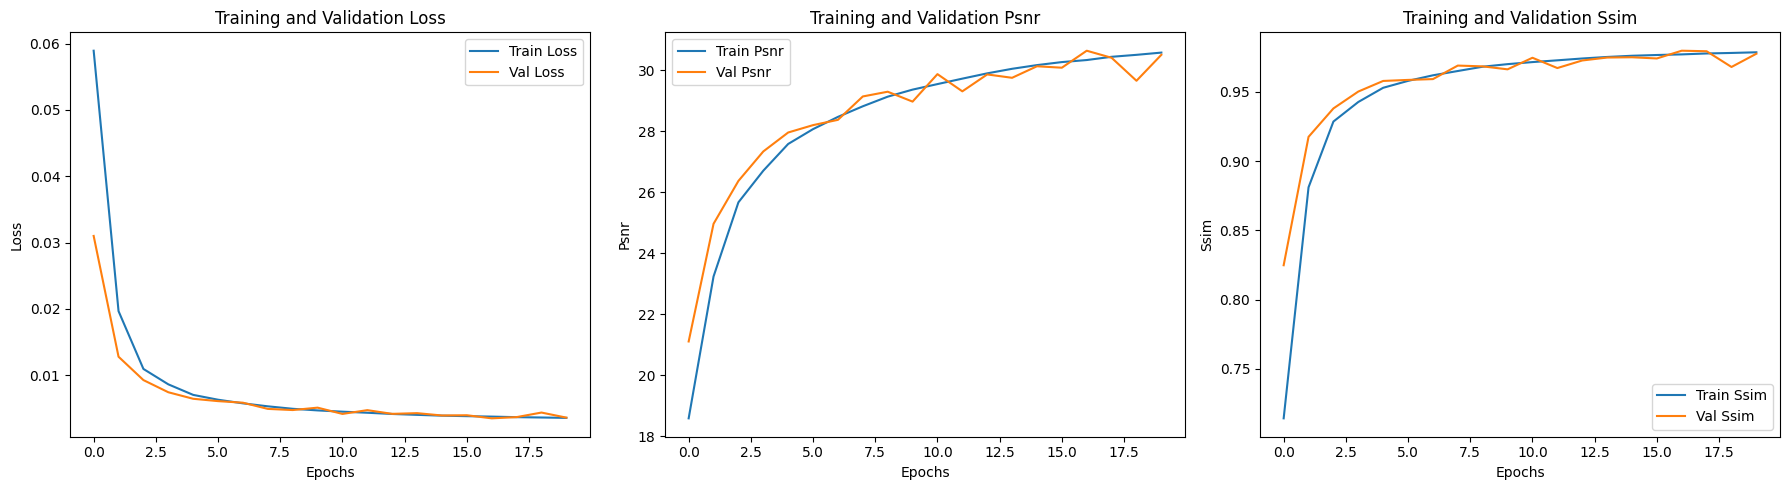

In [ ]:
# Call the function after training
plot_training_history(trainer)

In [ ]:
# Evaluate the model on the salt-and-pepper noise test set
test_loss, test_psnr, test_ssim = evaluate_on_test_set(
    model,
    test_loaders['salt_pepper_noise'],
    criterion,
    device
)
print(f"\nSalt-and-Pepper Noise Test Set Metrics:\nLoss: {test_loss:.4f}, PSNR: {test_psnr:.4f}, SSIM: {test_ssim:.4f}")


Testing: 100%|██████████| 113/113 [00:06<00:00, 17.08it/s]


Salt-and-Pepper Noise Test Set Metrics:
Loss: 0.0037, PSNR: 30.3950, SSIM: 0.9774


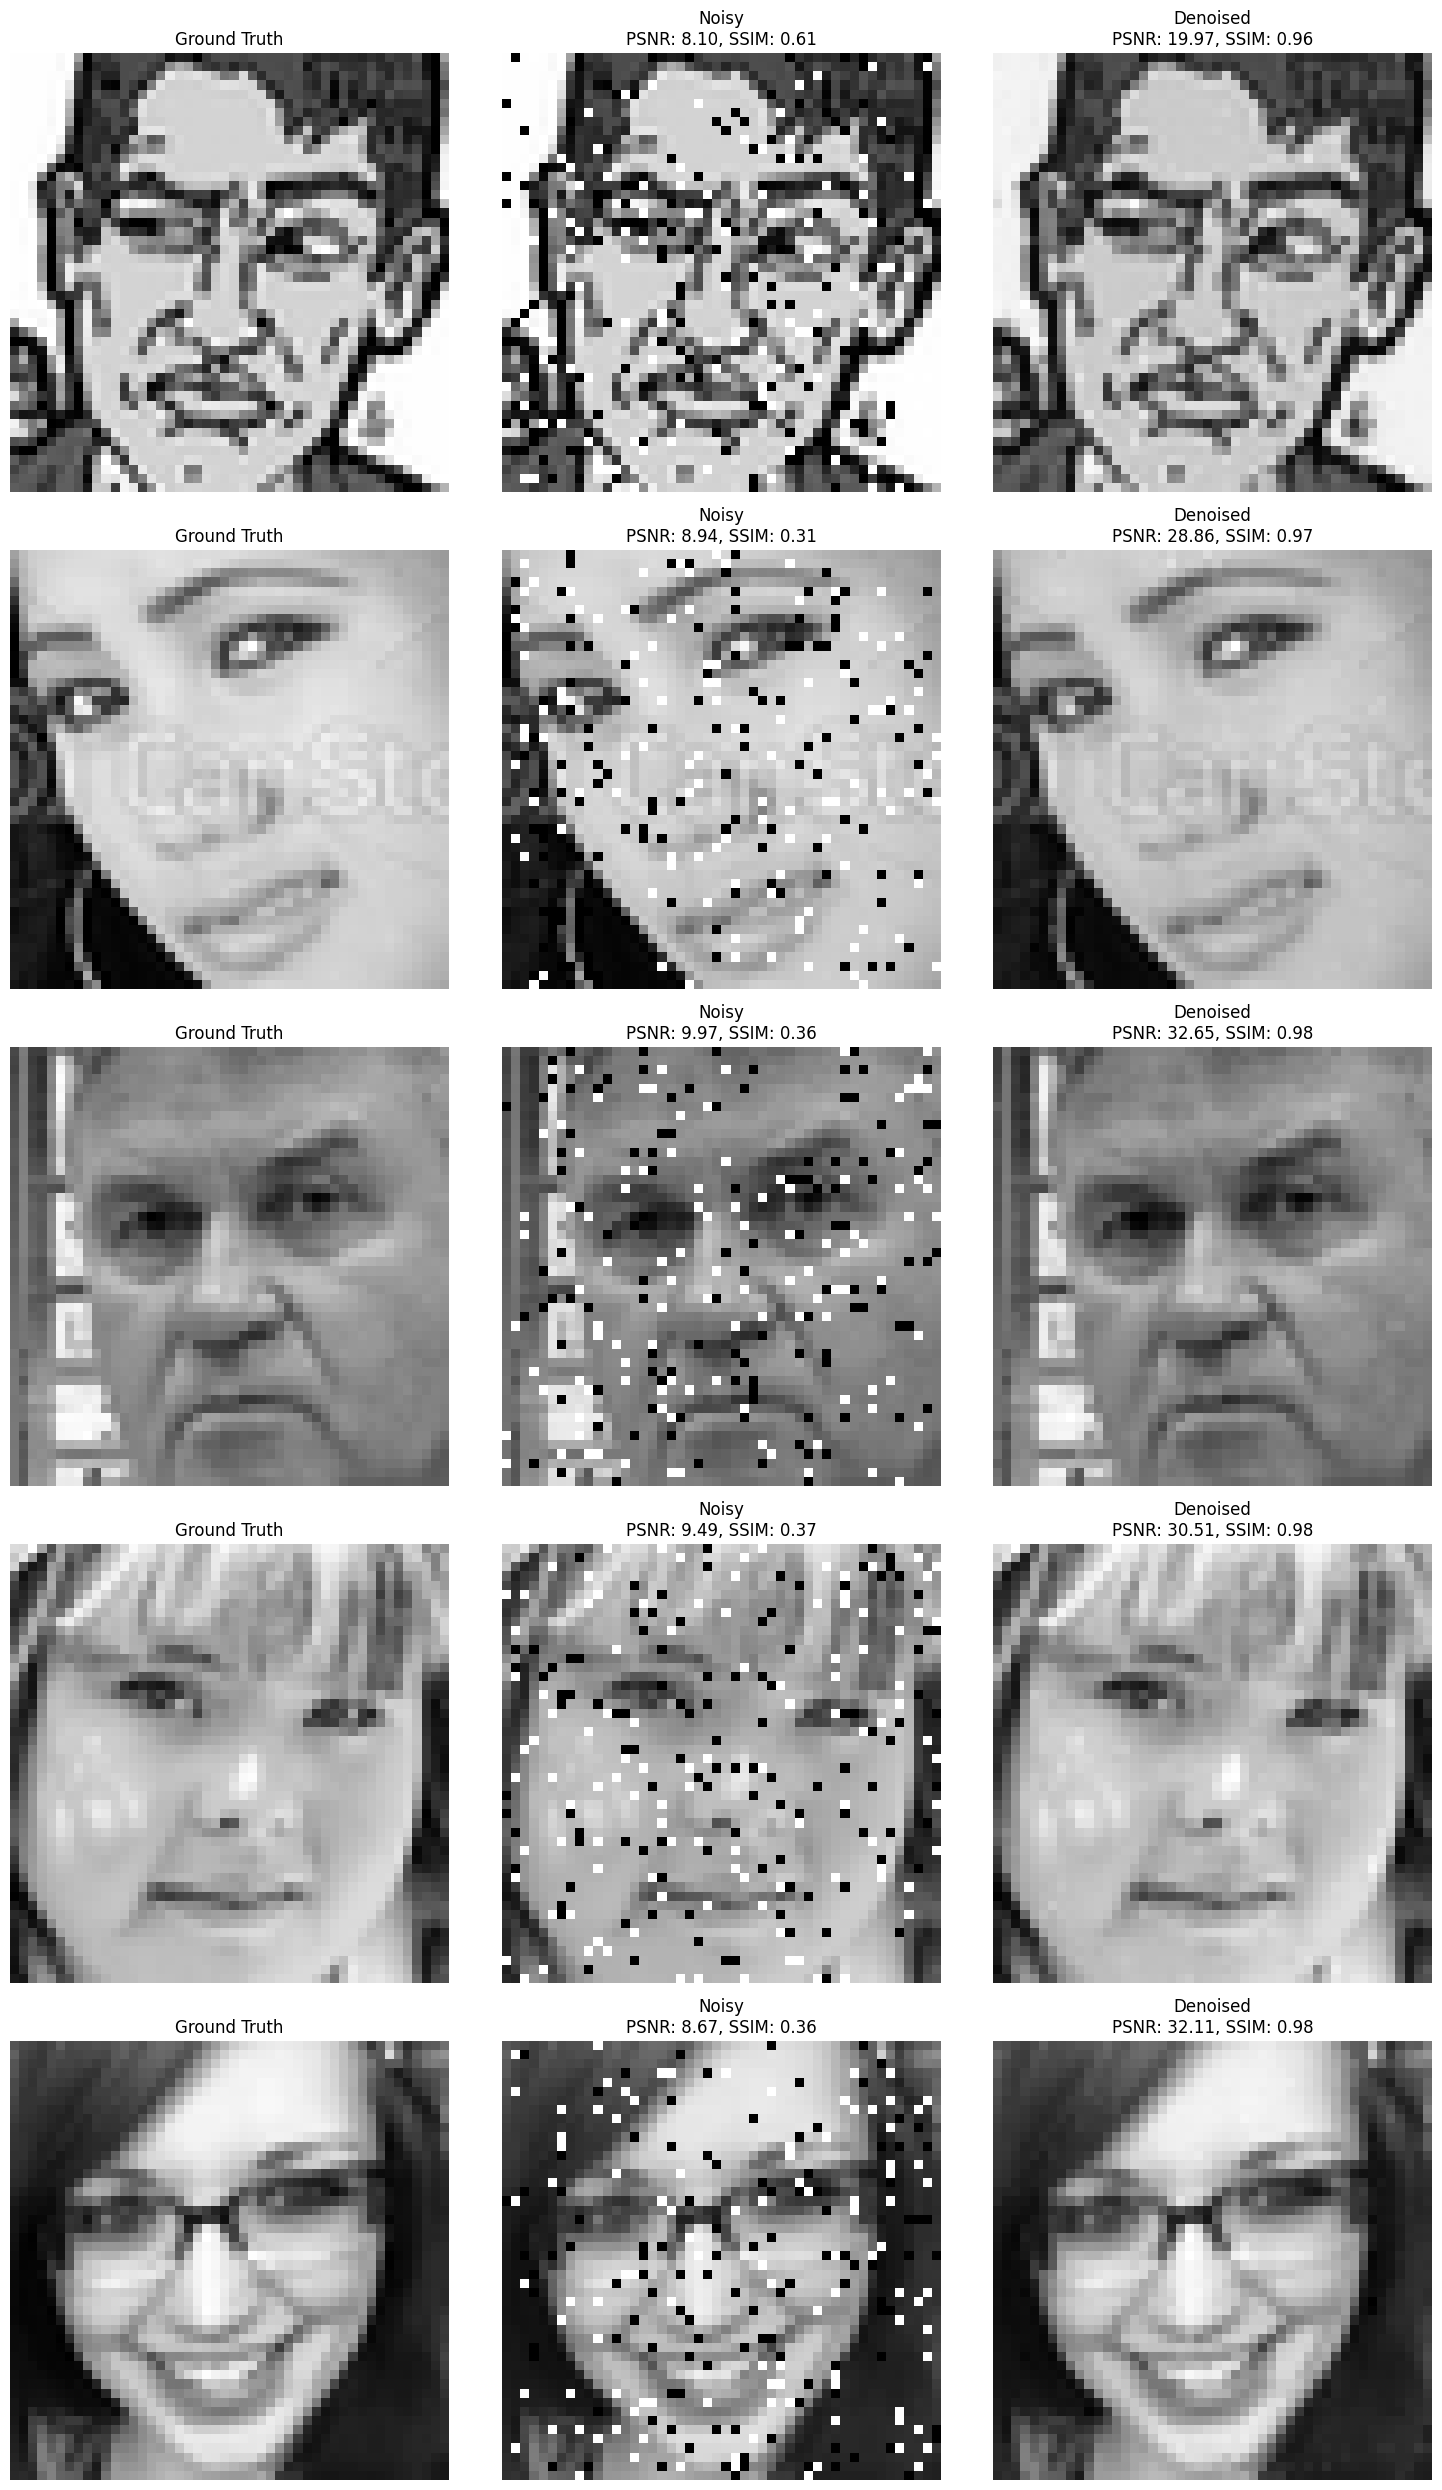

In [ ]:
# Visualize predictions for salt-and-pepper noise test set
visualize_predictions(model, test_loaders['salt_pepper_noise'], device=device, num_samples=5)


##### V3

In [ ]:
# Load Pretrained Generator for High Gaussian Noise
sp_noise_generator = AttentionUNet().to(device)
# high_noise_gen_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_generator_v2.pth"
# sp_noise_generator.load_state_dict(torch.load(high_noise_gen_path))
# print(f"Loaded pretrained generator weights from: {high_noise_gen_path}")

# Load Pretrained Discriminator for High Gaussian Noise
sp_noise_discriminator = PatchGANDiscriminator(in_channels=2, base_channels=32, stride=[2, 2, 1, 1, 1, 1], padding=[0, 0, 0, 0, 0, 0], use_fc=True, global_pooling=True).to(device)
# high_noise_disc_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/high_noise_patch_gan_discriminator_v2.pth"
# sp_noise_discriminator.load_state_dict(torch.load(high_noise_disc_path))
# print(f"Loaded pretrained discriminator weights from: {high_noise_disc_path}")


In [ ]:
# Define optimizer and loss function for the new task
gen_optimizer = torch.optim.Adam(sp_noise_discriminator.parameters(), lr=1e-4)
disc_optimizer = torch.optim.Adam(sp_noise_discriminator.parameters(), lr=1e-4)
gen_criterion = torch.nn.MSELoss()  # Adjust loss function if needed

# Define save paths for the new task
sp_noise_gen_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_generator_v3.pth"
sp_noise_disc_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_discriminator_v3.pth"
sp_noise_history_path = "/content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_training_history_v3.json"

# Initialize GAN Trainer for sp Gaussian Noise
sp_noise_gan_trainer = GANTrainer(
    generator=sp_noise_generator,
    discriminator=sp_noise_discriminator,
    train_loader=train_loaders['salt_pepper_noise'],
    val_loader=val_loaders['salt_pepper_noise'],
    gen_optimizer=gen_optimizer,
    disc_optimizer=disc_optimizer,
    gen_criterion=gen_criterion,
    device=device
)


print("\nStarting Training for sp Gaussian Noise:")
sp_noise_gan_trainer.fit(
    num_epochs=50,
    gen_save_path=sp_noise_gen_path,
    disc_save_path=sp_noise_disc_path,
    history_path=sp_noise_history_path
)



Starting Training for sp Gaussian Noise:

Epoch 1/50


Validating: 100%|██████████| 57/57 [00:04<00:00, 12.67it/s]


Train Gen Loss: 2.3390, Train Disc Loss: 0.6084, PSNR: -3.6801, SSIM: 0.0077
Val Gen Loss: 2.3623, Val Disc Loss: 0.7749, PSNR: -3.7228, SSIM: 0.0080
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_generator_v3.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_discriminator_v3.pth...

Epoch 2/50


Validating: 100%|██████████| 57/57 [00:03<00:00, 16.81it/s]


Train Gen Loss: 2.3392, Train Disc Loss: 0.4981, PSNR: -3.6801, SSIM: 0.0078
Val Gen Loss: 2.3624, Val Disc Loss: 0.7644, PSNR: -3.7229, SSIM: 0.0080

Epoch 3/50


Validating: 100%|██████████| 57/57 [00:03<00:00, 17.49it/s]


Train Gen Loss: 2.3393, Train Disc Loss: 0.4839, PSNR: -3.6803, SSIM: 0.0078
Val Gen Loss: 2.3613, Val Disc Loss: 0.7333, PSNR: -3.7205, SSIM: 0.0080
Validation generator loss improved. Saving models to /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_generator_v3.pth and /content/drive/My Drive/AI/Computer_vision_Fall2024/HW2/Q2/emotions_data/sp_noise_patch_gan_discriminator_v3.pth...

Epoch 4/50


Validating: 100%|██████████| 57/57 [00:05<00:00, 11.38it/s]


Train Gen Loss: 2.3391, Train Disc Loss: 0.4756, PSNR: -3.6800, SSIM: 0.0077
Val Gen Loss: 2.3625, Val Disc Loss: 0.7492, PSNR: -3.7230, SSIM: 0.0080

Epoch 5/50


Training:  12%|█▏        | 52/449 [00:05<00:43,  9.06it/s]


KeyboardInterrupt: 

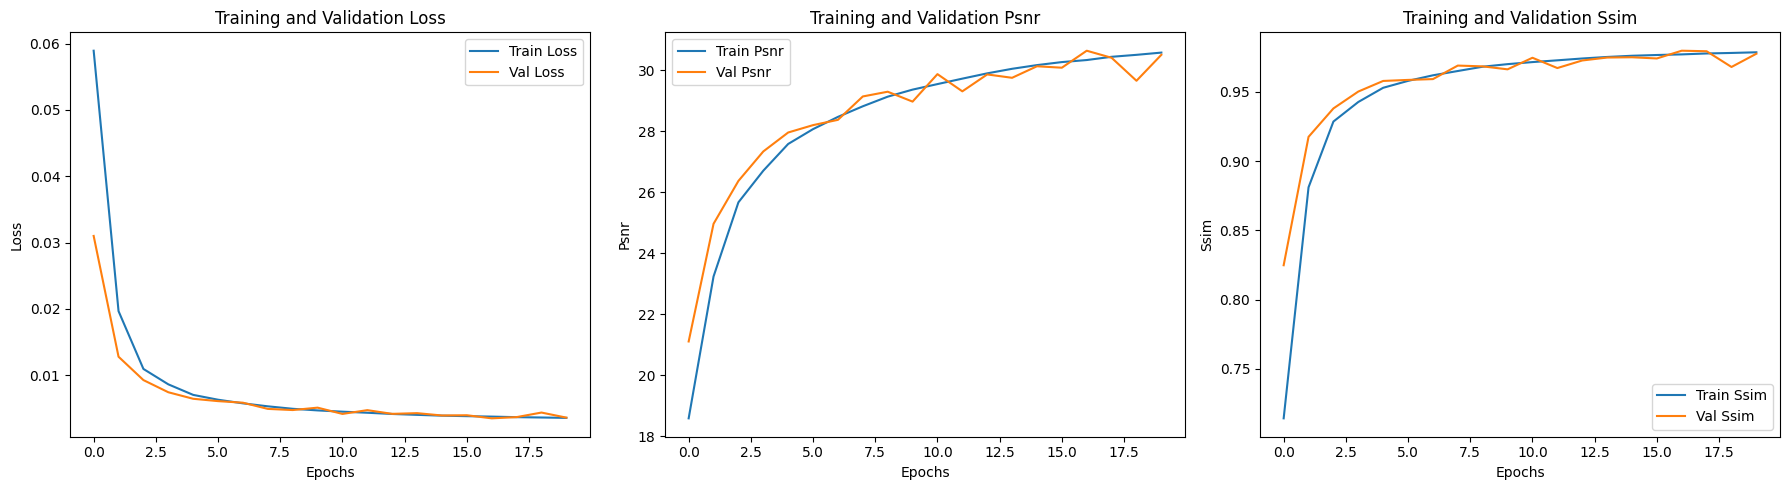

In [ ]:
# Call the function after training
plot_training_history(trainer)

In [ ]:
# Evaluate the model on the salt-and-pepper noise test set
test_loss, test_psnr, test_ssim = evaluate_on_test_set(
    model,
    test_loaders['salt_pepper_noise'],
    criterion,
    device
)
print(f"\nSalt-and-Pepper Noise Test Set Metrics:\nLoss: {test_loss:.4f}, PSNR: {test_psnr:.4f}, SSIM: {test_ssim:.4f}")


Testing: 100%|██████████| 113/113 [00:06<00:00, 17.08it/s]


Salt-and-Pepper Noise Test Set Metrics:
Loss: 0.0037, PSNR: 30.3950, SSIM: 0.9774


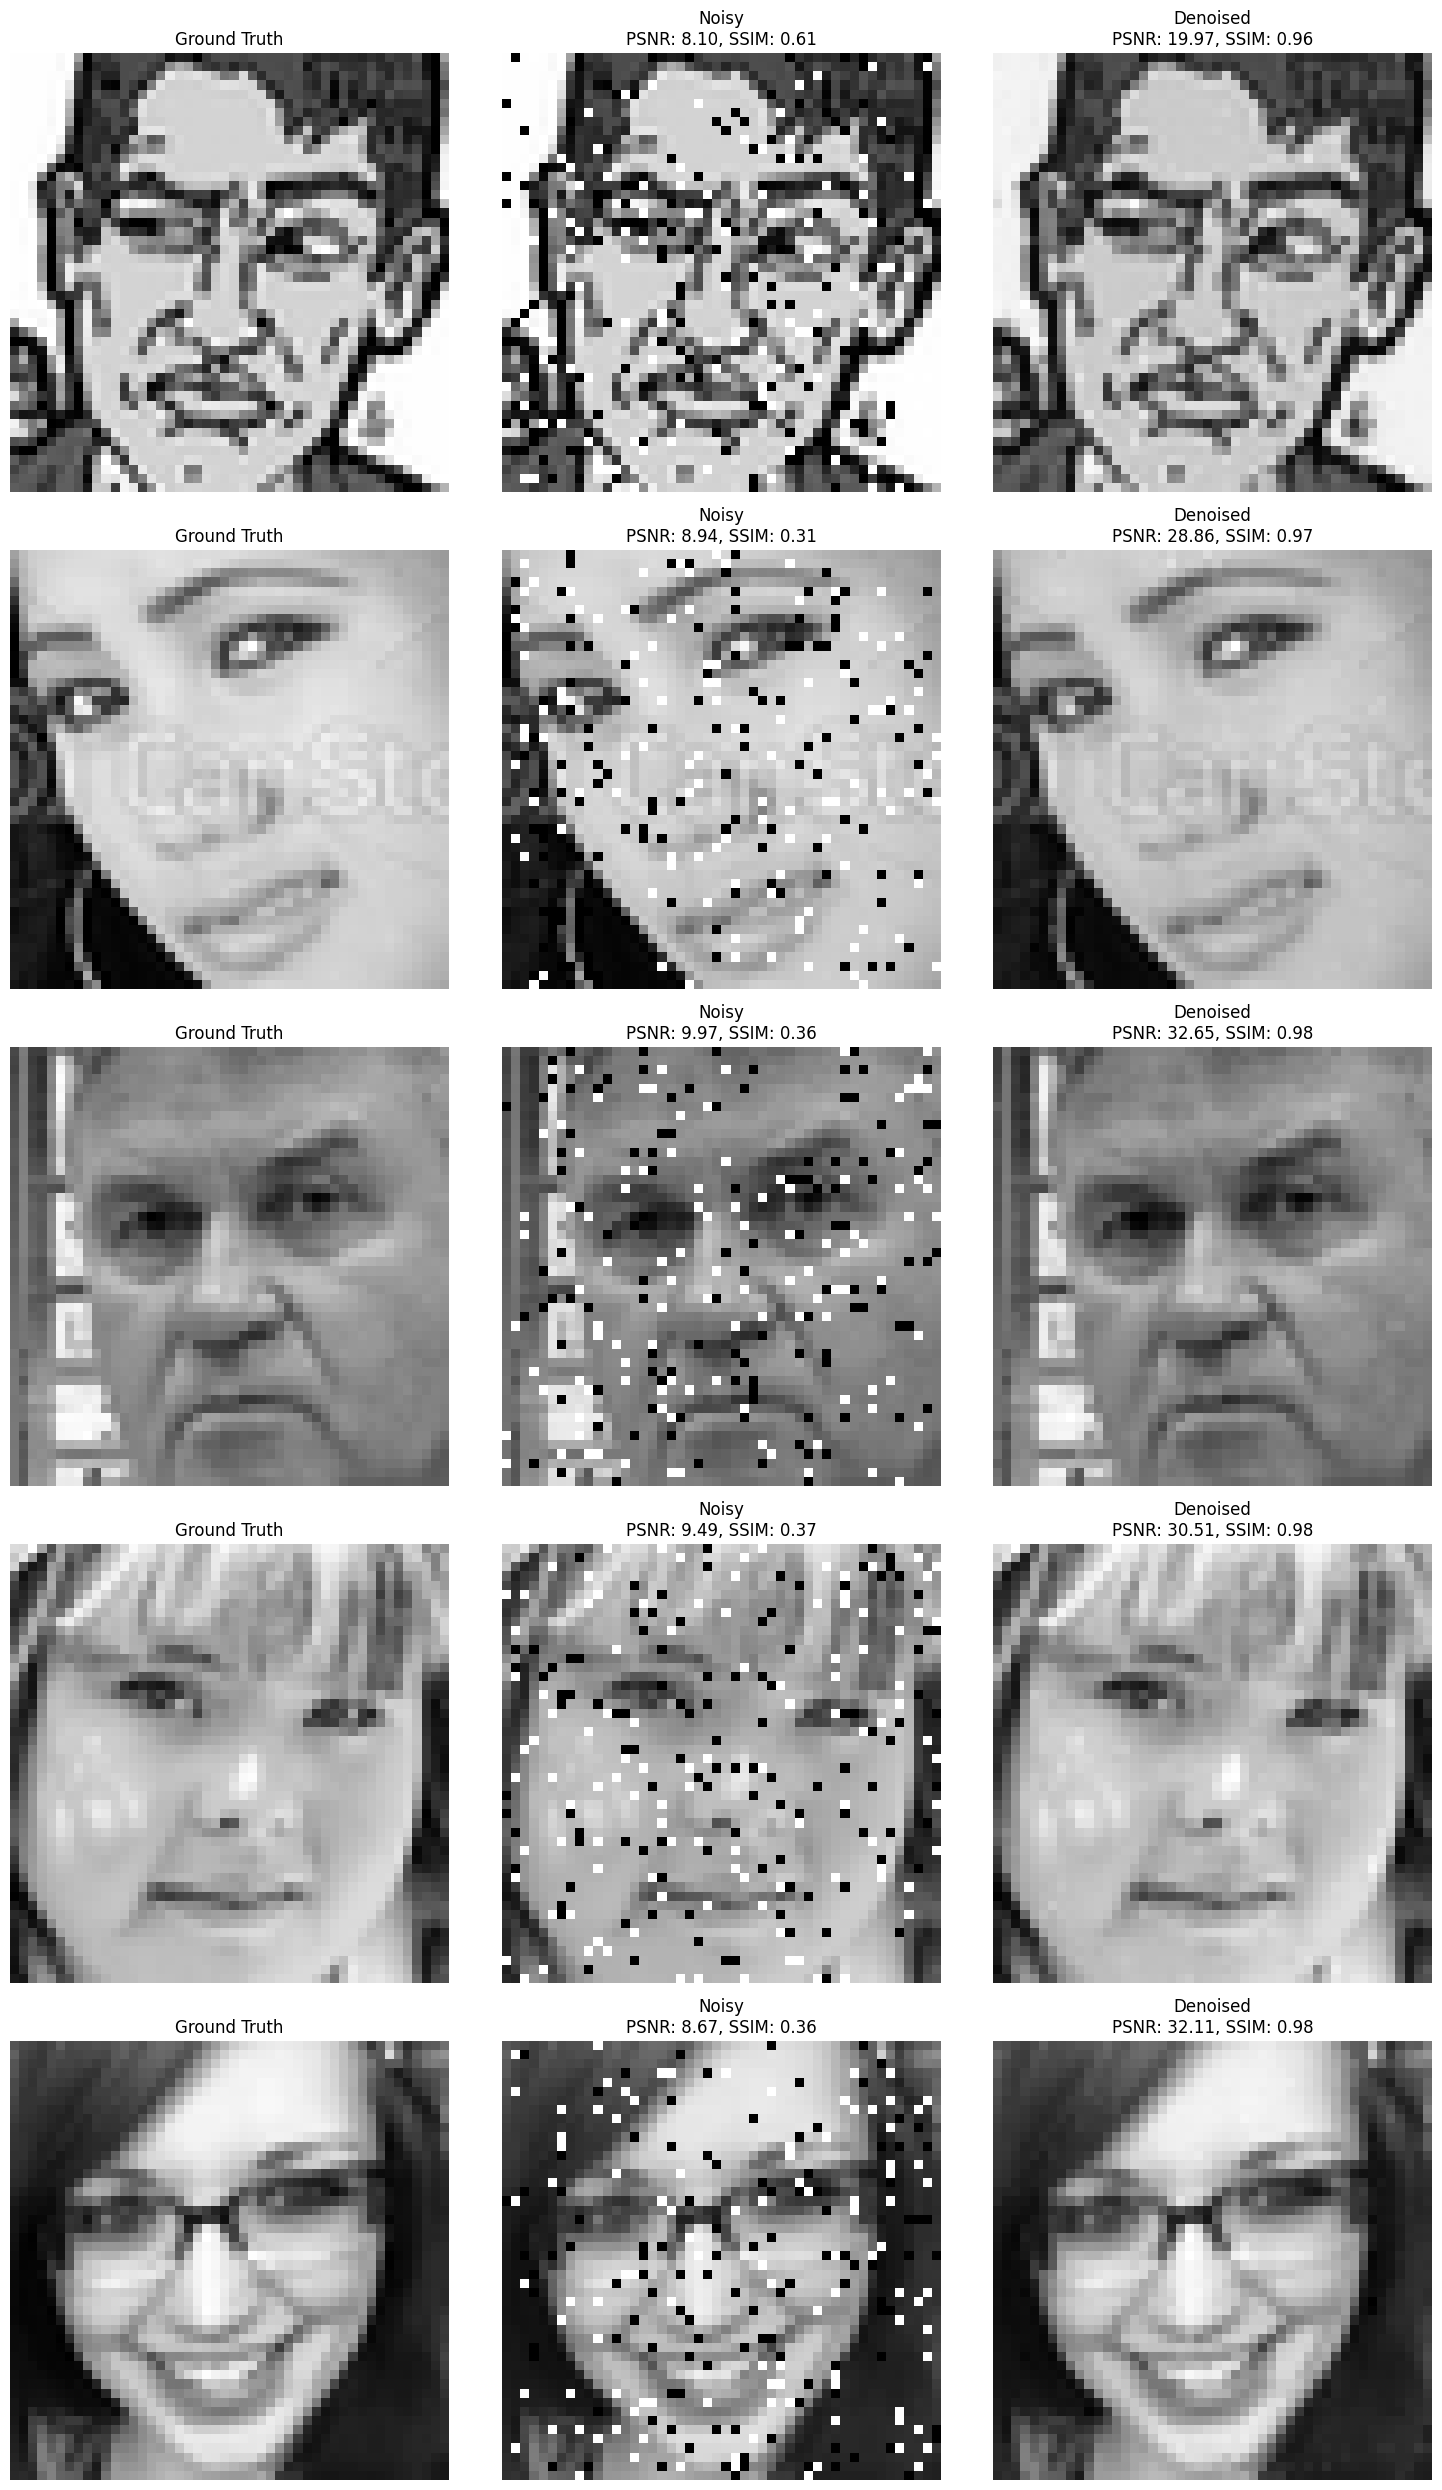

In [ ]:
# Visualize predictions for salt-and-pepper noise test set
visualize_predictions(model, test_loaders['salt_pepper_noise'], device=device, num_samples=5)
